In [1]:
from IPython.display import display, HTML
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
import os
# homeDir= "C:/Users/Galytix/Downloads/data_r/AI_Repo/Python/project_1"
# if(os.getcwd() != homeDir):
#     os.chdir(homeDir)
print("your current directory is : ")
print(os.getcwd())


your current directory is : 
C:\Users\Ajay\Music\AI_Repo\Python\project_1\Deep_learning


In [2]:
# import os
# homeDir= "C:/Users/Ajay/Music/AI_Repo/Python/project_1"
# if(os.getcwd() != homeDir):
#     os.chdir(homeDir)
# print("your current directory is : ")
# print(os.getcwd())


your current directory is : 
C:\Users\Ajay\Music\AI_Repo\Python\project_1


In [6]:
import pydot
import pydotplus
import graphviz
import numpy as np
import pandas as pd
import pylab
from PIL import Image
from IPython.display import SVG
import matplotlib.pyplot as plt
from IPython.display import HTML

ModuleNotFoundError: No module named 'pydotplus'

In [7]:
params = {"legend.fontsize":"x-large",
          "figure.figsize":(15,5),
          "axes.labelsize":"x-large",
          "axes.titlesize":"x-large",
          "xtick.labelsize":"x-large",
          "ytick.labelsize" : "x-large"}
params

{'legend.fontsize': 'x-large',
 'figure.figsize': (15, 5),
 'axes.labelsize': 'x-large',
 'axes.titlesize': 'x-large',
 'xtick.labelsize': 'x-large',
 'ytick.labelsize': 'x-large'}

In [5]:
plt.rcParams.update(params)

import math
import timeit
from six.moves import cPickle as pickle
import platform
#from subprocess import check_output
import glob
import tensorflow as tf
from tensorflow.keras.constraints import max_norm
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import model_to_dot
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import applications
from tqdm import tqdm_notebook
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable


In [88]:
# modules to save keras model
from keras.models import load_model

In [6]:
# =============================================================================
# Set the GPU for use and check if it successful activate.
# =============================================================================
use_gpu = torch.cuda.is_available()
print(use_gpu)

False


In [7]:
# opening and loading the file
def unpickle(fname):
    with open (fname, "rb") as f:
        result = pickle.load(f, encoding = "bytes")
    return result

In [8]:
def getData():
    labels_training = []
    dataImgSet_training = []
    labels_test = []
    dataImg_test = []
    # use "data_batch_*" for just the training set
    for fname in glob.glob("Deep_learning/data/cifar-10-batches-py/*data_batch*"):
    #  fname = 'Deep_learning/data/cifar-10-batches-py\\data_batch_1'
        print("getting data from:",fname )
        data = unpickle(fname)
        for i in range(10000):
            # i = 1
            img_flat = data[b'data'][i]
            labels_training.append(data[b'labels'][i])
            img_R = img_flat[0:1024].reshape(32,32)
            img_G = img_flat[1024:2048].reshape(32,32)
            img_B = img_flat[2048:3072].reshape(32,32)
            imgFormat = np.array([img_R, img_G,img_B])
            imgFormat = np.transpose(imgFormat,(1,2,0))
            dataImgSet_training.append(imgFormat)
        
        
    # use "test_batch_*" for just the test set
    for fname in glob.glob("Deep_learning/data/cifar-10-batches-py/*test_batch*"):
        #  fname = 'Deep_learning/data/cifar-10-batches-py\\test_batch'
        print("Getting data from : " , fname)
        data = unpickle(fname)
        for i in range(10000):
            # i = 0
            img_flat = data[b"data"][i]
            labels_test.append(data[b"labels"][i])
            img_R = img_flat[0:1024].reshape(32,32)
            img_G = img_flat[1024:2048].reshape(32,32)
            img_B = img_flat[2048:3072].reshape(32,32)
            imgFormat = np.array([img_R, img_G, img_B])
            imgFormat = np.transpose(imgFormat, (1, 2, 0))
            dataImg_test.append(imgFormat)
        
    dataImgSet_training = np.array(dataImgSet_training)
    labels_training = np.array(labels_training)
    dataImg_test =  np.array(dataImg_test)   
    labels_test = np.array(labels_test)

    return dataImgSet_training,labels_training,dataImg_test,labels_test
    

In [9]:
# data loading
X_train, y_train, X_test, y_test = getData()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


getting data from: Deep_learning/data/cifar-10-batches-py\data_batch_1
getting data from: Deep_learning/data/cifar-10-batches-py\data_batch_2
getting data from: Deep_learning/data/cifar-10-batches-py\data_batch_3
getting data from: Deep_learning/data/cifar-10-batches-py\data_batch_4
getting data from: Deep_learning/data/cifar-10-batches-py\data_batch_5
Getting data from :  Deep_learning/data/cifar-10-batches-py\test_batch
(50000, 32, 32, 3)
(50000,)
(10000, 32, 32, 3)
(10000,)


In [10]:
labelNamesBytes = unpickle("Deep_learning/data/cifar-10-batches-py/batches.meta")
print(type(labelNamesBytes))
print(labelNamesBytes)

<class 'dict'>
{b'num_cases_per_batch': 10000, b'label_names': [b'airplane', b'automobile', b'bird', b'cat', b'deer', b'dog', b'frog', b'horse', b'ship', b'truck'], b'num_vis': 3072}


In [11]:
labelNames = []
for name in labelNamesBytes[b'label_names']:
    labelNames.append(name.decode('ascii'))
labelNames = np.array(labelNames)
print(type(labelNames))
print("Label Names are : ")
print(labelNames)

<class 'numpy.ndarray'>
Label Names are : 
['airplane' 'automobile' 'bird' 'cat' 'deer' 'dog' 'frog' 'horse' 'ship'
 'truck']


Text(0.5, 1.0, 'cat')

(-0.5, 31.5, 31.5, -0.5)

Text(0.5, 1.0, 'ship')

(-0.5, 31.5, 31.5, -0.5)

Text(0.5, 1.0, 'ship')

(-0.5, 31.5, 31.5, -0.5)

Text(0.5, 1.0, 'airplane')

(-0.5, 31.5, 31.5, -0.5)

Text(0.5, 1.0, 'frog')

(-0.5, 31.5, 31.5, -0.5)

Text(0.5, 1.0, 'frog')

(-0.5, 31.5, 31.5, -0.5)

Text(0.5, 1.0, 'automobile')

(-0.5, 31.5, 31.5, -0.5)

Text(0.5, 1.0, 'frog')

(-0.5, 31.5, 31.5, -0.5)

Text(0.5, 1.0, 'cat')

(-0.5, 31.5, 31.5, -0.5)

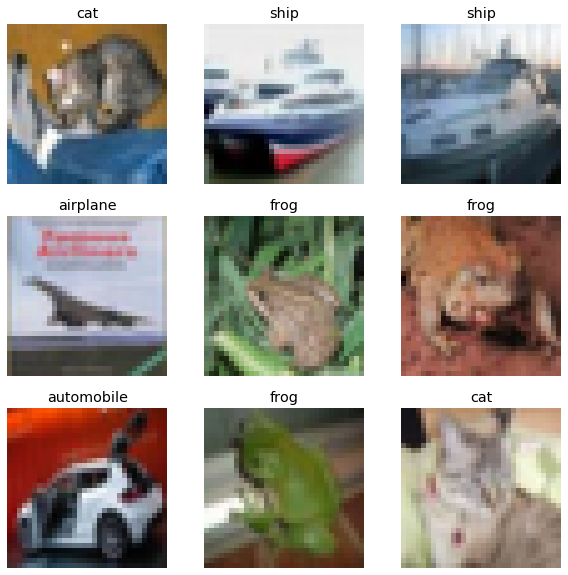

In [12]:
fig = plt.figure(figsize=(10,10))
for i in range(9):
    ax=fig.add_subplot(330+1+i)
    plt.imshow(Image.fromarray(X_test[i]))
    ax.set_title(labelNames[y_test[i]])
    ax.axis("off")
    

In [13]:
# =============================================================================
#  Using the raw values as input features might make models 
#  biased toward features having high magnitude values. 
#  It is still recommended to normalize and scale down the 
#  features, in our case, the images has a maximum of 255 
#  pixels, then it is sufficient divide the dataset by 
#  255.0 to normalize the data.    
# =============================================================================
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train =  X_train/255.0
X_test = X_test/255.0

In [14]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

In [15]:
print(y_train[range(5)])
print(y_test[range(5)])
print(num_classes)

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
10


In [16]:
# apply data augmentation 
# creating data augmentation instance
datagen =  ImageDataGenerator(
        featurewise_center=True,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization= False,
        zca_whitening=False,
        rotation_range=15,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        vertical_flip=False,       
)


In [17]:
datagen.fit(X_train)

In [18]:
num_classes = 10
input_shape = (32,32,3)
kernel = (3,3)
# fix random seed for reproducibility
seed = 101
np.random.seed(seed)

In [19]:
print(num_classes)

10


In [20]:
# Now that we have training and test datasets normalized and the labels converted, 
# the next step is to build the CNN model.

# Since we have two dimensional images (the third dimension is the channel information), 
# we will be using Conv2D layers. The initial few conv layers of the model kind of work 
# toward feature extraction while the last couple of layers (fully connected) help in 
# classifying the data.

# building model
model = Sequential()
model.add(Conv2D(filters=64,kernel_size=kernel,activation= "relu", input_shape = input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,kernel_size = kernel, activation= "relu"))
model.add(MaxPooling2D(pool_size= (2,2)))
model.add(Flatten())
model.add(Dense(1024, activation = "relu",kernel_constraint = max_norm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation="softmax"))


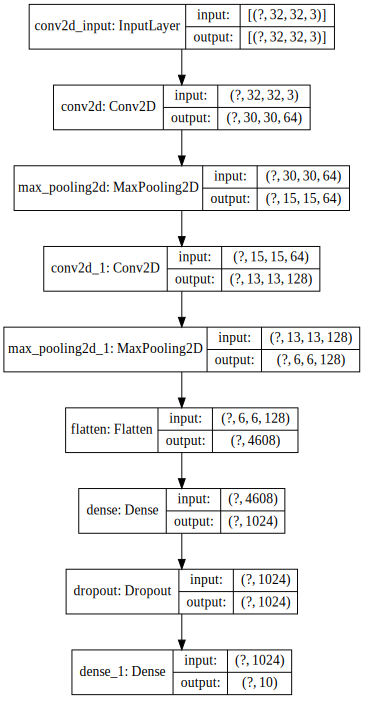

In [67]:
# Visualize the network architecture
SVG(model_to_dot(model, show_layer_names=True, show_shapes= True,rankdir="TB",dpi=70).create(prog="dot",format = "svg"))

In [68]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              4719616   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0

In [84]:
# We use categorical_crossentropy as our loss function since we are dealing with multiple classes. Besides this, 
# we use the Adadelta optimizer and then train the classifier on the training data.

# Compiling Model
batch_size = 50
epochs = 30
lrate = 0.1
epsilon = 1e-08
decay = 1e-4
optimizer = tf.keras.optimizers.Adadelta(lr=lrate)
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])


In [85]:
print(X_train.shape[0])
print(batch_size)
stepPerEpoch=X_train.shape[0]/batch_size
print(stepPerEpoch)

50000
50
1000.0


In [86]:
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),
                    steps_per_epoch=stepPerEpoch, epochs=epochs, verbose= 1,
                    validation_data=(X_test,y_test))


Epoch 1/30


 185/1000 [====>.........................] - ETA: 10:15 - loss: 2.0334 - accuracy: 0.240 - ETA: 9:04 - loss: 1.9583 - accuracy: 0.310 - ETA: 8:33 - loss: 1.9573 - accuracy: 0.28 - ETA: 8:13 - loss: 1.8919 - accuracy: 0.29 - ETA: 7:56 - loss: 1.8741 - accuracy: 0.28 - ETA: 7:41 - loss: 1.8331 - accuracy: 0.32 - ETA: 7:30 - loss: 1.8150 - accuracy: 0.33 - ETA: 7:23 - loss: 1.8041 - accuracy: 0.32 - ETA: 7:15 - loss: 1.8019 - accuracy: 0.32 - ETA: 7:11 - loss: 1.7932 - accuracy: 0.33 - ETA: 7:06 - loss: 1.7974 - accuracy: 0.32 - ETA: 7:03 - loss: 1.8034 - accuracy: 0.32 - ETA: 7:01 - loss: 1.7968 - accuracy: 0.32 - ETA: 6:59 - loss: 1.7920 - accuracy: 0.33 - ETA: 6:56 - loss: 1.7757 - accuracy: 0.33 - ETA: 6:57 - loss: 1.7702 - accuracy: 0.33 - ETA: 6:58 - loss: 1.7732 - accuracy: 0.33 - ETA: 6:58 - loss: 1.7674 - accuracy: 0.33 - ETA: 6:58 - loss: 1.7653 - accuracy: 0.33 - ETA: 6:57 - loss: 1.7540 - accuracy: 0.34 - ETA: 6:56 - loss: 1.7384 - accuracy: 0.34 - ETA: 7:00 - loss: 1.7330 - a

 557/1000 [===============>..............] - ETA: 4:22 - loss: 1.6791 - accuracy: 0.39 - ETA: 4:22 - loss: 1.6790 - accuracy: 0.39 - ETA: 4:21 - loss: 1.6790 - accuracy: 0.39 - ETA: 4:21 - loss: 1.6785 - accuracy: 0.39 - ETA: 4:21 - loss: 1.6782 - accuracy: 0.39 - ETA: 4:20 - loss: 1.6778 - accuracy: 0.39 - ETA: 4:20 - loss: 1.6777 - accuracy: 0.39 - ETA: 4:19 - loss: 1.6779 - accuracy: 0.39 - ETA: 4:19 - loss: 1.6774 - accuracy: 0.39 - ETA: 4:19 - loss: 1.6766 - accuracy: 0.39 - ETA: 4:18 - loss: 1.6765 - accuracy: 0.39 - ETA: 4:18 - loss: 1.6762 - accuracy: 0.39 - ETA: 4:17 - loss: 1.6764 - accuracy: 0.39 - ETA: 4:17 - loss: 1.6763 - accuracy: 0.39 - ETA: 4:17 - loss: 1.6756 - accuracy: 0.39 - ETA: 4:16 - loss: 1.6756 - accuracy: 0.39 - ETA: 4:16 - loss: 1.6753 - accuracy: 0.39 - ETA: 4:15 - loss: 1.6758 - accuracy: 0.39 - ETA: 4:15 - loss: 1.6757 - accuracy: 0.39 - ETA: 4:14 - loss: 1.6757 - accuracy: 0.39 - ETA: 4:14 - loss: 1.6755 - accuracy: 0.39 - ETA: 4:14 - loss: 1.6752 - accu

 743/1000 [=====================>........] - ETA: 3:08 - loss: 1.6552 - accuracy: 0.40 - ETA: 3:08 - loss: 1.6550 - accuracy: 0.40 - ETA: 3:07 - loss: 1.6551 - accuracy: 0.40 - ETA: 3:07 - loss: 1.6549 - accuracy: 0.40 - ETA: 3:06 - loss: 1.6544 - accuracy: 0.40 - ETA: 3:06 - loss: 1.6540 - accuracy: 0.40 - ETA: 3:06 - loss: 1.6539 - accuracy: 0.40 - ETA: 3:05 - loss: 1.6537 - accuracy: 0.40 - ETA: 3:05 - loss: 1.6534 - accuracy: 0.40 - ETA: 3:04 - loss: 1.6532 - accuracy: 0.40 - ETA: 3:04 - loss: 1.6530 - accuracy: 0.40 - ETA: 3:03 - loss: 1.6528 - accuracy: 0.40 - ETA: 3:03 - loss: 1.6526 - accuracy: 0.40 - ETA: 3:02 - loss: 1.6521 - accuracy: 0.40 - ETA: 3:02 - loss: 1.6522 - accuracy: 0.40 - ETA: 3:02 - loss: 1.6522 - accuracy: 0.40 - ETA: 3:01 - loss: 1.6520 - accuracy: 0.40 - ETA: 3:01 - loss: 1.6519 - accuracy: 0.40 - ETA: 3:00 - loss: 1.6518 - accuracy: 0.40 - ETA: 3:00 - loss: 1.6515 - accuracy: 0.40 - ETA: 2:59 - loss: 1.6514 - accuracy: 0.40 - ETA: 2:59 - loss: 1.6518 - accu

 929/1000 [==========================>...] - ETA: 1:50 - loss: 1.6357 - accuracy: 0.40 - ETA: 1:50 - loss: 1.6355 - accuracy: 0.40 - ETA: 1:49 - loss: 1.6352 - accuracy: 0.40 - ETA: 1:49 - loss: 1.6353 - accuracy: 0.40 - ETA: 1:49 - loss: 1.6351 - accuracy: 0.40 - ETA: 1:48 - loss: 1.6348 - accuracy: 0.40 - ETA: 1:48 - loss: 1.6345 - accuracy: 0.40 - ETA: 1:47 - loss: 1.6347 - accuracy: 0.40 - ETA: 1:47 - loss: 1.6345 - accuracy: 0.40 - ETA: 1:47 - loss: 1.6342 - accuracy: 0.40 - ETA: 1:46 - loss: 1.6344 - accuracy: 0.40 - ETA: 1:46 - loss: 1.6340 - accuracy: 0.40 - ETA: 1:45 - loss: 1.6340 - accuracy: 0.40 - ETA: 1:45 - loss: 1.6339 - accuracy: 0.40 - ETA: 1:45 - loss: 1.6338 - accuracy: 0.40 - ETA: 1:44 - loss: 1.6336 - accuracy: 0.40 - ETA: 1:44 - loss: 1.6336 - accuracy: 0.40 - ETA: 1:43 - loss: 1.6332 - accuracy: 0.40 - ETA: 1:43 - loss: 1.6329 - accuracy: 0.40 - ETA: 1:43 - loss: 1.6328 - accuracy: 0.40 - ETA: 1:42 - loss: 1.6330 - accuracy: 0.40 - ETA: 1:42 - loss: 1.6330 - accu

1000/1000 [==============================] - ETA: 30s - loss: 1.6157 - accuracy: 0.414 - ETA: 30s - loss: 1.6158 - accuracy: 0.414 - ETA: 30s - loss: 1.6157 - accuracy: 0.414 - ETA: 29s - loss: 1.6157 - accuracy: 0.414 - ETA: 29s - loss: 1.6156 - accuracy: 0.414 - ETA: 28s - loss: 1.6153 - accuracy: 0.414 - ETA: 28s - loss: 1.6151 - accuracy: 0.414 - ETA: 27s - loss: 1.6151 - accuracy: 0.414 - ETA: 27s - loss: 1.6151 - accuracy: 0.414 - ETA: 26s - loss: 1.6153 - accuracy: 0.414 - ETA: 26s - loss: 1.6151 - accuracy: 0.414 - ETA: 26s - loss: 1.6149 - accuracy: 0.414 - ETA: 25s - loss: 1.6146 - accuracy: 0.414 - ETA: 25s - loss: 1.6147 - accuracy: 0.414 - ETA: 24s - loss: 1.6143 - accuracy: 0.415 - ETA: 24s - loss: 1.6139 - accuracy: 0.415 - ETA: 23s - loss: 1.6136 - accuracy: 0.415 - ETA: 23s - loss: 1.6135 - accuracy: 0.415 - ETA: 23s - loss: 1.6138 - accuracy: 0.415 - ETA: 22s - loss: 1.6137 - accuracy: 0.415 - ETA: 22s - loss: 1.6139 - accuracy: 0.415 - ETA: 21s - loss: 1.6139 - accur

 186/1000 [====>.........................] - ETA: 8:10 - loss: 1.4550 - accuracy: 0.46 - ETA: 7:57 - loss: 1.4977 - accuracy: 0.48 - ETA: 7:49 - loss: 1.4208 - accuracy: 0.51 - ETA: 7:41 - loss: 1.3968 - accuracy: 0.52 - ETA: 7:37 - loss: 1.3761 - accuracy: 0.52 - ETA: 7:42 - loss: 1.4182 - accuracy: 0.49 - ETA: 7:47 - loss: 1.4444 - accuracy: 0.48 - ETA: 7:53 - loss: 1.4399 - accuracy: 0.48 - ETA: 7:51 - loss: 1.4398 - accuracy: 0.47 - ETA: 7:49 - loss: 1.4701 - accuracy: 0.45 - ETA: 7:48 - loss: 1.4863 - accuracy: 0.44 - ETA: 7:47 - loss: 1.4931 - accuracy: 0.45 - ETA: 7:47 - loss: 1.4870 - accuracy: 0.46 - ETA: 7:44 - loss: 1.4903 - accuracy: 0.46 - ETA: 7:44 - loss: 1.4766 - accuracy: 0.46 - ETA: 7:43 - loss: 1.4748 - accuracy: 0.46 - ETA: 7:41 - loss: 1.4685 - accuracy: 0.46 - ETA: 7:39 - loss: 1.4670 - accuracy: 0.46 - ETA: 7:39 - loss: 1.4639 - accuracy: 0.46 - ETA: 7:38 - loss: 1.4659 - accuracy: 0.46 - ETA: 7:37 - loss: 1.4683 - accuracy: 0.46 - ETA: 7:36 - loss: 1.4741 - accu

 558/1000 [===============>..............] - ETA: 4:38 - loss: 1.4891 - accuracy: 0.46 - ETA: 4:37 - loss: 1.4895 - accuracy: 0.46 - ETA: 4:37 - loss: 1.4896 - accuracy: 0.46 - ETA: 4:36 - loss: 1.4893 - accuracy: 0.46 - ETA: 4:36 - loss: 1.4889 - accuracy: 0.46 - ETA: 4:35 - loss: 1.4892 - accuracy: 0.46 - ETA: 4:35 - loss: 1.4894 - accuracy: 0.46 - ETA: 4:34 - loss: 1.4890 - accuracy: 0.46 - ETA: 4:34 - loss: 1.4886 - accuracy: 0.46 - ETA: 4:33 - loss: 1.4885 - accuracy: 0.46 - ETA: 4:33 - loss: 1.4882 - accuracy: 0.46 - ETA: 4:33 - loss: 1.4878 - accuracy: 0.46 - ETA: 4:32 - loss: 1.4876 - accuracy: 0.46 - ETA: 4:32 - loss: 1.4878 - accuracy: 0.46 - ETA: 4:31 - loss: 1.4876 - accuracy: 0.46 - ETA: 4:31 - loss: 1.4887 - accuracy: 0.46 - ETA: 4:30 - loss: 1.4887 - accuracy: 0.46 - ETA: 4:30 - loss: 1.4884 - accuracy: 0.46 - ETA: 4:29 - loss: 1.4887 - accuracy: 0.46 - ETA: 4:29 - loss: 1.4886 - accuracy: 0.46 - ETA: 4:28 - loss: 1.4889 - accuracy: 0.46 - ETA: 4:28 - loss: 1.4891 - accu

 744/1000 [=====================>........] - ETA: 3:12 - loss: 1.4838 - accuracy: 0.46 - ETA: 3:12 - loss: 1.4838 - accuracy: 0.46 - ETA: 3:11 - loss: 1.4834 - accuracy: 0.46 - ETA: 3:11 - loss: 1.4831 - accuracy: 0.46 - ETA: 3:11 - loss: 1.4828 - accuracy: 0.46 - ETA: 3:10 - loss: 1.4825 - accuracy: 0.46 - ETA: 3:10 - loss: 1.4824 - accuracy: 0.46 - ETA: 3:09 - loss: 1.4825 - accuracy: 0.46 - ETA: 3:09 - loss: 1.4826 - accuracy: 0.46 - ETA: 3:08 - loss: 1.4829 - accuracy: 0.46 - ETA: 3:08 - loss: 1.4827 - accuracy: 0.46 - ETA: 3:07 - loss: 1.4830 - accuracy: 0.46 - ETA: 3:07 - loss: 1.4827 - accuracy: 0.46 - ETA: 3:07 - loss: 1.4823 - accuracy: 0.46 - ETA: 3:06 - loss: 1.4826 - accuracy: 0.46 - ETA: 3:06 - loss: 1.4828 - accuracy: 0.46 - ETA: 3:05 - loss: 1.4829 - accuracy: 0.46 - ETA: 3:05 - loss: 1.4830 - accuracy: 0.46 - ETA: 3:04 - loss: 1.4825 - accuracy: 0.46 - ETA: 3:04 - loss: 1.4823 - accuracy: 0.46 - ETA: 3:03 - loss: 1.4823 - accuracy: 0.46 - ETA: 3:03 - loss: 1.4819 - accu

 930/1000 [==========================>...] - ETA: 1:50 - loss: 1.4740 - accuracy: 0.47 - ETA: 1:50 - loss: 1.4737 - accuracy: 0.47 - ETA: 1:49 - loss: 1.4739 - accuracy: 0.47 - ETA: 1:49 - loss: 1.4734 - accuracy: 0.47 - ETA: 1:49 - loss: 1.4733 - accuracy: 0.47 - ETA: 1:48 - loss: 1.4730 - accuracy: 0.47 - ETA: 1:48 - loss: 1.4729 - accuracy: 0.47 - ETA: 1:47 - loss: 1.4729 - accuracy: 0.47 - ETA: 1:47 - loss: 1.4727 - accuracy: 0.47 - ETA: 1:46 - loss: 1.4726 - accuracy: 0.47 - ETA: 1:46 - loss: 1.4727 - accuracy: 0.47 - ETA: 1:45 - loss: 1.4726 - accuracy: 0.47 - ETA: 1:45 - loss: 1.4729 - accuracy: 0.47 - ETA: 1:45 - loss: 1.4728 - accuracy: 0.47 - ETA: 1:44 - loss: 1.4731 - accuracy: 0.47 - ETA: 1:44 - loss: 1.4728 - accuracy: 0.47 - ETA: 1:43 - loss: 1.4726 - accuracy: 0.47 - ETA: 1:43 - loss: 1.4726 - accuracy: 0.47 - ETA: 1:42 - loss: 1.4722 - accuracy: 0.47 - ETA: 1:42 - loss: 1.4725 - accuracy: 0.47 - ETA: 1:41 - loss: 1.4727 - accuracy: 0.47 - ETA: 1:41 - loss: 1.4723 - accu

1000/1000 [==============================] - ETA: 29s - loss: 1.4661 - accuracy: 0.472 - ETA: 29s - loss: 1.4663 - accuracy: 0.472 - ETA: 28s - loss: 1.4663 - accuracy: 0.472 - ETA: 28s - loss: 1.4661 - accuracy: 0.472 - ETA: 27s - loss: 1.4661 - accuracy: 0.472 - ETA: 27s - loss: 1.4658 - accuracy: 0.472 - ETA: 27s - loss: 1.4659 - accuracy: 0.472 - ETA: 26s - loss: 1.4659 - accuracy: 0.472 - ETA: 26s - loss: 1.4662 - accuracy: 0.472 - ETA: 25s - loss: 1.4660 - accuracy: 0.472 - ETA: 25s - loss: 1.4659 - accuracy: 0.472 - ETA: 24s - loss: 1.4657 - accuracy: 0.472 - ETA: 24s - loss: 1.4656 - accuracy: 0.472 - ETA: 24s - loss: 1.4654 - accuracy: 0.472 - ETA: 23s - loss: 1.4654 - accuracy: 0.472 - ETA: 23s - loss: 1.4653 - accuracy: 0.472 - ETA: 22s - loss: 1.4652 - accuracy: 0.472 - ETA: 22s - loss: 1.4651 - accuracy: 0.472 - ETA: 21s - loss: 1.4651 - accuracy: 0.472 - ETA: 21s - loss: 1.4651 - accuracy: 0.472 - ETA: 21s - loss: 1.4649 - accuracy: 0.472 - ETA: 20s - loss: 1.4649 - accur

 186/1000 [====>.........................] - ETA: 6:59 - loss: 1.4446 - accuracy: 0.56 - ETA: 6:56 - loss: 1.4790 - accuracy: 0.47 - ETA: 6:47 - loss: 1.4782 - accuracy: 0.47 - ETA: 6:46 - loss: 1.4218 - accuracy: 0.49 - ETA: 6:40 - loss: 1.4143 - accuracy: 0.50 - ETA: 6:36 - loss: 1.4296 - accuracy: 0.49 - ETA: 6:37 - loss: 1.4491 - accuracy: 0.48 - ETA: 6:35 - loss: 1.4669 - accuracy: 0.47 - ETA: 6:33 - loss: 1.4384 - accuracy: 0.48 - ETA: 6:38 - loss: 1.4292 - accuracy: 0.47 - ETA: 6:35 - loss: 1.4274 - accuracy: 0.46 - ETA: 6:34 - loss: 1.4259 - accuracy: 0.46 - ETA: 6:35 - loss: 1.4357 - accuracy: 0.46 - ETA: 6:34 - loss: 1.4278 - accuracy: 0.48 - ETA: 6:32 - loss: 1.4180 - accuracy: 0.48 - ETA: 6:33 - loss: 1.4243 - accuracy: 0.48 - ETA: 6:33 - loss: 1.4206 - accuracy: 0.48 - ETA: 6:34 - loss: 1.4213 - accuracy: 0.48 - ETA: 6:34 - loss: 1.4293 - accuracy: 0.47 - ETA: 6:34 - loss: 1.4194 - accuracy: 0.48 - ETA: 6:37 - loss: 1.4204 - accuracy: 0.48 - ETA: 6:38 - loss: 1.4187 - accu

 558/1000 [===============>..............] - ETA: 4:16 - loss: 1.4101 - accuracy: 0.49 - ETA: 4:16 - loss: 1.4100 - accuracy: 0.49 - ETA: 4:16 - loss: 1.4095 - accuracy: 0.49 - ETA: 4:15 - loss: 1.4093 - accuracy: 0.49 - ETA: 4:15 - loss: 1.4101 - accuracy: 0.49 - ETA: 4:14 - loss: 1.4102 - accuracy: 0.49 - ETA: 4:14 - loss: 1.4103 - accuracy: 0.49 - ETA: 4:14 - loss: 1.4108 - accuracy: 0.49 - ETA: 4:13 - loss: 1.4106 - accuracy: 0.49 - ETA: 4:13 - loss: 1.4118 - accuracy: 0.49 - ETA: 4:12 - loss: 1.4118 - accuracy: 0.49 - ETA: 4:12 - loss: 1.4112 - accuracy: 0.49 - ETA: 4:11 - loss: 1.4109 - accuracy: 0.49 - ETA: 4:11 - loss: 1.4106 - accuracy: 0.49 - ETA: 4:11 - loss: 1.4105 - accuracy: 0.49 - ETA: 4:10 - loss: 1.4103 - accuracy: 0.49 - ETA: 4:10 - loss: 1.4106 - accuracy: 0.49 - ETA: 4:09 - loss: 1.4108 - accuracy: 0.49 - ETA: 4:09 - loss: 1.4109 - accuracy: 0.49 - ETA: 4:08 - loss: 1.4111 - accuracy: 0.49 - ETA: 4:08 - loss: 1.4110 - accuracy: 0.49 - ETA: 4:08 - loss: 1.4105 - accu

 744/1000 [=====================>........] - ETA: 3:00 - loss: 1.4014 - accuracy: 0.49 - ETA: 2:59 - loss: 1.4011 - accuracy: 0.49 - ETA: 2:59 - loss: 1.4009 - accuracy: 0.49 - ETA: 2:58 - loss: 1.4010 - accuracy: 0.49 - ETA: 2:58 - loss: 1.4012 - accuracy: 0.49 - ETA: 2:58 - loss: 1.4009 - accuracy: 0.49 - ETA: 2:57 - loss: 1.4011 - accuracy: 0.49 - ETA: 2:57 - loss: 1.4009 - accuracy: 0.49 - ETA: 2:56 - loss: 1.4009 - accuracy: 0.49 - ETA: 2:56 - loss: 1.4009 - accuracy: 0.49 - ETA: 2:55 - loss: 1.4007 - accuracy: 0.49 - ETA: 2:55 - loss: 1.4005 - accuracy: 0.49 - ETA: 2:55 - loss: 1.4001 - accuracy: 0.49 - ETA: 2:54 - loss: 1.3998 - accuracy: 0.49 - ETA: 2:54 - loss: 1.3995 - accuracy: 0.49 - ETA: 2:54 - loss: 1.3993 - accuracy: 0.49 - ETA: 2:53 - loss: 1.3991 - accuracy: 0.49 - ETA: 2:53 - loss: 1.3989 - accuracy: 0.49 - ETA: 2:52 - loss: 1.3987 - accuracy: 0.49 - ETA: 2:52 - loss: 1.3987 - accuracy: 0.49 - ETA: 2:51 - loss: 1.3986 - accuracy: 0.49 - ETA: 2:51 - loss: 1.3990 - accu

 930/1000 [==========================>...] - ETA: 1:44 - loss: 1.3901 - accuracy: 0.50 - ETA: 1:43 - loss: 1.3903 - accuracy: 0.50 - ETA: 1:43 - loss: 1.3901 - accuracy: 0.50 - ETA: 1:42 - loss: 1.3903 - accuracy: 0.50 - ETA: 1:42 - loss: 1.3903 - accuracy: 0.50 - ETA: 1:42 - loss: 1.3899 - accuracy: 0.50 - ETA: 1:41 - loss: 1.3898 - accuracy: 0.50 - ETA: 1:41 - loss: 1.3896 - accuracy: 0.50 - ETA: 1:40 - loss: 1.3896 - accuracy: 0.50 - ETA: 1:40 - loss: 1.3898 - accuracy: 0.50 - ETA: 1:39 - loss: 1.3896 - accuracy: 0.50 - ETA: 1:39 - loss: 1.3893 - accuracy: 0.50 - ETA: 1:39 - loss: 1.3893 - accuracy: 0.50 - ETA: 1:38 - loss: 1.3892 - accuracy: 0.50 - ETA: 1:38 - loss: 1.3888 - accuracy: 0.50 - ETA: 1:37 - loss: 1.3888 - accuracy: 0.50 - ETA: 1:37 - loss: 1.3886 - accuracy: 0.50 - ETA: 1:37 - loss: 1.3886 - accuracy: 0.50 - ETA: 1:36 - loss: 1.3884 - accuracy: 0.50 - ETA: 1:36 - loss: 1.3885 - accuracy: 0.50 - ETA: 1:35 - loss: 1.3883 - accuracy: 0.50 - ETA: 1:35 - loss: 1.3884 - accu

1000/1000 [==============================] - ETA: 28s - loss: 1.3817 - accuracy: 0.507 - ETA: 27s - loss: 1.3817 - accuracy: 0.507 - ETA: 27s - loss: 1.3817 - accuracy: 0.506 - ETA: 26s - loss: 1.3818 - accuracy: 0.506 - ETA: 26s - loss: 1.3817 - accuracy: 0.506 - ETA: 26s - loss: 1.3814 - accuracy: 0.506 - ETA: 25s - loss: 1.3813 - accuracy: 0.507 - ETA: 25s - loss: 1.3809 - accuracy: 0.507 - ETA: 24s - loss: 1.3805 - accuracy: 0.507 - ETA: 24s - loss: 1.3805 - accuracy: 0.507 - ETA: 24s - loss: 1.3804 - accuracy: 0.507 - ETA: 23s - loss: 1.3803 - accuracy: 0.507 - ETA: 23s - loss: 1.3803 - accuracy: 0.507 - ETA: 22s - loss: 1.3802 - accuracy: 0.507 - ETA: 22s - loss: 1.3800 - accuracy: 0.507 - ETA: 22s - loss: 1.3804 - accuracy: 0.507 - ETA: 21s - loss: 1.3805 - accuracy: 0.507 - ETA: 21s - loss: 1.3805 - accuracy: 0.507 - ETA: 20s - loss: 1.3803 - accuracy: 0.507 - ETA: 20s - loss: 1.3802 - accuracy: 0.507 - ETA: 19s - loss: 1.3801 - accuracy: 0.507 - ETA: 19s - loss: 1.3802 - accur

 186/1000 [====>.........................] - ETA: 7:23 - loss: 1.5657 - accuracy: 0.42 - ETA: 7:21 - loss: 1.4189 - accuracy: 0.50 - ETA: 7:23 - loss: 1.4290 - accuracy: 0.49 - ETA: 7:18 - loss: 1.3974 - accuracy: 0.50 - ETA: 7:17 - loss: 1.3997 - accuracy: 0.48 - ETA: 7:14 - loss: 1.3771 - accuracy: 0.50 - ETA: 7:09 - loss: 1.3707 - accuracy: 0.50 - ETA: 7:09 - loss: 1.3586 - accuracy: 0.52 - ETA: 7:04 - loss: 1.3538 - accuracy: 0.52 - ETA: 7:01 - loss: 1.3308 - accuracy: 0.54 - ETA: 7:01 - loss: 1.3397 - accuracy: 0.54 - ETA: 6:59 - loss: 1.3635 - accuracy: 0.53 - ETA: 6:57 - loss: 1.3673 - accuracy: 0.53 - ETA: 6:55 - loss: 1.3491 - accuracy: 0.54 - ETA: 6:54 - loss: 1.3442 - accuracy: 0.54 - ETA: 6:54 - loss: 1.3285 - accuracy: 0.54 - ETA: 6:52 - loss: 1.3300 - accuracy: 0.54 - ETA: 6:51 - loss: 1.3372 - accuracy: 0.53 - ETA: 6:51 - loss: 1.3473 - accuracy: 0.53 - ETA: 6:49 - loss: 1.3472 - accuracy: 0.53 - ETA: 6:48 - loss: 1.3416 - accuracy: 0.53 - ETA: 6:48 - loss: 1.3548 - accu

 558/1000 [===============>..............] - ETA: 4:25 - loss: 1.3364 - accuracy: 0.52 - ETA: 4:25 - loss: 1.3363 - accuracy: 0.52 - ETA: 4:24 - loss: 1.3355 - accuracy: 0.52 - ETA: 4:24 - loss: 1.3363 - accuracy: 0.52 - ETA: 4:24 - loss: 1.3356 - accuracy: 0.52 - ETA: 4:23 - loss: 1.3358 - accuracy: 0.52 - ETA: 4:23 - loss: 1.3357 - accuracy: 0.52 - ETA: 4:22 - loss: 1.3354 - accuracy: 0.52 - ETA: 4:22 - loss: 1.3350 - accuracy: 0.52 - ETA: 4:22 - loss: 1.3354 - accuracy: 0.52 - ETA: 4:21 - loss: 1.3355 - accuracy: 0.52 - ETA: 4:21 - loss: 1.3359 - accuracy: 0.52 - ETA: 4:20 - loss: 1.3364 - accuracy: 0.52 - ETA: 4:20 - loss: 1.3371 - accuracy: 0.52 - ETA: 4:19 - loss: 1.3367 - accuracy: 0.52 - ETA: 4:19 - loss: 1.3368 - accuracy: 0.52 - ETA: 4:18 - loss: 1.3368 - accuracy: 0.52 - ETA: 4:18 - loss: 1.3364 - accuracy: 0.52 - ETA: 4:18 - loss: 1.3361 - accuracy: 0.52 - ETA: 4:17 - loss: 1.3362 - accuracy: 0.52 - ETA: 4:17 - loss: 1.3362 - accuracy: 0.52 - ETA: 4:16 - loss: 1.3361 - accu

 744/1000 [=====================>........] - ETA: 3:05 - loss: 1.3296 - accuracy: 0.52 - ETA: 3:05 - loss: 1.3295 - accuracy: 0.52 - ETA: 3:05 - loss: 1.3296 - accuracy: 0.52 - ETA: 3:04 - loss: 1.3295 - accuracy: 0.52 - ETA: 3:04 - loss: 1.3293 - accuracy: 0.52 - ETA: 3:03 - loss: 1.3291 - accuracy: 0.52 - ETA: 3:03 - loss: 1.3286 - accuracy: 0.52 - ETA: 3:02 - loss: 1.3284 - accuracy: 0.52 - ETA: 3:02 - loss: 1.3283 - accuracy: 0.52 - ETA: 3:02 - loss: 1.3279 - accuracy: 0.52 - ETA: 3:01 - loss: 1.3278 - accuracy: 0.52 - ETA: 3:01 - loss: 1.3278 - accuracy: 0.52 - ETA: 3:00 - loss: 1.3276 - accuracy: 0.52 - ETA: 3:00 - loss: 1.3271 - accuracy: 0.52 - ETA: 3:00 - loss: 1.3269 - accuracy: 0.52 - ETA: 2:59 - loss: 1.3269 - accuracy: 0.52 - ETA: 2:59 - loss: 1.3264 - accuracy: 0.52 - ETA: 2:58 - loss: 1.3264 - accuracy: 0.52 - ETA: 2:58 - loss: 1.3261 - accuracy: 0.52 - ETA: 2:57 - loss: 1.3261 - accuracy: 0.52 - ETA: 2:57 - loss: 1.3263 - accuracy: 0.52 - ETA: 2:57 - loss: 1.3265 - accu

 930/1000 [==========================>...] - ETA: 1:47 - loss: 1.3207 - accuracy: 0.52 - ETA: 1:46 - loss: 1.3204 - accuracy: 0.52 - ETA: 1:46 - loss: 1.3202 - accuracy: 0.52 - ETA: 1:45 - loss: 1.3201 - accuracy: 0.53 - ETA: 1:45 - loss: 1.3199 - accuracy: 0.53 - ETA: 1:45 - loss: 1.3199 - accuracy: 0.53 - ETA: 1:44 - loss: 1.3200 - accuracy: 0.52 - ETA: 1:44 - loss: 1.3201 - accuracy: 0.52 - ETA: 1:43 - loss: 1.3202 - accuracy: 0.52 - ETA: 1:43 - loss: 1.3205 - accuracy: 0.52 - ETA: 1:42 - loss: 1.3205 - accuracy: 0.52 - ETA: 1:42 - loss: 1.3207 - accuracy: 0.52 - ETA: 1:42 - loss: 1.3207 - accuracy: 0.53 - ETA: 1:41 - loss: 1.3206 - accuracy: 0.53 - ETA: 1:41 - loss: 1.3203 - accuracy: 0.53 - ETA: 1:40 - loss: 1.3202 - accuracy: 0.53 - ETA: 1:40 - loss: 1.3204 - accuracy: 0.53 - ETA: 1:39 - loss: 1.3203 - accuracy: 0.53 - ETA: 1:39 - loss: 1.3202 - accuracy: 0.53 - ETA: 1:39 - loss: 1.3201 - accuracy: 0.53 - ETA: 1:38 - loss: 1.3201 - accuracy: 0.53 - ETA: 1:38 - loss: 1.3199 - accu

1000/1000 [==============================] - ETA: 28s - loss: 1.3152 - accuracy: 0.532 - ETA: 28s - loss: 1.3151 - accuracy: 0.532 - ETA: 27s - loss: 1.3150 - accuracy: 0.532 - ETA: 27s - loss: 1.3150 - accuracy: 0.532 - ETA: 27s - loss: 1.3150 - accuracy: 0.532 - ETA: 26s - loss: 1.3149 - accuracy: 0.532 - ETA: 26s - loss: 1.3146 - accuracy: 0.532 - ETA: 25s - loss: 1.3146 - accuracy: 0.532 - ETA: 25s - loss: 1.3144 - accuracy: 0.532 - ETA: 25s - loss: 1.3144 - accuracy: 0.532 - ETA: 24s - loss: 1.3145 - accuracy: 0.532 - ETA: 24s - loss: 1.3145 - accuracy: 0.532 - ETA: 23s - loss: 1.3144 - accuracy: 0.532 - ETA: 23s - loss: 1.3145 - accuracy: 0.532 - ETA: 22s - loss: 1.3144 - accuracy: 0.532 - ETA: 22s - loss: 1.3143 - accuracy: 0.532 - ETA: 22s - loss: 1.3141 - accuracy: 0.532 - ETA: 21s - loss: 1.3141 - accuracy: 0.532 - ETA: 21s - loss: 1.3140 - accuracy: 0.532 - ETA: 20s - loss: 1.3143 - accuracy: 0.532 - ETA: 20s - loss: 1.3143 - accuracy: 0.532 - ETA: 20s - loss: 1.3138 - accur

 186/1000 [====>.........................] - ETA: 7:12 - loss: 1.2794 - accuracy: 0.46 - ETA: 6:48 - loss: 1.1521 - accuracy: 0.56 - ETA: 6:46 - loss: 1.1425 - accuracy: 0.57 - ETA: 6:47 - loss: 1.2513 - accuracy: 0.54 - ETA: 6:41 - loss: 1.2477 - accuracy: 0.55 - ETA: 6:39 - loss: 1.2182 - accuracy: 0.56 - ETA: 6:40 - loss: 1.2250 - accuracy: 0.56 - ETA: 6:36 - loss: 1.2204 - accuracy: 0.56 - ETA: 6:35 - loss: 1.2358 - accuracy: 0.56 - ETA: 6:34 - loss: 1.2406 - accuracy: 0.56 - ETA: 6:31 - loss: 1.2636 - accuracy: 0.54 - ETA: 6:31 - loss: 1.2568 - accuracy: 0.55 - ETA: 6:31 - loss: 1.2534 - accuracy: 0.55 - ETA: 6:29 - loss: 1.2622 - accuracy: 0.54 - ETA: 6:30 - loss: 1.2676 - accuracy: 0.54 - ETA: 6:28 - loss: 1.2632 - accuracy: 0.55 - ETA: 6:27 - loss: 1.2707 - accuracy: 0.55 - ETA: 6:27 - loss: 1.2711 - accuracy: 0.55 - ETA: 6:26 - loss: 1.2799 - accuracy: 0.54 - ETA: 6:26 - loss: 1.2857 - accuracy: 0.54 - ETA: 6:26 - loss: 1.2781 - accuracy: 0.54 - ETA: 6:25 - loss: 1.2738 - accu

 558/1000 [===============>..............] - ETA: 4:15 - loss: 1.2719 - accuracy: 0.55 - ETA: 4:15 - loss: 1.2716 - accuracy: 0.55 - ETA: 4:15 - loss: 1.2715 - accuracy: 0.55 - ETA: 4:14 - loss: 1.2712 - accuracy: 0.55 - ETA: 4:14 - loss: 1.2717 - accuracy: 0.55 - ETA: 4:13 - loss: 1.2720 - accuracy: 0.55 - ETA: 4:13 - loss: 1.2720 - accuracy: 0.55 - ETA: 4:12 - loss: 1.2717 - accuracy: 0.55 - ETA: 4:12 - loss: 1.2716 - accuracy: 0.55 - ETA: 4:12 - loss: 1.2717 - accuracy: 0.55 - ETA: 4:11 - loss: 1.2722 - accuracy: 0.55 - ETA: 4:11 - loss: 1.2720 - accuracy: 0.55 - ETA: 4:11 - loss: 1.2720 - accuracy: 0.55 - ETA: 4:10 - loss: 1.2716 - accuracy: 0.55 - ETA: 4:10 - loss: 1.2711 - accuracy: 0.55 - ETA: 4:09 - loss: 1.2711 - accuracy: 0.55 - ETA: 4:09 - loss: 1.2706 - accuracy: 0.55 - ETA: 4:09 - loss: 1.2703 - accuracy: 0.55 - ETA: 4:08 - loss: 1.2706 - accuracy: 0.55 - ETA: 4:08 - loss: 1.2703 - accuracy: 0.55 - ETA: 4:07 - loss: 1.2708 - accuracy: 0.55 - ETA: 4:07 - loss: 1.2705 - accu

 744/1000 [=====================>........] - ETA: 3:00 - loss: 1.2687 - accuracy: 0.55 - ETA: 2:59 - loss: 1.2684 - accuracy: 0.55 - ETA: 2:59 - loss: 1.2682 - accuracy: 0.55 - ETA: 2:58 - loss: 1.2685 - accuracy: 0.55 - ETA: 2:58 - loss: 1.2681 - accuracy: 0.55 - ETA: 2:57 - loss: 1.2680 - accuracy: 0.55 - ETA: 2:57 - loss: 1.2679 - accuracy: 0.55 - ETA: 2:57 - loss: 1.2675 - accuracy: 0.55 - ETA: 2:56 - loss: 1.2678 - accuracy: 0.55 - ETA: 2:56 - loss: 1.2672 - accuracy: 0.55 - ETA: 2:55 - loss: 1.2670 - accuracy: 0.55 - ETA: 2:55 - loss: 1.2671 - accuracy: 0.55 - ETA: 2:55 - loss: 1.2671 - accuracy: 0.55 - ETA: 2:54 - loss: 1.2671 - accuracy: 0.55 - ETA: 2:54 - loss: 1.2673 - accuracy: 0.55 - ETA: 2:53 - loss: 1.2675 - accuracy: 0.55 - ETA: 2:53 - loss: 1.2676 - accuracy: 0.55 - ETA: 2:52 - loss: 1.2673 - accuracy: 0.55 - ETA: 2:52 - loss: 1.2669 - accuracy: 0.55 - ETA: 2:52 - loss: 1.2669 - accuracy: 0.55 - ETA: 2:51 - loss: 1.2667 - accuracy: 0.55 - ETA: 2:51 - loss: 1.2669 - accu

 930/1000 [==========================>...] - ETA: 1:43 - loss: 1.2636 - accuracy: 0.55 - ETA: 1:43 - loss: 1.2638 - accuracy: 0.55 - ETA: 1:43 - loss: 1.2638 - accuracy: 0.55 - ETA: 1:42 - loss: 1.2637 - accuracy: 0.55 - ETA: 1:42 - loss: 1.2640 - accuracy: 0.55 - ETA: 1:41 - loss: 1.2635 - accuracy: 0.55 - ETA: 1:41 - loss: 1.2633 - accuracy: 0.55 - ETA: 1:41 - loss: 1.2632 - accuracy: 0.55 - ETA: 1:40 - loss: 1.2629 - accuracy: 0.55 - ETA: 1:40 - loss: 1.2628 - accuracy: 0.55 - ETA: 1:39 - loss: 1.2626 - accuracy: 0.55 - ETA: 1:39 - loss: 1.2623 - accuracy: 0.55 - ETA: 1:39 - loss: 1.2622 - accuracy: 0.55 - ETA: 1:38 - loss: 1.2620 - accuracy: 0.55 - ETA: 1:38 - loss: 1.2620 - accuracy: 0.55 - ETA: 1:37 - loss: 1.2618 - accuracy: 0.55 - ETA: 1:37 - loss: 1.2618 - accuracy: 0.55 - ETA: 1:36 - loss: 1.2616 - accuracy: 0.55 - ETA: 1:36 - loss: 1.2617 - accuracy: 0.55 - ETA: 1:36 - loss: 1.2617 - accuracy: 0.55 - ETA: 1:35 - loss: 1.2622 - accuracy: 0.55 - ETA: 1:35 - loss: 1.2621 - accu

1000/1000 [==============================] - ETA: 28s - loss: 1.2577 - accuracy: 0.554 - ETA: 27s - loss: 1.2578 - accuracy: 0.554 - ETA: 27s - loss: 1.2577 - accuracy: 0.554 - ETA: 26s - loss: 1.2575 - accuracy: 0.554 - ETA: 26s - loss: 1.2574 - accuracy: 0.554 - ETA: 26s - loss: 1.2574 - accuracy: 0.554 - ETA: 25s - loss: 1.2573 - accuracy: 0.554 - ETA: 25s - loss: 1.2572 - accuracy: 0.554 - ETA: 24s - loss: 1.2571 - accuracy: 0.554 - ETA: 24s - loss: 1.2571 - accuracy: 0.554 - ETA: 24s - loss: 1.2568 - accuracy: 0.554 - ETA: 23s - loss: 1.2566 - accuracy: 0.554 - ETA: 23s - loss: 1.2567 - accuracy: 0.554 - ETA: 22s - loss: 1.2566 - accuracy: 0.554 - ETA: 22s - loss: 1.2569 - accuracy: 0.554 - ETA: 21s - loss: 1.2568 - accuracy: 0.554 - ETA: 21s - loss: 1.2566 - accuracy: 0.554 - ETA: 21s - loss: 1.2567 - accuracy: 0.554 - ETA: 20s - loss: 1.2570 - accuracy: 0.554 - ETA: 20s - loss: 1.2568 - accuracy: 0.554 - ETA: 19s - loss: 1.2570 - accuracy: 0.554 - ETA: 19s - loss: 1.2568 - accur

 186/1000 [====>.........................] - ETA: 6:52 - loss: 1.3692 - accuracy: 0.58 - ETA: 6:51 - loss: 1.2713 - accuracy: 0.60 - ETA: 7:00 - loss: 1.2401 - accuracy: 0.56 - ETA: 6:56 - loss: 1.2283 - accuracy: 0.58 - ETA: 6:55 - loss: 1.2042 - accuracy: 0.58 - ETA: 6:55 - loss: 1.2041 - accuracy: 0.58 - ETA: 6:55 - loss: 1.2004 - accuracy: 0.57 - ETA: 6:57 - loss: 1.2197 - accuracy: 0.56 - ETA: 6:59 - loss: 1.2213 - accuracy: 0.56 - ETA: 7:03 - loss: 1.2051 - accuracy: 0.56 - ETA: 7:07 - loss: 1.2009 - accuracy: 0.56 - ETA: 7:07 - loss: 1.2074 - accuracy: 0.57 - ETA: 7:09 - loss: 1.2063 - accuracy: 0.57 - ETA: 7:10 - loss: 1.1991 - accuracy: 0.57 - ETA: 7:11 - loss: 1.2045 - accuracy: 0.56 - ETA: 7:12 - loss: 1.2241 - accuracy: 0.56 - ETA: 7:09 - loss: 1.2237 - accuracy: 0.56 - ETA: 7:08 - loss: 1.2277 - accuracy: 0.56 - ETA: 7:08 - loss: 1.2204 - accuracy: 0.56 - ETA: 7:05 - loss: 1.2120 - accuracy: 0.56 - ETA: 7:05 - loss: 1.2131 - accuracy: 0.56 - ETA: 7:03 - loss: 1.2098 - accu

 558/1000 [===============>..............] - ETA: 4:15 - loss: 1.2200 - accuracy: 0.56 - ETA: 4:15 - loss: 1.2195 - accuracy: 0.56 - ETA: 4:15 - loss: 1.2191 - accuracy: 0.56 - ETA: 4:14 - loss: 1.2186 - accuracy: 0.56 - ETA: 4:14 - loss: 1.2186 - accuracy: 0.56 - ETA: 4:13 - loss: 1.2192 - accuracy: 0.56 - ETA: 4:13 - loss: 1.2189 - accuracy: 0.56 - ETA: 4:12 - loss: 1.2187 - accuracy: 0.56 - ETA: 4:12 - loss: 1.2188 - accuracy: 0.56 - ETA: 4:12 - loss: 1.2186 - accuracy: 0.56 - ETA: 4:11 - loss: 1.2184 - accuracy: 0.56 - ETA: 4:11 - loss: 1.2190 - accuracy: 0.56 - ETA: 4:10 - loss: 1.2191 - accuracy: 0.56 - ETA: 4:10 - loss: 1.2194 - accuracy: 0.56 - ETA: 4:09 - loss: 1.2189 - accuracy: 0.56 - ETA: 4:09 - loss: 1.2190 - accuracy: 0.56 - ETA: 4:09 - loss: 1.2191 - accuracy: 0.56 - ETA: 4:08 - loss: 1.2196 - accuracy: 0.56 - ETA: 4:08 - loss: 1.2197 - accuracy: 0.56 - ETA: 4:07 - loss: 1.2203 - accuracy: 0.56 - ETA: 4:07 - loss: 1.2202 - accuracy: 0.56 - ETA: 4:06 - loss: 1.2198 - accu

 744/1000 [=====================>........] - ETA: 3:00 - loss: 1.2157 - accuracy: 0.56 - ETA: 2:59 - loss: 1.2161 - accuracy: 0.56 - ETA: 2:59 - loss: 1.2162 - accuracy: 0.56 - ETA: 2:58 - loss: 1.2162 - accuracy: 0.56 - ETA: 2:58 - loss: 1.2161 - accuracy: 0.56 - ETA: 2:58 - loss: 1.2159 - accuracy: 0.56 - ETA: 2:57 - loss: 1.2157 - accuracy: 0.56 - ETA: 2:57 - loss: 1.2153 - accuracy: 0.56 - ETA: 2:56 - loss: 1.2152 - accuracy: 0.56 - ETA: 2:56 - loss: 1.2152 - accuracy: 0.56 - ETA: 2:56 - loss: 1.2152 - accuracy: 0.56 - ETA: 2:55 - loss: 1.2150 - accuracy: 0.56 - ETA: 2:55 - loss: 1.2154 - accuracy: 0.56 - ETA: 2:54 - loss: 1.2154 - accuracy: 0.56 - ETA: 2:54 - loss: 1.2154 - accuracy: 0.56 - ETA: 2:53 - loss: 1.2154 - accuracy: 0.56 - ETA: 2:53 - loss: 1.2157 - accuracy: 0.56 - ETA: 2:53 - loss: 1.2156 - accuracy: 0.56 - ETA: 2:52 - loss: 1.2152 - accuracy: 0.56 - ETA: 2:52 - loss: 1.2153 - accuracy: 0.56 - ETA: 2:51 - loss: 1.2156 - accuracy: 0.56 - ETA: 2:51 - loss: 1.2156 - accu

 930/1000 [==========================>...] - ETA: 1:43 - loss: 1.2133 - accuracy: 0.57 - ETA: 1:43 - loss: 1.2132 - accuracy: 0.57 - ETA: 1:43 - loss: 1.2132 - accuracy: 0.57 - ETA: 1:42 - loss: 1.2133 - accuracy: 0.57 - ETA: 1:42 - loss: 1.2131 - accuracy: 0.57 - ETA: 1:41 - loss: 1.2132 - accuracy: 0.57 - ETA: 1:41 - loss: 1.2134 - accuracy: 0.57 - ETA: 1:40 - loss: 1.2130 - accuracy: 0.57 - ETA: 1:40 - loss: 1.2129 - accuracy: 0.57 - ETA: 1:40 - loss: 1.2131 - accuracy: 0.57 - ETA: 1:39 - loss: 1.2129 - accuracy: 0.57 - ETA: 1:39 - loss: 1.2128 - accuracy: 0.57 - ETA: 1:39 - loss: 1.2127 - accuracy: 0.57 - ETA: 1:38 - loss: 1.2128 - accuracy: 0.57 - ETA: 1:38 - loss: 1.2126 - accuracy: 0.57 - ETA: 1:37 - loss: 1.2130 - accuracy: 0.57 - ETA: 1:37 - loss: 1.2130 - accuracy: 0.57 - ETA: 1:36 - loss: 1.2124 - accuracy: 0.57 - ETA: 1:36 - loss: 1.2125 - accuracy: 0.57 - ETA: 1:36 - loss: 1.2125 - accuracy: 0.57 - ETA: 1:35 - loss: 1.2127 - accuracy: 0.57 - ETA: 1:35 - loss: 1.2125 - accu

1000/1000 [==============================] - ETA: 28s - loss: 1.2098 - accuracy: 0.570 - ETA: 27s - loss: 1.2098 - accuracy: 0.571 - ETA: 27s - loss: 1.2097 - accuracy: 0.571 - ETA: 26s - loss: 1.2099 - accuracy: 0.571 - ETA: 26s - loss: 1.2099 - accuracy: 0.571 - ETA: 26s - loss: 1.2097 - accuracy: 0.571 - ETA: 25s - loss: 1.2100 - accuracy: 0.570 - ETA: 25s - loss: 1.2103 - accuracy: 0.570 - ETA: 24s - loss: 1.2102 - accuracy: 0.570 - ETA: 24s - loss: 1.2100 - accuracy: 0.570 - ETA: 24s - loss: 1.2098 - accuracy: 0.571 - ETA: 23s - loss: 1.2096 - accuracy: 0.571 - ETA: 23s - loss: 1.2096 - accuracy: 0.570 - ETA: 22s - loss: 1.2097 - accuracy: 0.571 - ETA: 22s - loss: 1.2097 - accuracy: 0.570 - ETA: 22s - loss: 1.2098 - accuracy: 0.570 - ETA: 21s - loss: 1.2097 - accuracy: 0.570 - ETA: 21s - loss: 1.2097 - accuracy: 0.570 - ETA: 20s - loss: 1.2100 - accuracy: 0.570 - ETA: 20s - loss: 1.2099 - accuracy: 0.570 - ETA: 19s - loss: 1.2097 - accuracy: 0.570 - ETA: 19s - loss: 1.2096 - accur

 186/1000 [====>.........................] - ETA: 6:41 - loss: 1.0973 - accuracy: 0.64 - ETA: 6:44 - loss: 1.1159 - accuracy: 0.61 - ETA: 6:44 - loss: 1.0938 - accuracy: 0.60 - ETA: 6:39 - loss: 1.1225 - accuracy: 0.58 - ETA: 6:39 - loss: 1.1856 - accuracy: 0.55 - ETA: 6:38 - loss: 1.1875 - accuracy: 0.55 - ETA: 6:34 - loss: 1.1882 - accuracy: 0.55 - ETA: 6:34 - loss: 1.1773 - accuracy: 0.56 - ETA: 6:33 - loss: 1.1649 - accuracy: 0.56 - ETA: 6:31 - loss: 1.1816 - accuracy: 0.56 - ETA: 6:32 - loss: 1.1855 - accuracy: 0.55 - ETA: 6:32 - loss: 1.1843 - accuracy: 0.55 - ETA: 6:31 - loss: 1.1951 - accuracy: 0.55 - ETA: 6:31 - loss: 1.2004 - accuracy: 0.54 - ETA: 6:30 - loss: 1.1881 - accuracy: 0.55 - ETA: 6:29 - loss: 1.1788 - accuracy: 0.56 - ETA: 6:29 - loss: 1.1729 - accuracy: 0.56 - ETA: 6:29 - loss: 1.1792 - accuracy: 0.56 - ETA: 6:28 - loss: 1.1739 - accuracy: 0.56 - ETA: 6:28 - loss: 1.1802 - accuracy: 0.55 - ETA: 6:27 - loss: 1.1753 - accuracy: 0.55 - ETA: 6:26 - loss: 1.1718 - accu

 558/1000 [===============>..............] - ETA: 4:15 - loss: 1.1820 - accuracy: 0.58 - ETA: 4:14 - loss: 1.1816 - accuracy: 0.58 - ETA: 4:14 - loss: 1.1815 - accuracy: 0.58 - ETA: 4:13 - loss: 1.1818 - accuracy: 0.58 - ETA: 4:13 - loss: 1.1818 - accuracy: 0.58 - ETA: 4:13 - loss: 1.1823 - accuracy: 0.58 - ETA: 4:12 - loss: 1.1823 - accuracy: 0.58 - ETA: 4:12 - loss: 1.1818 - accuracy: 0.58 - ETA: 4:11 - loss: 1.1815 - accuracy: 0.58 - ETA: 4:11 - loss: 1.1813 - accuracy: 0.58 - ETA: 4:11 - loss: 1.1814 - accuracy: 0.58 - ETA: 4:10 - loss: 1.1816 - accuracy: 0.58 - ETA: 4:10 - loss: 1.1815 - accuracy: 0.58 - ETA: 4:10 - loss: 1.1817 - accuracy: 0.58 - ETA: 4:09 - loss: 1.1817 - accuracy: 0.58 - ETA: 4:09 - loss: 1.1813 - accuracy: 0.58 - ETA: 4:08 - loss: 1.1805 - accuracy: 0.58 - ETA: 4:08 - loss: 1.1805 - accuracy: 0.58 - ETA: 4:08 - loss: 1.1804 - accuracy: 0.58 - ETA: 4:07 - loss: 1.1802 - accuracy: 0.58 - ETA: 4:07 - loss: 1.1803 - accuracy: 0.58 - ETA: 4:06 - loss: 1.1802 - accu

 744/1000 [=====================>........] - ETA: 3:00 - loss: 1.1754 - accuracy: 0.58 - ETA: 2:59 - loss: 1.1752 - accuracy: 0.58 - ETA: 2:59 - loss: 1.1755 - accuracy: 0.58 - ETA: 2:58 - loss: 1.1759 - accuracy: 0.58 - ETA: 2:58 - loss: 1.1758 - accuracy: 0.58 - ETA: 2:57 - loss: 1.1763 - accuracy: 0.58 - ETA: 2:57 - loss: 1.1762 - accuracy: 0.58 - ETA: 2:57 - loss: 1.1762 - accuracy: 0.58 - ETA: 2:56 - loss: 1.1769 - accuracy: 0.58 - ETA: 2:56 - loss: 1.1770 - accuracy: 0.58 - ETA: 2:55 - loss: 1.1769 - accuracy: 0.58 - ETA: 2:55 - loss: 1.1766 - accuracy: 0.58 - ETA: 2:55 - loss: 1.1761 - accuracy: 0.58 - ETA: 2:54 - loss: 1.1766 - accuracy: 0.58 - ETA: 2:54 - loss: 1.1765 - accuracy: 0.58 - ETA: 2:53 - loss: 1.1768 - accuracy: 0.58 - ETA: 2:53 - loss: 1.1766 - accuracy: 0.58 - ETA: 2:53 - loss: 1.1771 - accuracy: 0.58 - ETA: 2:52 - loss: 1.1770 - accuracy: 0.58 - ETA: 2:52 - loss: 1.1767 - accuracy: 0.58 - ETA: 2:51 - loss: 1.1771 - accuracy: 0.58 - ETA: 2:51 - loss: 1.1772 - accu

 930/1000 [==========================>...] - ETA: 1:43 - loss: 1.1743 - accuracy: 0.58 - ETA: 1:43 - loss: 1.1744 - accuracy: 0.58 - ETA: 1:43 - loss: 1.1743 - accuracy: 0.58 - ETA: 1:42 - loss: 1.1744 - accuracy: 0.58 - ETA: 1:42 - loss: 1.1742 - accuracy: 0.58 - ETA: 1:41 - loss: 1.1742 - accuracy: 0.58 - ETA: 1:41 - loss: 1.1742 - accuracy: 0.58 - ETA: 1:40 - loss: 1.1741 - accuracy: 0.58 - ETA: 1:40 - loss: 1.1743 - accuracy: 0.58 - ETA: 1:40 - loss: 1.1743 - accuracy: 0.58 - ETA: 1:39 - loss: 1.1743 - accuracy: 0.58 - ETA: 1:39 - loss: 1.1744 - accuracy: 0.58 - ETA: 1:38 - loss: 1.1740 - accuracy: 0.58 - ETA: 1:38 - loss: 1.1740 - accuracy: 0.58 - ETA: 1:38 - loss: 1.1741 - accuracy: 0.58 - ETA: 1:37 - loss: 1.1742 - accuracy: 0.58 - ETA: 1:37 - loss: 1.1740 - accuracy: 0.58 - ETA: 1:36 - loss: 1.1742 - accuracy: 0.58 - ETA: 1:36 - loss: 1.1740 - accuracy: 0.58 - ETA: 1:36 - loss: 1.1741 - accuracy: 0.58 - ETA: 1:35 - loss: 1.1743 - accuracy: 0.58 - ETA: 1:35 - loss: 1.1745 - accu

1000/1000 [==============================] - ETA: 28s - loss: 1.1685 - accuracy: 0.588 - ETA: 27s - loss: 1.1686 - accuracy: 0.588 - ETA: 27s - loss: 1.1686 - accuracy: 0.588 - ETA: 26s - loss: 1.1686 - accuracy: 0.587 - ETA: 26s - loss: 1.1687 - accuracy: 0.587 - ETA: 26s - loss: 1.1686 - accuracy: 0.587 - ETA: 25s - loss: 1.1688 - accuracy: 0.587 - ETA: 25s - loss: 1.1688 - accuracy: 0.587 - ETA: 24s - loss: 1.1686 - accuracy: 0.587 - ETA: 24s - loss: 1.1685 - accuracy: 0.587 - ETA: 24s - loss: 1.1684 - accuracy: 0.587 - ETA: 23s - loss: 1.1685 - accuracy: 0.587 - ETA: 23s - loss: 1.1685 - accuracy: 0.587 - ETA: 22s - loss: 1.1683 - accuracy: 0.587 - ETA: 22s - loss: 1.1684 - accuracy: 0.588 - ETA: 21s - loss: 1.1685 - accuracy: 0.588 - ETA: 21s - loss: 1.1684 - accuracy: 0.588 - ETA: 21s - loss: 1.1683 - accuracy: 0.588 - ETA: 20s - loss: 1.1684 - accuracy: 0.588 - ETA: 20s - loss: 1.1684 - accuracy: 0.588 - ETA: 19s - loss: 1.1683 - accuracy: 0.588 - ETA: 19s - loss: 1.1680 - accur

 186/1000 [====>.........................] - ETA: 6:45 - loss: 1.3292 - accuracy: 0.46 - ETA: 6:40 - loss: 1.2396 - accuracy: 0.51 - ETA: 6:34 - loss: 1.3049 - accuracy: 0.52 - ETA: 6:42 - loss: 1.2159 - accuracy: 0.56 - ETA: 6:46 - loss: 1.1981 - accuracy: 0.56 - ETA: 6:48 - loss: 1.1901 - accuracy: 0.56 - ETA: 6:56 - loss: 1.1850 - accuracy: 0.55 - ETA: 6:56 - loss: 1.1726 - accuracy: 0.55 - ETA: 6:56 - loss: 1.1802 - accuracy: 0.54 - ETA: 6:54 - loss: 1.1887 - accuracy: 0.54 - ETA: 6:57 - loss: 1.1790 - accuracy: 0.55 - ETA: 6:55 - loss: 1.1697 - accuracy: 0.56 - ETA: 6:54 - loss: 1.1486 - accuracy: 0.57 - ETA: 6:50 - loss: 1.1509 - accuracy: 0.57 - ETA: 6:50 - loss: 1.1518 - accuracy: 0.57 - ETA: 6:49 - loss: 1.1539 - accuracy: 0.56 - ETA: 6:46 - loss: 1.1574 - accuracy: 0.57 - ETA: 6:46 - loss: 1.1507 - accuracy: 0.57 - ETA: 6:44 - loss: 1.1402 - accuracy: 0.58 - ETA: 6:43 - loss: 1.1344 - accuracy: 0.58 - ETA: 6:42 - loss: 1.1317 - accuracy: 0.58 - ETA: 6:41 - loss: 1.1298 - accu

 558/1000 [===============>..............] - ETA: 4:15 - loss: 1.1466 - accuracy: 0.59 - ETA: 4:14 - loss: 1.1465 - accuracy: 0.59 - ETA: 4:14 - loss: 1.1472 - accuracy: 0.59 - ETA: 4:13 - loss: 1.1469 - accuracy: 0.59 - ETA: 4:13 - loss: 1.1470 - accuracy: 0.59 - ETA: 4:13 - loss: 1.1477 - accuracy: 0.59 - ETA: 4:12 - loss: 1.1472 - accuracy: 0.59 - ETA: 4:12 - loss: 1.1468 - accuracy: 0.59 - ETA: 4:11 - loss: 1.1462 - accuracy: 0.59 - ETA: 4:11 - loss: 1.1460 - accuracy: 0.59 - ETA: 4:10 - loss: 1.1460 - accuracy: 0.59 - ETA: 4:10 - loss: 1.1458 - accuracy: 0.59 - ETA: 4:10 - loss: 1.1457 - accuracy: 0.59 - ETA: 4:09 - loss: 1.1462 - accuracy: 0.59 - ETA: 4:09 - loss: 1.1457 - accuracy: 0.59 - ETA: 4:08 - loss: 1.1456 - accuracy: 0.59 - ETA: 4:08 - loss: 1.1450 - accuracy: 0.59 - ETA: 4:07 - loss: 1.1450 - accuracy: 0.59 - ETA: 4:07 - loss: 1.1454 - accuracy: 0.59 - ETA: 4:07 - loss: 1.1456 - accuracy: 0.59 - ETA: 4:06 - loss: 1.1458 - accuracy: 0.59 - ETA: 4:06 - loss: 1.1456 - accu

 744/1000 [=====================>........] - ETA: 2:59 - loss: 1.1398 - accuracy: 0.59 - ETA: 2:58 - loss: 1.1399 - accuracy: 0.59 - ETA: 2:58 - loss: 1.1395 - accuracy: 0.59 - ETA: 2:57 - loss: 1.1396 - accuracy: 0.59 - ETA: 2:57 - loss: 1.1391 - accuracy: 0.59 - ETA: 2:57 - loss: 1.1392 - accuracy: 0.59 - ETA: 2:56 - loss: 1.1391 - accuracy: 0.59 - ETA: 2:56 - loss: 1.1388 - accuracy: 0.59 - ETA: 2:55 - loss: 1.1388 - accuracy: 0.59 - ETA: 2:55 - loss: 1.1384 - accuracy: 0.59 - ETA: 2:54 - loss: 1.1384 - accuracy: 0.59 - ETA: 2:54 - loss: 1.1385 - accuracy: 0.59 - ETA: 2:54 - loss: 1.1388 - accuracy: 0.59 - ETA: 2:53 - loss: 1.1387 - accuracy: 0.59 - ETA: 2:53 - loss: 1.1392 - accuracy: 0.59 - ETA: 2:52 - loss: 1.1388 - accuracy: 0.59 - ETA: 2:52 - loss: 1.1385 - accuracy: 0.59 - ETA: 2:52 - loss: 1.1388 - accuracy: 0.59 - ETA: 2:51 - loss: 1.1389 - accuracy: 0.59 - ETA: 2:51 - loss: 1.1389 - accuracy: 0.59 - ETA: 2:50 - loss: 1.1390 - accuracy: 0.59 - ETA: 2:50 - loss: 1.1389 - accu

 930/1000 [==========================>...] - ETA: 1:43 - loss: 1.1377 - accuracy: 0.59 - ETA: 1:43 - loss: 1.1379 - accuracy: 0.59 - ETA: 1:42 - loss: 1.1380 - accuracy: 0.59 - ETA: 1:42 - loss: 1.1379 - accuracy: 0.59 - ETA: 1:41 - loss: 1.1376 - accuracy: 0.59 - ETA: 1:41 - loss: 1.1379 - accuracy: 0.59 - ETA: 1:41 - loss: 1.1379 - accuracy: 0.59 - ETA: 1:40 - loss: 1.1377 - accuracy: 0.59 - ETA: 1:40 - loss: 1.1377 - accuracy: 0.59 - ETA: 1:39 - loss: 1.1380 - accuracy: 0.59 - ETA: 1:39 - loss: 1.1379 - accuracy: 0.59 - ETA: 1:39 - loss: 1.1377 - accuracy: 0.59 - ETA: 1:38 - loss: 1.1376 - accuracy: 0.59 - ETA: 1:38 - loss: 1.1379 - accuracy: 0.59 - ETA: 1:37 - loss: 1.1378 - accuracy: 0.59 - ETA: 1:37 - loss: 1.1376 - accuracy: 0.59 - ETA: 1:37 - loss: 1.1378 - accuracy: 0.59 - ETA: 1:36 - loss: 1.1377 - accuracy: 0.59 - ETA: 1:36 - loss: 1.1378 - accuracy: 0.59 - ETA: 1:35 - loss: 1.1377 - accuracy: 0.59 - ETA: 1:35 - loss: 1.1377 - accuracy: 0.59 - ETA: 1:35 - loss: 1.1378 - accu

1000/1000 [==============================] - ETA: 27s - loss: 1.1361 - accuracy: 0.598 - ETA: 27s - loss: 1.1360 - accuracy: 0.598 - ETA: 27s - loss: 1.1359 - accuracy: 0.598 - ETA: 26s - loss: 1.1361 - accuracy: 0.598 - ETA: 26s - loss: 1.1363 - accuracy: 0.598 - ETA: 25s - loss: 1.1361 - accuracy: 0.598 - ETA: 25s - loss: 1.1361 - accuracy: 0.598 - ETA: 25s - loss: 1.1362 - accuracy: 0.598 - ETA: 24s - loss: 1.1360 - accuracy: 0.598 - ETA: 24s - loss: 1.1361 - accuracy: 0.598 - ETA: 23s - loss: 1.1360 - accuracy: 0.598 - ETA: 23s - loss: 1.1360 - accuracy: 0.598 - ETA: 23s - loss: 1.1359 - accuracy: 0.598 - ETA: 22s - loss: 1.1356 - accuracy: 0.598 - ETA: 22s - loss: 1.1359 - accuracy: 0.598 - ETA: 21s - loss: 1.1359 - accuracy: 0.598 - ETA: 21s - loss: 1.1358 - accuracy: 0.598 - ETA: 21s - loss: 1.1355 - accuracy: 0.598 - ETA: 20s - loss: 1.1355 - accuracy: 0.598 - ETA: 20s - loss: 1.1355 - accuracy: 0.598 - ETA: 19s - loss: 1.1355 - accuracy: 0.598 - ETA: 19s - loss: 1.1353 - accur

 186/1000 [====>.........................] - ETA: 7:03 - loss: 1.0990 - accuracy: 0.66 - ETA: 7:00 - loss: 1.1012 - accuracy: 0.68 - ETA: 6:53 - loss: 1.1421 - accuracy: 0.65 - ETA: 6:49 - loss: 1.1083 - accuracy: 0.66 - ETA: 6:46 - loss: 1.0876 - accuracy: 0.67 - ETA: 6:42 - loss: 1.0971 - accuracy: 0.66 - ETA: 6:41 - loss: 1.0946 - accuracy: 0.65 - ETA: 6:40 - loss: 1.1268 - accuracy: 0.63 - ETA: 6:37 - loss: 1.1323 - accuracy: 0.62 - ETA: 6:36 - loss: 1.1194 - accuracy: 0.62 - ETA: 6:36 - loss: 1.1098 - accuracy: 0.63 - ETA: 6:34 - loss: 1.1091 - accuracy: 0.62 - ETA: 6:34 - loss: 1.0916 - accuracy: 0.63 - ETA: 6:33 - loss: 1.0818 - accuracy: 0.63 - ETA: 6:32 - loss: 1.0830 - accuracy: 0.63 - ETA: 6:34 - loss: 1.0896 - accuracy: 0.62 - ETA: 6:32 - loss: 1.0695 - accuracy: 0.63 - ETA: 6:31 - loss: 1.0672 - accuracy: 0.63 - ETA: 6:32 - loss: 1.0608 - accuracy: 0.63 - ETA: 6:30 - loss: 1.0608 - accuracy: 0.63 - ETA: 6:29 - loss: 1.0747 - accuracy: 0.63 - ETA: 6:30 - loss: 1.0650 - accu

 558/1000 [===============>..............] - ETA: 4:14 - loss: 1.1016 - accuracy: 0.61 - ETA: 4:14 - loss: 1.1016 - accuracy: 0.61 - ETA: 4:13 - loss: 1.1011 - accuracy: 0.61 - ETA: 4:13 - loss: 1.1013 - accuracy: 0.61 - ETA: 4:12 - loss: 1.1021 - accuracy: 0.61 - ETA: 4:12 - loss: 1.1026 - accuracy: 0.61 - ETA: 4:12 - loss: 1.1028 - accuracy: 0.61 - ETA: 4:11 - loss: 1.1031 - accuracy: 0.61 - ETA: 4:11 - loss: 1.1034 - accuracy: 0.61 - ETA: 4:11 - loss: 1.1032 - accuracy: 0.61 - ETA: 4:10 - loss: 1.1028 - accuracy: 0.61 - ETA: 4:10 - loss: 1.1031 - accuracy: 0.61 - ETA: 4:10 - loss: 1.1033 - accuracy: 0.61 - ETA: 4:09 - loss: 1.1031 - accuracy: 0.61 - ETA: 4:09 - loss: 1.1027 - accuracy: 0.61 - ETA: 4:08 - loss: 1.1036 - accuracy: 0.61 - ETA: 4:08 - loss: 1.1030 - accuracy: 0.61 - ETA: 4:08 - loss: 1.1034 - accuracy: 0.61 - ETA: 4:07 - loss: 1.1034 - accuracy: 0.61 - ETA: 4:07 - loss: 1.1031 - accuracy: 0.61 - ETA: 4:06 - loss: 1.1036 - accuracy: 0.61 - ETA: 4:06 - loss: 1.1035 - accu

 744/1000 [=====================>........] - ETA: 2:59 - loss: 1.1046 - accuracy: 0.61 - ETA: 2:58 - loss: 1.1047 - accuracy: 0.61 - ETA: 2:58 - loss: 1.1047 - accuracy: 0.61 - ETA: 2:58 - loss: 1.1045 - accuracy: 0.61 - ETA: 2:57 - loss: 1.1045 - accuracy: 0.61 - ETA: 2:57 - loss: 1.1046 - accuracy: 0.61 - ETA: 2:56 - loss: 1.1045 - accuracy: 0.61 - ETA: 2:56 - loss: 1.1048 - accuracy: 0.61 - ETA: 2:56 - loss: 1.1043 - accuracy: 0.61 - ETA: 2:55 - loss: 1.1041 - accuracy: 0.61 - ETA: 2:55 - loss: 1.1037 - accuracy: 0.61 - ETA: 2:54 - loss: 1.1039 - accuracy: 0.61 - ETA: 2:54 - loss: 1.1039 - accuracy: 0.61 - ETA: 2:53 - loss: 1.1036 - accuracy: 0.61 - ETA: 2:53 - loss: 1.1037 - accuracy: 0.61 - ETA: 2:53 - loss: 1.1032 - accuracy: 0.61 - ETA: 2:52 - loss: 1.1035 - accuracy: 0.61 - ETA: 2:52 - loss: 1.1040 - accuracy: 0.61 - ETA: 2:51 - loss: 1.1040 - accuracy: 0.61 - ETA: 2:51 - loss: 1.1044 - accuracy: 0.61 - ETA: 2:51 - loss: 1.1043 - accuracy: 0.61 - ETA: 2:50 - loss: 1.1045 - accu

 930/1000 [==========================>...] - ETA: 1:43 - loss: 1.1045 - accuracy: 0.61 - ETA: 1:43 - loss: 1.1045 - accuracy: 0.61 - ETA: 1:42 - loss: 1.1045 - accuracy: 0.61 - ETA: 1:42 - loss: 1.1046 - accuracy: 0.61 - ETA: 1:41 - loss: 1.1045 - accuracy: 0.61 - ETA: 1:41 - loss: 1.1045 - accuracy: 0.61 - ETA: 1:41 - loss: 1.1043 - accuracy: 0.61 - ETA: 1:40 - loss: 1.1042 - accuracy: 0.61 - ETA: 1:40 - loss: 1.1045 - accuracy: 0.61 - ETA: 1:39 - loss: 1.1045 - accuracy: 0.61 - ETA: 1:39 - loss: 1.1045 - accuracy: 0.61 - ETA: 1:39 - loss: 1.1046 - accuracy: 0.61 - ETA: 1:38 - loss: 1.1046 - accuracy: 0.61 - ETA: 1:38 - loss: 1.1044 - accuracy: 0.61 - ETA: 1:37 - loss: 1.1041 - accuracy: 0.61 - ETA: 1:37 - loss: 1.1040 - accuracy: 0.61 - ETA: 1:37 - loss: 1.1040 - accuracy: 0.61 - ETA: 1:36 - loss: 1.1040 - accuracy: 0.61 - ETA: 1:36 - loss: 1.1040 - accuracy: 0.61 - ETA: 1:35 - loss: 1.1038 - accuracy: 0.61 - ETA: 1:35 - loss: 1.1038 - accuracy: 0.61 - ETA: 1:34 - loss: 1.1037 - accu

1000/1000 [==============================] - ETA: 28s - loss: 1.1013 - accuracy: 0.613 - ETA: 27s - loss: 1.1013 - accuracy: 0.613 - ETA: 27s - loss: 1.1014 - accuracy: 0.613 - ETA: 26s - loss: 1.1014 - accuracy: 0.613 - ETA: 26s - loss: 1.1011 - accuracy: 0.613 - ETA: 25s - loss: 1.1011 - accuracy: 0.613 - ETA: 25s - loss: 1.1012 - accuracy: 0.613 - ETA: 25s - loss: 1.1013 - accuracy: 0.613 - ETA: 24s - loss: 1.1014 - accuracy: 0.613 - ETA: 24s - loss: 1.1013 - accuracy: 0.613 - ETA: 23s - loss: 1.1012 - accuracy: 0.613 - ETA: 23s - loss: 1.1010 - accuracy: 0.613 - ETA: 23s - loss: 1.1010 - accuracy: 0.613 - ETA: 22s - loss: 1.1010 - accuracy: 0.613 - ETA: 22s - loss: 1.1012 - accuracy: 0.613 - ETA: 21s - loss: 1.1010 - accuracy: 0.613 - ETA: 21s - loss: 1.1010 - accuracy: 0.613 - ETA: 21s - loss: 1.1008 - accuracy: 0.613 - ETA: 20s - loss: 1.1006 - accuracy: 0.613 - ETA: 20s - loss: 1.1005 - accuracy: 0.613 - ETA: 19s - loss: 1.1005 - accuracy: 0.613 - ETA: 19s - loss: 1.1005 - accur

 186/1000 [====>.........................] - ETA: 6:39 - loss: 1.0600 - accuracy: 0.56 - ETA: 6:37 - loss: 1.0824 - accuracy: 0.60 - ETA: 6:33 - loss: 1.0856 - accuracy: 0.65 - ETA: 6:45 - loss: 1.1399 - accuracy: 0.62 - ETA: 6:54 - loss: 1.1199 - accuracy: 0.62 - ETA: 6:58 - loss: 1.1025 - accuracy: 0.62 - ETA: 7:02 - loss: 1.0859 - accuracy: 0.63 - ETA: 7:00 - loss: 1.0940 - accuracy: 0.63 - ETA: 6:58 - loss: 1.1012 - accuracy: 0.63 - ETA: 7:00 - loss: 1.0681 - accuracy: 0.64 - ETA: 6:58 - loss: 1.0717 - accuracy: 0.63 - ETA: 6:56 - loss: 1.0467 - accuracy: 0.64 - ETA: 6:55 - loss: 1.0471 - accuracy: 0.64 - ETA: 6:52 - loss: 1.0377 - accuracy: 0.65 - ETA: 6:50 - loss: 1.0467 - accuracy: 0.64 - ETA: 6:48 - loss: 1.0476 - accuracy: 0.65 - ETA: 6:46 - loss: 1.0510 - accuracy: 0.64 - ETA: 6:45 - loss: 1.0510 - accuracy: 0.64 - ETA: 6:43 - loss: 1.0564 - accuracy: 0.64 - ETA: 6:42 - loss: 1.0625 - accuracy: 0.64 - ETA: 6:41 - loss: 1.0634 - accuracy: 0.64 - ETA: 6:40 - loss: 1.0692 - accu

 558/1000 [===============>..............] - ETA: 4:18 - loss: 1.0607 - accuracy: 0.62 - ETA: 4:18 - loss: 1.0610 - accuracy: 0.62 - ETA: 4:17 - loss: 1.0614 - accuracy: 0.62 - ETA: 4:17 - loss: 1.0623 - accuracy: 0.62 - ETA: 4:16 - loss: 1.0625 - accuracy: 0.62 - ETA: 4:16 - loss: 1.0620 - accuracy: 0.62 - ETA: 4:16 - loss: 1.0617 - accuracy: 0.62 - ETA: 4:15 - loss: 1.0617 - accuracy: 0.62 - ETA: 4:15 - loss: 1.0618 - accuracy: 0.62 - ETA: 4:14 - loss: 1.0625 - accuracy: 0.62 - ETA: 4:14 - loss: 1.0622 - accuracy: 0.62 - ETA: 4:14 - loss: 1.0620 - accuracy: 0.62 - ETA: 4:13 - loss: 1.0621 - accuracy: 0.62 - ETA: 4:13 - loss: 1.0614 - accuracy: 0.62 - ETA: 4:12 - loss: 1.0612 - accuracy: 0.62 - ETA: 4:12 - loss: 1.0612 - accuracy: 0.62 - ETA: 4:11 - loss: 1.0613 - accuracy: 0.62 - ETA: 4:11 - loss: 1.0607 - accuracy: 0.62 - ETA: 4:11 - loss: 1.0612 - accuracy: 0.62 - ETA: 4:10 - loss: 1.0613 - accuracy: 0.62 - ETA: 4:10 - loss: 1.0614 - accuracy: 0.62 - ETA: 4:10 - loss: 1.0611 - accu

 744/1000 [=====================>........] - ETA: 3:01 - loss: 1.0671 - accuracy: 0.62 - ETA: 3:01 - loss: 1.0668 - accuracy: 0.62 - ETA: 3:00 - loss: 1.0668 - accuracy: 0.62 - ETA: 3:00 - loss: 1.0669 - accuracy: 0.62 - ETA: 2:59 - loss: 1.0671 - accuracy: 0.62 - ETA: 2:59 - loss: 1.0674 - accuracy: 0.62 - ETA: 2:58 - loss: 1.0673 - accuracy: 0.62 - ETA: 2:58 - loss: 1.0676 - accuracy: 0.62 - ETA: 2:58 - loss: 1.0676 - accuracy: 0.62 - ETA: 2:57 - loss: 1.0678 - accuracy: 0.62 - ETA: 2:57 - loss: 1.0681 - accuracy: 0.62 - ETA: 2:56 - loss: 1.0681 - accuracy: 0.62 - ETA: 2:56 - loss: 1.0685 - accuracy: 0.62 - ETA: 2:55 - loss: 1.0690 - accuracy: 0.62 - ETA: 2:55 - loss: 1.0692 - accuracy: 0.62 - ETA: 2:55 - loss: 1.0689 - accuracy: 0.62 - ETA: 2:54 - loss: 1.0699 - accuracy: 0.62 - ETA: 2:54 - loss: 1.0699 - accuracy: 0.62 - ETA: 2:53 - loss: 1.0701 - accuracy: 0.62 - ETA: 2:53 - loss: 1.0702 - accuracy: 0.62 - ETA: 2:52 - loss: 1.0699 - accuracy: 0.62 - ETA: 2:52 - loss: 1.0703 - accu

 930/1000 [==========================>...] - ETA: 1:44 - loss: 1.0716 - accuracy: 0.62 - ETA: 1:43 - loss: 1.0713 - accuracy: 0.62 - ETA: 1:43 - loss: 1.0713 - accuracy: 0.62 - ETA: 1:43 - loss: 1.0720 - accuracy: 0.62 - ETA: 1:42 - loss: 1.0723 - accuracy: 0.62 - ETA: 1:42 - loss: 1.0722 - accuracy: 0.62 - ETA: 1:41 - loss: 1.0716 - accuracy: 0.62 - ETA: 1:41 - loss: 1.0717 - accuracy: 0.62 - ETA: 1:41 - loss: 1.0720 - accuracy: 0.62 - ETA: 1:40 - loss: 1.0719 - accuracy: 0.62 - ETA: 1:40 - loss: 1.0717 - accuracy: 0.62 - ETA: 1:39 - loss: 1.0718 - accuracy: 0.62 - ETA: 1:39 - loss: 1.0719 - accuracy: 0.62 - ETA: 1:39 - loss: 1.0720 - accuracy: 0.62 - ETA: 1:38 - loss: 1.0716 - accuracy: 0.62 - ETA: 1:38 - loss: 1.0711 - accuracy: 0.62 - ETA: 1:37 - loss: 1.0713 - accuracy: 0.62 - ETA: 1:37 - loss: 1.0714 - accuracy: 0.62 - ETA: 1:37 - loss: 1.0712 - accuracy: 0.62 - ETA: 1:36 - loss: 1.0713 - accuracy: 0.62 - ETA: 1:36 - loss: 1.0712 - accuracy: 0.62 - ETA: 1:35 - loss: 1.0710 - accu

1000/1000 [==============================] - ETA: 28s - loss: 1.0725 - accuracy: 0.623 - ETA: 27s - loss: 1.0726 - accuracy: 0.623 - ETA: 27s - loss: 1.0726 - accuracy: 0.623 - ETA: 26s - loss: 1.0722 - accuracy: 0.623 - ETA: 26s - loss: 1.0723 - accuracy: 0.623 - ETA: 26s - loss: 1.0720 - accuracy: 0.623 - ETA: 25s - loss: 1.0723 - accuracy: 0.623 - ETA: 25s - loss: 1.0722 - accuracy: 0.623 - ETA: 24s - loss: 1.0723 - accuracy: 0.623 - ETA: 24s - loss: 1.0722 - accuracy: 0.623 - ETA: 24s - loss: 1.0721 - accuracy: 0.623 - ETA: 23s - loss: 1.0721 - accuracy: 0.623 - ETA: 23s - loss: 1.0720 - accuracy: 0.623 - ETA: 22s - loss: 1.0719 - accuracy: 0.623 - ETA: 22s - loss: 1.0718 - accuracy: 0.623 - ETA: 22s - loss: 1.0719 - accuracy: 0.623 - ETA: 21s - loss: 1.0717 - accuracy: 0.623 - ETA: 21s - loss: 1.0719 - accuracy: 0.623 - ETA: 20s - loss: 1.0720 - accuracy: 0.623 - ETA: 20s - loss: 1.0720 - accuracy: 0.623 - ETA: 20s - loss: 1.0719 - accuracy: 0.623 - ETA: 19s - loss: 1.0720 - accur

 186/1000 [====>.........................] - ETA: 7:00 - loss: 1.0979 - accuracy: 0.68 - ETA: 6:48 - loss: 1.1846 - accuracy: 0.63 - ETA: 6:39 - loss: 1.0948 - accuracy: 0.64 - ETA: 6:46 - loss: 1.0770 - accuracy: 0.65 - ETA: 6:43 - loss: 1.0488 - accuracy: 0.64 - ETA: 6:41 - loss: 1.0467 - accuracy: 0.64 - ETA: 6:39 - loss: 1.0068 - accuracy: 0.66 - ETA: 6:35 - loss: 1.0008 - accuracy: 0.66 - ETA: 6:36 - loss: 1.0080 - accuracy: 0.66 - ETA: 6:35 - loss: 1.0277 - accuracy: 0.65 - ETA: 6:33 - loss: 1.0158 - accuracy: 0.65 - ETA: 6:34 - loss: 0.9898 - accuracy: 0.66 - ETA: 6:33 - loss: 1.0039 - accuracy: 0.65 - ETA: 6:31 - loss: 1.0261 - accuracy: 0.64 - ETA: 6:32 - loss: 1.0102 - accuracy: 0.65 - ETA: 6:30 - loss: 1.0084 - accuracy: 0.65 - ETA: 6:29 - loss: 1.0133 - accuracy: 0.64 - ETA: 6:31 - loss: 1.0174 - accuracy: 0.64 - ETA: 6:31 - loss: 1.0251 - accuracy: 0.64 - ETA: 6:34 - loss: 1.0415 - accuracy: 0.63 - ETA: 6:36 - loss: 1.0331 - accuracy: 0.64 - ETA: 6:36 - loss: 1.0396 - accu

 558/1000 [===============>..............] - ETA: 4:15 - loss: 1.0543 - accuracy: 0.62 - ETA: 4:15 - loss: 1.0540 - accuracy: 0.62 - ETA: 4:14 - loss: 1.0543 - accuracy: 0.62 - ETA: 4:14 - loss: 1.0539 - accuracy: 0.62 - ETA: 4:14 - loss: 1.0538 - accuracy: 0.62 - ETA: 4:13 - loss: 1.0537 - accuracy: 0.62 - ETA: 4:13 - loss: 1.0536 - accuracy: 0.62 - ETA: 4:13 - loss: 1.0536 - accuracy: 0.62 - ETA: 4:12 - loss: 1.0536 - accuracy: 0.62 - ETA: 4:12 - loss: 1.0537 - accuracy: 0.62 - ETA: 4:11 - loss: 1.0532 - accuracy: 0.62 - ETA: 4:11 - loss: 1.0530 - accuracy: 0.62 - ETA: 4:10 - loss: 1.0527 - accuracy: 0.62 - ETA: 4:10 - loss: 1.0527 - accuracy: 0.62 - ETA: 4:09 - loss: 1.0526 - accuracy: 0.62 - ETA: 4:09 - loss: 1.0529 - accuracy: 0.62 - ETA: 4:09 - loss: 1.0525 - accuracy: 0.62 - ETA: 4:08 - loss: 1.0522 - accuracy: 0.62 - ETA: 4:08 - loss: 1.0519 - accuracy: 0.62 - ETA: 4:07 - loss: 1.0522 - accuracy: 0.62 - ETA: 4:07 - loss: 1.0519 - accuracy: 0.62 - ETA: 4:06 - loss: 1.0517 - accu

 744/1000 [=====================>........] - ETA: 3:00 - loss: 1.0553 - accuracy: 0.62 - ETA: 2:59 - loss: 1.0553 - accuracy: 0.62 - ETA: 2:59 - loss: 1.0550 - accuracy: 0.62 - ETA: 2:58 - loss: 1.0550 - accuracy: 0.62 - ETA: 2:58 - loss: 1.0546 - accuracy: 0.62 - ETA: 2:57 - loss: 1.0544 - accuracy: 0.62 - ETA: 2:57 - loss: 1.0547 - accuracy: 0.62 - ETA: 2:57 - loss: 1.0547 - accuracy: 0.62 - ETA: 2:56 - loss: 1.0551 - accuracy: 0.62 - ETA: 2:56 - loss: 1.0550 - accuracy: 0.62 - ETA: 2:55 - loss: 1.0552 - accuracy: 0.62 - ETA: 2:55 - loss: 1.0554 - accuracy: 0.62 - ETA: 2:55 - loss: 1.0556 - accuracy: 0.62 - ETA: 2:54 - loss: 1.0556 - accuracy: 0.62 - ETA: 2:54 - loss: 1.0560 - accuracy: 0.62 - ETA: 2:54 - loss: 1.0561 - accuracy: 0.62 - ETA: 2:53 - loss: 1.0559 - accuracy: 0.62 - ETA: 2:53 - loss: 1.0555 - accuracy: 0.62 - ETA: 2:52 - loss: 1.0555 - accuracy: 0.62 - ETA: 2:52 - loss: 1.0557 - accuracy: 0.62 - ETA: 2:51 - loss: 1.0558 - accuracy: 0.62 - ETA: 2:51 - loss: 1.0557 - accu

 930/1000 [==========================>...] - ETA: 1:43 - loss: 1.0563 - accuracy: 0.62 - ETA: 1:43 - loss: 1.0562 - accuracy: 0.62 - ETA: 1:43 - loss: 1.0562 - accuracy: 0.62 - ETA: 1:42 - loss: 1.0562 - accuracy: 0.62 - ETA: 1:42 - loss: 1.0561 - accuracy: 0.62 - ETA: 1:41 - loss: 1.0561 - accuracy: 0.62 - ETA: 1:41 - loss: 1.0559 - accuracy: 0.62 - ETA: 1:41 - loss: 1.0558 - accuracy: 0.62 - ETA: 1:40 - loss: 1.0560 - accuracy: 0.62 - ETA: 1:40 - loss: 1.0556 - accuracy: 0.62 - ETA: 1:39 - loss: 1.0558 - accuracy: 0.62 - ETA: 1:39 - loss: 1.0559 - accuracy: 0.62 - ETA: 1:39 - loss: 1.0556 - accuracy: 0.62 - ETA: 1:38 - loss: 1.0552 - accuracy: 0.62 - ETA: 1:38 - loss: 1.0552 - accuracy: 0.62 - ETA: 1:37 - loss: 1.0554 - accuracy: 0.62 - ETA: 1:37 - loss: 1.0556 - accuracy: 0.62 - ETA: 1:36 - loss: 1.0555 - accuracy: 0.62 - ETA: 1:36 - loss: 1.0560 - accuracy: 0.62 - ETA: 1:36 - loss: 1.0559 - accuracy: 0.62 - ETA: 1:35 - loss: 1.0557 - accuracy: 0.62 - ETA: 1:35 - loss: 1.0559 - accu

1000/1000 [==============================] - ETA: 28s - loss: 1.0539 - accuracy: 0.629 - ETA: 27s - loss: 1.0541 - accuracy: 0.629 - ETA: 27s - loss: 1.0540 - accuracy: 0.629 - ETA: 27s - loss: 1.0540 - accuracy: 0.629 - ETA: 26s - loss: 1.0537 - accuracy: 0.629 - ETA: 26s - loss: 1.0538 - accuracy: 0.629 - ETA: 25s - loss: 1.0540 - accuracy: 0.629 - ETA: 25s - loss: 1.0540 - accuracy: 0.629 - ETA: 25s - loss: 1.0539 - accuracy: 0.629 - ETA: 24s - loss: 1.0538 - accuracy: 0.629 - ETA: 24s - loss: 1.0536 - accuracy: 0.629 - ETA: 23s - loss: 1.0538 - accuracy: 0.629 - ETA: 23s - loss: 1.0541 - accuracy: 0.628 - ETA: 22s - loss: 1.0539 - accuracy: 0.629 - ETA: 22s - loss: 1.0540 - accuracy: 0.629 - ETA: 22s - loss: 1.0539 - accuracy: 0.629 - ETA: 21s - loss: 1.0541 - accuracy: 0.629 - ETA: 21s - loss: 1.0541 - accuracy: 0.629 - ETA: 20s - loss: 1.0540 - accuracy: 0.629 - ETA: 20s - loss: 1.0539 - accuracy: 0.629 - ETA: 20s - loss: 1.0539 - accuracy: 0.629 - ETA: 19s - loss: 1.0540 - accur

 186/1000 [====>.........................] - ETA: 6:56 - loss: 1.2497 - accuracy: 0.54 - ETA: 6:48 - loss: 1.2865 - accuracy: 0.50 - ETA: 6:42 - loss: 1.2475 - accuracy: 0.54 - ETA: 6:42 - loss: 1.1943 - accuracy: 0.55 - ETA: 6:52 - loss: 1.0828 - accuracy: 0.60 - ETA: 6:53 - loss: 1.0293 - accuracy: 0.62 - ETA: 6:59 - loss: 1.0248 - accuracy: 0.63 - ETA: 7:00 - loss: 1.0159 - accuracy: 0.64 - ETA: 7:05 - loss: 1.0353 - accuracy: 0.63 - ETA: 7:06 - loss: 1.0422 - accuracy: 0.63 - ETA: 7:02 - loss: 1.0578 - accuracy: 0.61 - ETA: 7:08 - loss: 1.0721 - accuracy: 0.61 - ETA: 7:05 - loss: 1.0665 - accuracy: 0.62 - ETA: 7:03 - loss: 1.0485 - accuracy: 0.62 - ETA: 7:05 - loss: 1.0573 - accuracy: 0.62 - ETA: 7:01 - loss: 1.0537 - accuracy: 0.63 - ETA: 6:58 - loss: 1.0568 - accuracy: 0.63 - ETA: 6:57 - loss: 1.0754 - accuracy: 0.62 - ETA: 6:57 - loss: 1.0820 - accuracy: 0.62 - ETA: 6:59 - loss: 1.0791 - accuracy: 0.61 - ETA: 6:57 - loss: 1.0684 - accuracy: 0.62 - ETA: 6:56 - loss: 1.0810 - accu

 558/1000 [===============>..............] - ETA: 4:52 - loss: 1.0380 - accuracy: 0.63 - ETA: 4:52 - loss: 1.0384 - accuracy: 0.63 - ETA: 4:51 - loss: 1.0381 - accuracy: 0.63 - ETA: 4:51 - loss: 1.0382 - accuracy: 0.63 - ETA: 4:51 - loss: 1.0386 - accuracy: 0.63 - ETA: 4:51 - loss: 1.0379 - accuracy: 0.63 - ETA: 4:51 - loss: 1.0377 - accuracy: 0.63 - ETA: 4:50 - loss: 1.0378 - accuracy: 0.63 - ETA: 4:50 - loss: 1.0381 - accuracy: 0.63 - ETA: 4:50 - loss: 1.0380 - accuracy: 0.63 - ETA: 4:49 - loss: 1.0379 - accuracy: 0.63 - ETA: 4:49 - loss: 1.0375 - accuracy: 0.63 - ETA: 4:49 - loss: 1.0374 - accuracy: 0.63 - ETA: 4:48 - loss: 1.0374 - accuracy: 0.63 - ETA: 4:48 - loss: 1.0371 - accuracy: 0.63 - ETA: 4:47 - loss: 1.0365 - accuracy: 0.63 - ETA: 4:47 - loss: 1.0363 - accuracy: 0.63 - ETA: 4:47 - loss: 1.0364 - accuracy: 0.63 - ETA: 4:46 - loss: 1.0362 - accuracy: 0.63 - ETA: 4:46 - loss: 1.0356 - accuracy: 0.63 - ETA: 4:45 - loss: 1.0358 - accuracy: 0.63 - ETA: 4:45 - loss: 1.0360 - accu

 744/1000 [=====================>........] - ETA: 3:35 - loss: 1.0346 - accuracy: 0.63 - ETA: 3:34 - loss: 1.0345 - accuracy: 0.63 - ETA: 3:34 - loss: 1.0346 - accuracy: 0.63 - ETA: 3:34 - loss: 1.0341 - accuracy: 0.63 - ETA: 3:33 - loss: 1.0343 - accuracy: 0.63 - ETA: 3:33 - loss: 1.0340 - accuracy: 0.63 - ETA: 3:32 - loss: 1.0340 - accuracy: 0.63 - ETA: 3:32 - loss: 1.0340 - accuracy: 0.63 - ETA: 3:31 - loss: 1.0340 - accuracy: 0.63 - ETA: 3:31 - loss: 1.0339 - accuracy: 0.63 - ETA: 3:30 - loss: 1.0337 - accuracy: 0.63 - ETA: 3:30 - loss: 1.0335 - accuracy: 0.63 - ETA: 3:29 - loss: 1.0335 - accuracy: 0.63 - ETA: 3:29 - loss: 1.0335 - accuracy: 0.63 - ETA: 3:29 - loss: 1.0334 - accuracy: 0.63 - ETA: 3:28 - loss: 1.0334 - accuracy: 0.63 - ETA: 3:28 - loss: 1.0336 - accuracy: 0.63 - ETA: 3:28 - loss: 1.0342 - accuracy: 0.63 - ETA: 3:27 - loss: 1.0341 - accuracy: 0.63 - ETA: 3:27 - loss: 1.0342 - accuracy: 0.63 - ETA: 3:26 - loss: 1.0341 - accuracy: 0.63 - ETA: 3:26 - loss: 1.0342 - accu

 930/1000 [==========================>...] - ETA: 2:05 - loss: 1.0311 - accuracy: 0.64 - ETA: 2:05 - loss: 1.0311 - accuracy: 0.64 - ETA: 2:04 - loss: 1.0311 - accuracy: 0.64 - ETA: 2:04 - loss: 1.0314 - accuracy: 0.63 - ETA: 2:03 - loss: 1.0312 - accuracy: 0.64 - ETA: 2:03 - loss: 1.0313 - accuracy: 0.63 - ETA: 2:02 - loss: 1.0316 - accuracy: 0.63 - ETA: 2:02 - loss: 1.0317 - accuracy: 0.63 - ETA: 2:01 - loss: 1.0315 - accuracy: 0.63 - ETA: 2:01 - loss: 1.0314 - accuracy: 0.63 - ETA: 2:00 - loss: 1.0314 - accuracy: 0.63 - ETA: 2:00 - loss: 1.0311 - accuracy: 0.63 - ETA: 1:59 - loss: 1.0311 - accuracy: 0.63 - ETA: 1:59 - loss: 1.0314 - accuracy: 0.63 - ETA: 1:58 - loss: 1.0314 - accuracy: 0.63 - ETA: 1:58 - loss: 1.0317 - accuracy: 0.63 - ETA: 1:57 - loss: 1.0317 - accuracy: 0.63 - ETA: 1:57 - loss: 1.0314 - accuracy: 0.63 - ETA: 1:56 - loss: 1.0316 - accuracy: 0.63 - ETA: 1:56 - loss: 1.0314 - accuracy: 0.63 - ETA: 1:55 - loss: 1.0312 - accuracy: 0.63 - ETA: 1:55 - loss: 1.0309 - accu

1000/1000 [==============================] - ETA: 33s - loss: 1.0292 - accuracy: 0.639 - ETA: 32s - loss: 1.0293 - accuracy: 0.639 - ETA: 32s - loss: 1.0293 - accuracy: 0.639 - ETA: 31s - loss: 1.0293 - accuracy: 0.639 - ETA: 31s - loss: 1.0296 - accuracy: 0.639 - ETA: 31s - loss: 1.0295 - accuracy: 0.639 - ETA: 30s - loss: 1.0295 - accuracy: 0.639 - ETA: 30s - loss: 1.0296 - accuracy: 0.639 - ETA: 29s - loss: 1.0296 - accuracy: 0.639 - ETA: 29s - loss: 1.0296 - accuracy: 0.639 - ETA: 28s - loss: 1.0297 - accuracy: 0.639 - ETA: 28s - loss: 1.0298 - accuracy: 0.639 - ETA: 27s - loss: 1.0299 - accuracy: 0.639 - ETA: 27s - loss: 1.0296 - accuracy: 0.639 - ETA: 26s - loss: 1.0294 - accuracy: 0.639 - ETA: 26s - loss: 1.0293 - accuracy: 0.639 - ETA: 25s - loss: 1.0288 - accuracy: 0.639 - ETA: 25s - loss: 1.0289 - accuracy: 0.639 - ETA: 24s - loss: 1.0288 - accuracy: 0.639 - ETA: 24s - loss: 1.0287 - accuracy: 0.639 - ETA: 23s - loss: 1.0285 - accuracy: 0.639 - ETA: 23s - loss: 1.0284 - accur

 186/1000 [====>.........................] - ETA: 7:12 - loss: 0.9814 - accuracy: 0.68 - ETA: 7:11 - loss: 0.9308 - accuracy: 0.62 - ETA: 7:15 - loss: 0.9085 - accuracy: 0.65 - ETA: 7:14 - loss: 0.9558 - accuracy: 0.63 - ETA: 7:18 - loss: 0.9560 - accuracy: 0.62 - ETA: 7:14 - loss: 1.0003 - accuracy: 0.61 - ETA: 7:18 - loss: 0.9730 - accuracy: 0.64 - ETA: 7:17 - loss: 0.9627 - accuracy: 0.63 - ETA: 7:15 - loss: 0.9923 - accuracy: 0.63 - ETA: 7:17 - loss: 0.9988 - accuracy: 0.62 - ETA: 7:18 - loss: 0.9834 - accuracy: 0.63 - ETA: 7:18 - loss: 0.9691 - accuracy: 0.64 - ETA: 7:19 - loss: 0.9813 - accuracy: 0.64 - ETA: 7:16 - loss: 0.9914 - accuracy: 0.63 - ETA: 7:19 - loss: 0.9936 - accuracy: 0.64 - ETA: 7:18 - loss: 0.9902 - accuracy: 0.64 - ETA: 7:17 - loss: 0.9812 - accuracy: 0.64 - ETA: 7:19 - loss: 0.9814 - accuracy: 0.64 - ETA: 7:19 - loss: 0.9748 - accuracy: 0.64 - ETA: 7:19 - loss: 0.9835 - accuracy: 0.65 - ETA: 7:20 - loss: 0.9839 - accuracy: 0.64 - ETA: 7:18 - loss: 0.9813 - accu

 558/1000 [===============>..............] - ETA: 4:51 - loss: 1.0115 - accuracy: 0.64 - ETA: 4:51 - loss: 1.0110 - accuracy: 0.64 - ETA: 4:50 - loss: 1.0107 - accuracy: 0.64 - ETA: 4:50 - loss: 1.0100 - accuracy: 0.64 - ETA: 4:49 - loss: 1.0102 - accuracy: 0.64 - ETA: 4:49 - loss: 1.0100 - accuracy: 0.64 - ETA: 4:48 - loss: 1.0107 - accuracy: 0.64 - ETA: 4:48 - loss: 1.0110 - accuracy: 0.64 - ETA: 4:47 - loss: 1.0111 - accuracy: 0.64 - ETA: 4:47 - loss: 1.0111 - accuracy: 0.64 - ETA: 4:46 - loss: 1.0114 - accuracy: 0.64 - ETA: 4:46 - loss: 1.0111 - accuracy: 0.64 - ETA: 4:45 - loss: 1.0118 - accuracy: 0.64 - ETA: 4:45 - loss: 1.0111 - accuracy: 0.64 - ETA: 4:44 - loss: 1.0109 - accuracy: 0.64 - ETA: 4:44 - loss: 1.0109 - accuracy: 0.64 - ETA: 4:43 - loss: 1.0107 - accuracy: 0.64 - ETA: 4:43 - loss: 1.0104 - accuracy: 0.64 - ETA: 4:42 - loss: 1.0101 - accuracy: 0.64 - ETA: 4:42 - loss: 1.0097 - accuracy: 0.64 - ETA: 4:41 - loss: 1.0098 - accuracy: 0.64 - ETA: 4:41 - loss: 1.0096 - accu

 744/1000 [=====================>........] - ETA: 3:24 - loss: 1.0088 - accuracy: 0.64 - ETA: 3:24 - loss: 1.0087 - accuracy: 0.64 - ETA: 3:23 - loss: 1.0086 - accuracy: 0.64 - ETA: 3:23 - loss: 1.0086 - accuracy: 0.64 - ETA: 3:22 - loss: 1.0086 - accuracy: 0.64 - ETA: 3:22 - loss: 1.0085 - accuracy: 0.64 - ETA: 3:21 - loss: 1.0082 - accuracy: 0.64 - ETA: 3:21 - loss: 1.0080 - accuracy: 0.64 - ETA: 3:20 - loss: 1.0076 - accuracy: 0.64 - ETA: 3:20 - loss: 1.0076 - accuracy: 0.64 - ETA: 3:19 - loss: 1.0076 - accuracy: 0.64 - ETA: 3:19 - loss: 1.0076 - accuracy: 0.64 - ETA: 3:19 - loss: 1.0076 - accuracy: 0.64 - ETA: 3:18 - loss: 1.0076 - accuracy: 0.64 - ETA: 3:18 - loss: 1.0076 - accuracy: 0.64 - ETA: 3:17 - loss: 1.0079 - accuracy: 0.64 - ETA: 3:17 - loss: 1.0083 - accuracy: 0.64 - ETA: 3:16 - loss: 1.0087 - accuracy: 0.64 - ETA: 3:16 - loss: 1.0086 - accuracy: 0.64 - ETA: 3:15 - loss: 1.0082 - accuracy: 0.64 - ETA: 3:15 - loss: 1.0076 - accuracy: 0.64 - ETA: 3:14 - loss: 1.0080 - accu

 930/1000 [==========================>...] - ETA: 1:57 - loss: 1.0082 - accuracy: 0.64 - ETA: 1:57 - loss: 1.0084 - accuracy: 0.64 - ETA: 1:56 - loss: 1.0085 - accuracy: 0.64 - ETA: 1:56 - loss: 1.0090 - accuracy: 0.64 - ETA: 1:55 - loss: 1.0090 - accuracy: 0.64 - ETA: 1:55 - loss: 1.0089 - accuracy: 0.64 - ETA: 1:54 - loss: 1.0090 - accuracy: 0.64 - ETA: 1:54 - loss: 1.0091 - accuracy: 0.64 - ETA: 1:53 - loss: 1.0091 - accuracy: 0.64 - ETA: 1:53 - loss: 1.0088 - accuracy: 0.64 - ETA: 1:52 - loss: 1.0087 - accuracy: 0.64 - ETA: 1:52 - loss: 1.0088 - accuracy: 0.64 - ETA: 1:52 - loss: 1.0088 - accuracy: 0.64 - ETA: 1:51 - loss: 1.0090 - accuracy: 0.64 - ETA: 1:51 - loss: 1.0092 - accuracy: 0.64 - ETA: 1:50 - loss: 1.0090 - accuracy: 0.64 - ETA: 1:50 - loss: 1.0092 - accuracy: 0.64 - ETA: 1:49 - loss: 1.0093 - accuracy: 0.64 - ETA: 1:49 - loss: 1.0098 - accuracy: 0.64 - ETA: 1:48 - loss: 1.0099 - accuracy: 0.64 - ETA: 1:48 - loss: 1.0100 - accuracy: 0.64 - ETA: 1:47 - loss: 1.0103 - accu

1000/1000 [==============================] - ETA: 31s - loss: 1.0063 - accuracy: 0.648 - ETA: 30s - loss: 1.0061 - accuracy: 0.649 - ETA: 30s - loss: 1.0062 - accuracy: 0.648 - ETA: 30s - loss: 1.0062 - accuracy: 0.648 - ETA: 29s - loss: 1.0065 - accuracy: 0.648 - ETA: 29s - loss: 1.0066 - accuracy: 0.648 - ETA: 28s - loss: 1.0063 - accuracy: 0.648 - ETA: 28s - loss: 1.0062 - accuracy: 0.648 - ETA: 27s - loss: 1.0063 - accuracy: 0.648 - ETA: 27s - loss: 1.0061 - accuracy: 0.648 - ETA: 26s - loss: 1.0063 - accuracy: 0.648 - ETA: 26s - loss: 1.0067 - accuracy: 0.648 - ETA: 25s - loss: 1.0067 - accuracy: 0.648 - ETA: 25s - loss: 1.0067 - accuracy: 0.648 - ETA: 25s - loss: 1.0063 - accuracy: 0.648 - ETA: 24s - loss: 1.0060 - accuracy: 0.648 - ETA: 24s - loss: 1.0060 - accuracy: 0.648 - ETA: 23s - loss: 1.0058 - accuracy: 0.648 - ETA: 23s - loss: 1.0057 - accuracy: 0.649 - ETA: 22s - loss: 1.0063 - accuracy: 0.648 - ETA: 22s - loss: 1.0062 - accuracy: 0.649 - ETA: 21s - loss: 1.0061 - accur

 186/1000 [====>.........................] - ETA: 7:22 - loss: 1.0465 - accuracy: 0.68 - ETA: 7:23 - loss: 1.0840 - accuracy: 0.67 - ETA: 7:43 - loss: 0.9945 - accuracy: 0.68 - ETA: 7:38 - loss: 0.9860 - accuracy: 0.68 - ETA: 7:43 - loss: 1.0138 - accuracy: 0.67 - ETA: 7:45 - loss: 1.0103 - accuracy: 0.66 - ETA: 7:39 - loss: 1.0002 - accuracy: 0.66 - ETA: 7:44 - loss: 0.9748 - accuracy: 0.67 - ETA: 7:40 - loss: 0.9519 - accuracy: 0.67 - ETA: 7:35 - loss: 0.9359 - accuracy: 0.68 - ETA: 7:35 - loss: 0.9405 - accuracy: 0.67 - ETA: 7:30 - loss: 0.9318 - accuracy: 0.68 - ETA: 7:29 - loss: 0.9189 - accuracy: 0.68 - ETA: 7:29 - loss: 0.9151 - accuracy: 0.68 - ETA: 7:27 - loss: 0.9119 - accuracy: 0.68 - ETA: 7:27 - loss: 0.9052 - accuracy: 0.68 - ETA: 7:25 - loss: 0.9134 - accuracy: 0.68 - ETA: 7:22 - loss: 0.9269 - accuracy: 0.68 - ETA: 7:22 - loss: 0.9236 - accuracy: 0.68 - ETA: 7:20 - loss: 0.9280 - accuracy: 0.68 - ETA: 7:20 - loss: 0.9312 - accuracy: 0.68 - ETA: 7:18 - loss: 0.9297 - accu

 558/1000 [===============>..............] - ETA: 4:44 - loss: 0.9731 - accuracy: 0.65 - ETA: 4:44 - loss: 0.9736 - accuracy: 0.65 - ETA: 4:43 - loss: 0.9736 - accuracy: 0.65 - ETA: 4:43 - loss: 0.9746 - accuracy: 0.65 - ETA: 4:42 - loss: 0.9748 - accuracy: 0.65 - ETA: 4:42 - loss: 0.9745 - accuracy: 0.65 - ETA: 4:41 - loss: 0.9745 - accuracy: 0.65 - ETA: 4:41 - loss: 0.9740 - accuracy: 0.65 - ETA: 4:40 - loss: 0.9732 - accuracy: 0.65 - ETA: 4:40 - loss: 0.9735 - accuracy: 0.65 - ETA: 4:39 - loss: 0.9729 - accuracy: 0.65 - ETA: 4:39 - loss: 0.9740 - accuracy: 0.65 - ETA: 4:38 - loss: 0.9737 - accuracy: 0.65 - ETA: 4:38 - loss: 0.9736 - accuracy: 0.65 - ETA: 4:37 - loss: 0.9735 - accuracy: 0.65 - ETA: 4:37 - loss: 0.9736 - accuracy: 0.65 - ETA: 4:36 - loss: 0.9736 - accuracy: 0.65 - ETA: 4:36 - loss: 0.9742 - accuracy: 0.65 - ETA: 4:35 - loss: 0.9739 - accuracy: 0.65 - ETA: 4:35 - loss: 0.9743 - accuracy: 0.65 - ETA: 4:35 - loss: 0.9742 - accuracy: 0.65 - ETA: 4:34 - loss: 0.9747 - accu

 744/1000 [=====================>........] - ETA: 3:20 - loss: 0.9782 - accuracy: 0.65 - ETA: 3:20 - loss: 0.9781 - accuracy: 0.65 - ETA: 3:19 - loss: 0.9784 - accuracy: 0.65 - ETA: 3:19 - loss: 0.9788 - accuracy: 0.65 - ETA: 3:18 - loss: 0.9786 - accuracy: 0.65 - ETA: 3:18 - loss: 0.9786 - accuracy: 0.65 - ETA: 3:18 - loss: 0.9785 - accuracy: 0.65 - ETA: 3:17 - loss: 0.9784 - accuracy: 0.65 - ETA: 3:17 - loss: 0.9783 - accuracy: 0.65 - ETA: 3:16 - loss: 0.9784 - accuracy: 0.65 - ETA: 3:16 - loss: 0.9782 - accuracy: 0.65 - ETA: 3:15 - loss: 0.9783 - accuracy: 0.65 - ETA: 3:15 - loss: 0.9784 - accuracy: 0.65 - ETA: 3:14 - loss: 0.9784 - accuracy: 0.65 - ETA: 3:14 - loss: 0.9780 - accuracy: 0.65 - ETA: 3:14 - loss: 0.9782 - accuracy: 0.65 - ETA: 3:13 - loss: 0.9787 - accuracy: 0.65 - ETA: 3:13 - loss: 0.9781 - accuracy: 0.65 - ETA: 3:12 - loss: 0.9780 - accuracy: 0.65 - ETA: 3:12 - loss: 0.9780 - accuracy: 0.65 - ETA: 3:12 - loss: 0.9779 - accuracy: 0.65 - ETA: 3:11 - loss: 0.9779 - accu

 930/1000 [==========================>...] - ETA: 1:56 - loss: 0.9813 - accuracy: 0.65 - ETA: 1:56 - loss: 0.9814 - accuracy: 0.65 - ETA: 1:55 - loss: 0.9818 - accuracy: 0.65 - ETA: 1:55 - loss: 0.9818 - accuracy: 0.65 - ETA: 1:54 - loss: 0.9815 - accuracy: 0.65 - ETA: 1:54 - loss: 0.9814 - accuracy: 0.65 - ETA: 1:53 - loss: 0.9817 - accuracy: 0.65 - ETA: 1:53 - loss: 0.9815 - accuracy: 0.65 - ETA: 1:52 - loss: 0.9815 - accuracy: 0.65 - ETA: 1:52 - loss: 0.9817 - accuracy: 0.65 - ETA: 1:52 - loss: 0.9815 - accuracy: 0.65 - ETA: 1:51 - loss: 0.9818 - accuracy: 0.65 - ETA: 1:51 - loss: 0.9819 - accuracy: 0.65 - ETA: 1:50 - loss: 0.9817 - accuracy: 0.65 - ETA: 1:50 - loss: 0.9819 - accuracy: 0.65 - ETA: 1:49 - loss: 0.9820 - accuracy: 0.65 - ETA: 1:49 - loss: 0.9824 - accuracy: 0.65 - ETA: 1:48 - loss: 0.9824 - accuracy: 0.65 - ETA: 1:48 - loss: 0.9822 - accuracy: 0.65 - ETA: 1:47 - loss: 0.9820 - accuracy: 0.65 - ETA: 1:47 - loss: 0.9819 - accuracy: 0.65 - ETA: 1:46 - loss: 0.9818 - accu

1000/1000 [==============================] - ETA: 31s - loss: 0.9853 - accuracy: 0.655 - ETA: 31s - loss: 0.9851 - accuracy: 0.655 - ETA: 30s - loss: 0.9851 - accuracy: 0.655 - ETA: 30s - loss: 0.9853 - accuracy: 0.655 - ETA: 29s - loss: 0.9850 - accuracy: 0.655 - ETA: 29s - loss: 0.9849 - accuracy: 0.655 - ETA: 28s - loss: 0.9848 - accuracy: 0.655 - ETA: 28s - loss: 0.9846 - accuracy: 0.655 - ETA: 27s - loss: 0.9847 - accuracy: 0.655 - ETA: 27s - loss: 0.9847 - accuracy: 0.655 - ETA: 27s - loss: 0.9847 - accuracy: 0.655 - ETA: 26s - loss: 0.9847 - accuracy: 0.655 - ETA: 26s - loss: 0.9847 - accuracy: 0.655 - ETA: 25s - loss: 0.9848 - accuracy: 0.655 - ETA: 25s - loss: 0.9850 - accuracy: 0.655 - ETA: 24s - loss: 0.9850 - accuracy: 0.655 - ETA: 24s - loss: 0.9848 - accuracy: 0.655 - ETA: 23s - loss: 0.9848 - accuracy: 0.655 - ETA: 23s - loss: 0.9851 - accuracy: 0.655 - ETA: 22s - loss: 0.9850 - accuracy: 0.655 - ETA: 22s - loss: 0.9847 - accuracy: 0.655 - ETA: 21s - loss: 0.9847 - accur

 186/1000 [====>.........................] - ETA: 8:43 - loss: 1.0798 - accuracy: 0.66 - ETA: 8:00 - loss: 0.9244 - accuracy: 0.71 - ETA: 8:06 - loss: 0.8537 - accuracy: 0.73 - ETA: 7:57 - loss: 0.8427 - accuracy: 0.72 - ETA: 7:54 - loss: 0.8295 - accuracy: 0.72 - ETA: 7:53 - loss: 0.8465 - accuracy: 0.73 - ETA: 8:00 - loss: 0.8321 - accuracy: 0.72 - ETA: 8:06 - loss: 0.8659 - accuracy: 0.71 - ETA: 8:04 - loss: 0.8872 - accuracy: 0.70 - ETA: 8:02 - loss: 0.9044 - accuracy: 0.71 - ETA: 8:01 - loss: 0.9193 - accuracy: 0.70 - ETA: 8:04 - loss: 0.9333 - accuracy: 0.70 - ETA: 8:05 - loss: 0.9444 - accuracy: 0.70 - ETA: 8:03 - loss: 0.9506 - accuracy: 0.69 - ETA: 8:05 - loss: 0.9324 - accuracy: 0.70 - ETA: 8:04 - loss: 0.9368 - accuracy: 0.69 - ETA: 8:04 - loss: 0.9442 - accuracy: 0.69 - ETA: 8:03 - loss: 0.9456 - accuracy: 0.69 - ETA: 8:03 - loss: 0.9430 - accuracy: 0.69 - ETA: 8:06 - loss: 0.9563 - accuracy: 0.68 - ETA: 8:05 - loss: 0.9565 - accuracy: 0.68 - ETA: 8:06 - loss: 0.9615 - accu

 558/1000 [===============>..............] - ETA: 5:13 - loss: 0.9812 - accuracy: 0.65 - ETA: 5:12 - loss: 0.9808 - accuracy: 0.65 - ETA: 5:12 - loss: 0.9804 - accuracy: 0.65 - ETA: 5:11 - loss: 0.9806 - accuracy: 0.65 - ETA: 5:10 - loss: 0.9809 - accuracy: 0.65 - ETA: 5:10 - loss: 0.9808 - accuracy: 0.65 - ETA: 5:09 - loss: 0.9811 - accuracy: 0.65 - ETA: 5:09 - loss: 0.9811 - accuracy: 0.65 - ETA: 5:08 - loss: 0.9810 - accuracy: 0.65 - ETA: 5:07 - loss: 0.9805 - accuracy: 0.65 - ETA: 5:07 - loss: 0.9804 - accuracy: 0.65 - ETA: 5:06 - loss: 0.9798 - accuracy: 0.65 - ETA: 5:06 - loss: 0.9801 - accuracy: 0.65 - ETA: 5:05 - loss: 0.9801 - accuracy: 0.65 - ETA: 5:04 - loss: 0.9801 - accuracy: 0.65 - ETA: 5:04 - loss: 0.9799 - accuracy: 0.65 - ETA: 5:03 - loss: 0.9794 - accuracy: 0.65 - ETA: 5:03 - loss: 0.9794 - accuracy: 0.65 - ETA: 5:02 - loss: 0.9790 - accuracy: 0.65 - ETA: 5:01 - loss: 0.9796 - accuracy: 0.65 - ETA: 5:01 - loss: 0.9791 - accuracy: 0.65 - ETA: 5:00 - loss: 0.9795 - accu

 744/1000 [=====================>........] - ETA: 3:28 - loss: 0.9808 - accuracy: 0.65 - ETA: 3:27 - loss: 0.9803 - accuracy: 0.65 - ETA: 3:27 - loss: 0.9801 - accuracy: 0.65 - ETA: 3:26 - loss: 0.9808 - accuracy: 0.65 - ETA: 3:26 - loss: 0.9807 - accuracy: 0.65 - ETA: 3:25 - loss: 0.9804 - accuracy: 0.65 - ETA: 3:25 - loss: 0.9802 - accuracy: 0.65 - ETA: 3:24 - loss: 0.9801 - accuracy: 0.65 - ETA: 3:24 - loss: 0.9797 - accuracy: 0.65 - ETA: 3:23 - loss: 0.9790 - accuracy: 0.65 - ETA: 3:23 - loss: 0.9790 - accuracy: 0.65 - ETA: 3:22 - loss: 0.9788 - accuracy: 0.65 - ETA: 3:21 - loss: 0.9785 - accuracy: 0.65 - ETA: 3:21 - loss: 0.9788 - accuracy: 0.65 - ETA: 3:20 - loss: 0.9783 - accuracy: 0.65 - ETA: 3:20 - loss: 0.9781 - accuracy: 0.65 - ETA: 3:19 - loss: 0.9779 - accuracy: 0.65 - ETA: 3:19 - loss: 0.9779 - accuracy: 0.65 - ETA: 3:18 - loss: 0.9783 - accuracy: 0.65 - ETA: 3:18 - loss: 0.9782 - accuracy: 0.65 - ETA: 3:17 - loss: 0.9780 - accuracy: 0.65 - ETA: 3:17 - loss: 0.9778 - accu

 930/1000 [==========================>...] - ETA: 1:56 - loss: 0.9764 - accuracy: 0.65 - ETA: 1:55 - loss: 0.9760 - accuracy: 0.66 - ETA: 1:55 - loss: 0.9758 - accuracy: 0.66 - ETA: 1:54 - loss: 0.9759 - accuracy: 0.66 - ETA: 1:54 - loss: 0.9757 - accuracy: 0.66 - ETA: 1:53 - loss: 0.9758 - accuracy: 0.66 - ETA: 1:53 - loss: 0.9759 - accuracy: 0.66 - ETA: 1:52 - loss: 0.9757 - accuracy: 0.66 - ETA: 1:52 - loss: 0.9759 - accuracy: 0.66 - ETA: 1:51 - loss: 0.9755 - accuracy: 0.66 - ETA: 1:51 - loss: 0.9757 - accuracy: 0.66 - ETA: 1:50 - loss: 0.9760 - accuracy: 0.66 - ETA: 1:50 - loss: 0.9759 - accuracy: 0.66 - ETA: 1:49 - loss: 0.9762 - accuracy: 0.66 - ETA: 1:49 - loss: 0.9766 - accuracy: 0.65 - ETA: 1:48 - loss: 0.9766 - accuracy: 0.65 - ETA: 1:48 - loss: 0.9766 - accuracy: 0.65 - ETA: 1:47 - loss: 0.9766 - accuracy: 0.66 - ETA: 1:47 - loss: 0.9770 - accuracy: 0.65 - ETA: 1:47 - loss: 0.9768 - accuracy: 0.65 - ETA: 1:46 - loss: 0.9766 - accuracy: 0.66 - ETA: 1:46 - loss: 0.9770 - accu

1000/1000 [==============================] - ETA: 30s - loss: 0.9711 - accuracy: 0.662 - ETA: 30s - loss: 0.9711 - accuracy: 0.662 - ETA: 29s - loss: 0.9709 - accuracy: 0.662 - ETA: 29s - loss: 0.9708 - accuracy: 0.662 - ETA: 29s - loss: 0.9709 - accuracy: 0.662 - ETA: 28s - loss: 0.9709 - accuracy: 0.662 - ETA: 28s - loss: 0.9708 - accuracy: 0.662 - ETA: 27s - loss: 0.9707 - accuracy: 0.662 - ETA: 27s - loss: 0.9704 - accuracy: 0.662 - ETA: 26s - loss: 0.9705 - accuracy: 0.662 - ETA: 26s - loss: 0.9708 - accuracy: 0.662 - ETA: 25s - loss: 0.9706 - accuracy: 0.662 - ETA: 25s - loss: 0.9707 - accuracy: 0.662 - ETA: 25s - loss: 0.9705 - accuracy: 0.662 - ETA: 24s - loss: 0.9705 - accuracy: 0.662 - ETA: 24s - loss: 0.9706 - accuracy: 0.662 - ETA: 23s - loss: 0.9706 - accuracy: 0.662 - ETA: 23s - loss: 0.9706 - accuracy: 0.662 - ETA: 22s - loss: 0.9706 - accuracy: 0.662 - ETA: 22s - loss: 0.9704 - accuracy: 0.662 - ETA: 21s - loss: 0.9704 - accuracy: 0.662 - ETA: 21s - loss: 0.9702 - accur

 186/1000 [====>.........................] - ETA: 6:51 - loss: 1.2307 - accuracy: 0.52 - ETA: 6:43 - loss: 1.1693 - accuracy: 0.60 - ETA: 6:50 - loss: 0.9862 - accuracy: 0.67 - ETA: 6:46 - loss: 0.9409 - accuracy: 0.69 - ETA: 6:42 - loss: 0.9419 - accuracy: 0.69 - ETA: 6:43 - loss: 0.9651 - accuracy: 0.67 - ETA: 6:40 - loss: 0.9505 - accuracy: 0.66 - ETA: 6:37 - loss: 0.9394 - accuracy: 0.67 - ETA: 6:39 - loss: 0.9406 - accuracy: 0.68 - ETA: 6:36 - loss: 0.9534 - accuracy: 0.68 - ETA: 6:34 - loss: 0.9486 - accuracy: 0.68 - ETA: 6:37 - loss: 0.9463 - accuracy: 0.67 - ETA: 6:34 - loss: 0.9480 - accuracy: 0.67 - ETA: 6:34 - loss: 0.9356 - accuracy: 0.67 - ETA: 6:34 - loss: 0.9334 - accuracy: 0.67 - ETA: 6:34 - loss: 0.9448 - accuracy: 0.66 - ETA: 6:34 - loss: 0.9690 - accuracy: 0.66 - ETA: 6:35 - loss: 0.9646 - accuracy: 0.66 - ETA: 6:34 - loss: 0.9571 - accuracy: 0.66 - ETA: 6:33 - loss: 0.9689 - accuracy: 0.66 - ETA: 6:34 - loss: 0.9716 - accuracy: 0.66 - ETA: 6:33 - loss: 0.9640 - accu

 558/1000 [===============>..............] - ETA: 4:21 - loss: 0.9509 - accuracy: 0.66 - ETA: 4:20 - loss: 0.9508 - accuracy: 0.66 - ETA: 4:20 - loss: 0.9517 - accuracy: 0.66 - ETA: 4:19 - loss: 0.9518 - accuracy: 0.66 - ETA: 4:19 - loss: 0.9519 - accuracy: 0.66 - ETA: 4:19 - loss: 0.9517 - accuracy: 0.66 - ETA: 4:18 - loss: 0.9518 - accuracy: 0.66 - ETA: 4:18 - loss: 0.9519 - accuracy: 0.66 - ETA: 4:17 - loss: 0.9520 - accuracy: 0.66 - ETA: 4:17 - loss: 0.9520 - accuracy: 0.66 - ETA: 4:16 - loss: 0.9519 - accuracy: 0.66 - ETA: 4:16 - loss: 0.9530 - accuracy: 0.66 - ETA: 4:16 - loss: 0.9530 - accuracy: 0.66 - ETA: 4:15 - loss: 0.9526 - accuracy: 0.66 - ETA: 4:15 - loss: 0.9524 - accuracy: 0.66 - ETA: 4:14 - loss: 0.9520 - accuracy: 0.66 - ETA: 4:14 - loss: 0.9519 - accuracy: 0.66 - ETA: 4:14 - loss: 0.9521 - accuracy: 0.66 - ETA: 4:13 - loss: 0.9521 - accuracy: 0.66 - ETA: 4:13 - loss: 0.9517 - accuracy: 0.66 - ETA: 4:12 - loss: 0.9513 - accuracy: 0.66 - ETA: 4:12 - loss: 0.9514 - accu

 744/1000 [=====================>........] - ETA: 3:04 - loss: 0.9516 - accuracy: 0.66 - ETA: 3:04 - loss: 0.9513 - accuracy: 0.66 - ETA: 3:04 - loss: 0.9513 - accuracy: 0.66 - ETA: 3:03 - loss: 0.9513 - accuracy: 0.66 - ETA: 3:03 - loss: 0.9513 - accuracy: 0.66 - ETA: 3:02 - loss: 0.9513 - accuracy: 0.66 - ETA: 3:02 - loss: 0.9510 - accuracy: 0.66 - ETA: 3:01 - loss: 0.9508 - accuracy: 0.66 - ETA: 3:01 - loss: 0.9507 - accuracy: 0.66 - ETA: 3:01 - loss: 0.9512 - accuracy: 0.66 - ETA: 3:00 - loss: 0.9512 - accuracy: 0.66 - ETA: 3:00 - loss: 0.9512 - accuracy: 0.66 - ETA: 2:59 - loss: 0.9512 - accuracy: 0.66 - ETA: 2:59 - loss: 0.9518 - accuracy: 0.66 - ETA: 2:58 - loss: 0.9520 - accuracy: 0.66 - ETA: 2:58 - loss: 0.9522 - accuracy: 0.66 - ETA: 2:57 - loss: 0.9526 - accuracy: 0.66 - ETA: 2:57 - loss: 0.9528 - accuracy: 0.66 - ETA: 2:57 - loss: 0.9527 - accuracy: 0.66 - ETA: 2:56 - loss: 0.9527 - accuracy: 0.66 - ETA: 2:56 - loss: 0.9522 - accuracy: 0.66 - ETA: 2:55 - loss: 0.9519 - accu

 930/1000 [==========================>...] - ETA: 1:47 - loss: 0.9541 - accuracy: 0.66 - ETA: 1:46 - loss: 0.9545 - accuracy: 0.66 - ETA: 1:46 - loss: 0.9548 - accuracy: 0.66 - ETA: 1:46 - loss: 0.9548 - accuracy: 0.66 - ETA: 1:45 - loss: 0.9550 - accuracy: 0.66 - ETA: 1:45 - loss: 0.9549 - accuracy: 0.66 - ETA: 1:44 - loss: 0.9548 - accuracy: 0.66 - ETA: 1:44 - loss: 0.9548 - accuracy: 0.66 - ETA: 1:43 - loss: 0.9548 - accuracy: 0.66 - ETA: 1:43 - loss: 0.9553 - accuracy: 0.66 - ETA: 1:43 - loss: 0.9552 - accuracy: 0.66 - ETA: 1:42 - loss: 0.9554 - accuracy: 0.66 - ETA: 1:42 - loss: 0.9554 - accuracy: 0.66 - ETA: 1:41 - loss: 0.9552 - accuracy: 0.66 - ETA: 1:41 - loss: 0.9551 - accuracy: 0.66 - ETA: 1:40 - loss: 0.9550 - accuracy: 0.66 - ETA: 1:40 - loss: 0.9547 - accuracy: 0.66 - ETA: 1:40 - loss: 0.9544 - accuracy: 0.66 - ETA: 1:39 - loss: 0.9545 - accuracy: 0.66 - ETA: 1:39 - loss: 0.9548 - accuracy: 0.66 - ETA: 1:38 - loss: 0.9548 - accuracy: 0.66 - ETA: 1:38 - loss: 0.9546 - accu

1000/1000 [==============================] - ETA: 29s - loss: 0.9524 - accuracy: 0.668 - ETA: 28s - loss: 0.9524 - accuracy: 0.668 - ETA: 28s - loss: 0.9521 - accuracy: 0.668 - ETA: 27s - loss: 0.9519 - accuracy: 0.668 - ETA: 27s - loss: 0.9520 - accuracy: 0.668 - ETA: 27s - loss: 0.9522 - accuracy: 0.668 - ETA: 26s - loss: 0.9519 - accuracy: 0.668 - ETA: 26s - loss: 0.9521 - accuracy: 0.668 - ETA: 25s - loss: 0.9523 - accuracy: 0.668 - ETA: 25s - loss: 0.9523 - accuracy: 0.668 - ETA: 24s - loss: 0.9522 - accuracy: 0.668 - ETA: 24s - loss: 0.9522 - accuracy: 0.668 - ETA: 24s - loss: 0.9522 - accuracy: 0.668 - ETA: 23s - loss: 0.9526 - accuracy: 0.667 - ETA: 23s - loss: 0.9526 - accuracy: 0.667 - ETA: 22s - loss: 0.9524 - accuracy: 0.667 - ETA: 22s - loss: 0.9527 - accuracy: 0.667 - ETA: 21s - loss: 0.9526 - accuracy: 0.667 - ETA: 21s - loss: 0.9525 - accuracy: 0.668 - ETA: 21s - loss: 0.9526 - accuracy: 0.668 - ETA: 20s - loss: 0.9525 - accuracy: 0.668 - ETA: 20s - loss: 0.9523 - accur

 186/1000 [====>.........................] - ETA: 10:07 - loss: 0.7776 - accuracy: 0.740 - ETA: 9:44 - loss: 0.8751 - accuracy: 0.660 - ETA: 9:48 - loss: 0.9002 - accuracy: 0.67 - ETA: 9:25 - loss: 0.8963 - accuracy: 0.67 - ETA: 9:23 - loss: 0.9139 - accuracy: 0.68 - ETA: 9:12 - loss: 0.9457 - accuracy: 0.68 - ETA: 9:39 - loss: 0.9643 - accuracy: 0.68 - ETA: 9:38 - loss: 0.9832 - accuracy: 0.66 - ETA: 9:39 - loss: 1.0208 - accuracy: 0.64 - ETA: 9:37 - loss: 1.0051 - accuracy: 0.65 - ETA: 9:32 - loss: 1.0184 - accuracy: 0.65 - ETA: 9:25 - loss: 1.0102 - accuracy: 0.65 - ETA: 9:19 - loss: 1.0044 - accuracy: 0.66 - ETA: 9:11 - loss: 1.0182 - accuracy: 0.66 - ETA: 9:02 - loss: 1.0263 - accuracy: 0.65 - ETA: 8:55 - loss: 1.0125 - accuracy: 0.66 - ETA: 8:48 - loss: 1.0087 - accuracy: 0.65 - ETA: 8:43 - loss: 1.0017 - accuracy: 0.66 - ETA: 8:39 - loss: 1.0039 - accuracy: 0.65 - ETA: 8:32 - loss: 1.0081 - accuracy: 0.65 - ETA: 8:28 - loss: 1.0008 - accuracy: 0.65 - ETA: 8:25 - loss: 0.9941 - a

 558/1000 [===============>..............] - ETA: 4:46 - loss: 0.9319 - accuracy: 0.67 - ETA: 4:46 - loss: 0.9322 - accuracy: 0.67 - ETA: 4:45 - loss: 0.9316 - accuracy: 0.67 - ETA: 4:45 - loss: 0.9313 - accuracy: 0.67 - ETA: 4:44 - loss: 0.9313 - accuracy: 0.67 - ETA: 4:43 - loss: 0.9319 - accuracy: 0.67 - ETA: 4:43 - loss: 0.9315 - accuracy: 0.67 - ETA: 4:42 - loss: 0.9314 - accuracy: 0.67 - ETA: 4:42 - loss: 0.9317 - accuracy: 0.67 - ETA: 4:41 - loss: 0.9317 - accuracy: 0.67 - ETA: 4:41 - loss: 0.9314 - accuracy: 0.67 - ETA: 4:40 - loss: 0.9309 - accuracy: 0.67 - ETA: 4:40 - loss: 0.9307 - accuracy: 0.67 - ETA: 4:39 - loss: 0.9305 - accuracy: 0.67 - ETA: 4:38 - loss: 0.9306 - accuracy: 0.67 - ETA: 4:38 - loss: 0.9307 - accuracy: 0.67 - ETA: 4:37 - loss: 0.9312 - accuracy: 0.67 - ETA: 4:37 - loss: 0.9320 - accuracy: 0.67 - ETA: 4:36 - loss: 0.9319 - accuracy: 0.67 - ETA: 4:36 - loss: 0.9315 - accuracy: 0.67 - ETA: 4:35 - loss: 0.9313 - accuracy: 0.67 - ETA: 4:35 - loss: 0.9313 - accu

 744/1000 [=====================>........] - ETA: 3:18 - loss: 0.9311 - accuracy: 0.67 - ETA: 3:17 - loss: 0.9312 - accuracy: 0.67 - ETA: 3:17 - loss: 0.9309 - accuracy: 0.67 - ETA: 3:16 - loss: 0.9307 - accuracy: 0.67 - ETA: 3:16 - loss: 0.9312 - accuracy: 0.67 - ETA: 3:15 - loss: 0.9312 - accuracy: 0.67 - ETA: 3:15 - loss: 0.9313 - accuracy: 0.67 - ETA: 3:15 - loss: 0.9312 - accuracy: 0.67 - ETA: 3:14 - loss: 0.9313 - accuracy: 0.67 - ETA: 3:14 - loss: 0.9308 - accuracy: 0.67 - ETA: 3:13 - loss: 0.9311 - accuracy: 0.67 - ETA: 3:13 - loss: 0.9312 - accuracy: 0.67 - ETA: 3:12 - loss: 0.9315 - accuracy: 0.67 - ETA: 3:12 - loss: 0.9312 - accuracy: 0.67 - ETA: 3:11 - loss: 0.9310 - accuracy: 0.67 - ETA: 3:11 - loss: 0.9308 - accuracy: 0.67 - ETA: 3:11 - loss: 0.9310 - accuracy: 0.67 - ETA: 3:10 - loss: 0.9309 - accuracy: 0.67 - ETA: 3:10 - loss: 0.9315 - accuracy: 0.67 - ETA: 3:09 - loss: 0.9314 - accuracy: 0.67 - ETA: 3:09 - loss: 0.9317 - accuracy: 0.67 - ETA: 3:08 - loss: 0.9311 - accu

 930/1000 [==========================>...] - ETA: 1:55 - loss: 0.9329 - accuracy: 0.67 - ETA: 1:54 - loss: 0.9327 - accuracy: 0.67 - ETA: 1:54 - loss: 0.9330 - accuracy: 0.67 - ETA: 1:53 - loss: 0.9329 - accuracy: 0.67 - ETA: 1:53 - loss: 0.9329 - accuracy: 0.67 - ETA: 1:52 - loss: 0.9329 - accuracy: 0.67 - ETA: 1:52 - loss: 0.9327 - accuracy: 0.67 - ETA: 1:51 - loss: 0.9329 - accuracy: 0.67 - ETA: 1:51 - loss: 0.9328 - accuracy: 0.67 - ETA: 1:51 - loss: 0.9331 - accuracy: 0.67 - ETA: 1:50 - loss: 0.9330 - accuracy: 0.67 - ETA: 1:50 - loss: 0.9331 - accuracy: 0.67 - ETA: 1:49 - loss: 0.9328 - accuracy: 0.67 - ETA: 1:49 - loss: 0.9331 - accuracy: 0.67 - ETA: 1:48 - loss: 0.9332 - accuracy: 0.67 - ETA: 1:48 - loss: 0.9330 - accuracy: 0.67 - ETA: 1:47 - loss: 0.9329 - accuracy: 0.67 - ETA: 1:47 - loss: 0.9326 - accuracy: 0.67 - ETA: 1:46 - loss: 0.9323 - accuracy: 0.67 - ETA: 1:46 - loss: 0.9322 - accuracy: 0.67 - ETA: 1:46 - loss: 0.9320 - accuracy: 0.67 - ETA: 1:45 - loss: 0.9315 - accu

1000/1000 [==============================] - ETA: 30s - loss: 0.9323 - accuracy: 0.674 - ETA: 30s - loss: 0.9324 - accuracy: 0.673 - ETA: 29s - loss: 0.9328 - accuracy: 0.673 - ETA: 29s - loss: 0.9326 - accuracy: 0.673 - ETA: 29s - loss: 0.9327 - accuracy: 0.673 - ETA: 28s - loss: 0.9329 - accuracy: 0.673 - ETA: 28s - loss: 0.9331 - accuracy: 0.673 - ETA: 27s - loss: 0.9328 - accuracy: 0.673 - ETA: 27s - loss: 0.9330 - accuracy: 0.673 - ETA: 26s - loss: 0.9331 - accuracy: 0.673 - ETA: 26s - loss: 0.9330 - accuracy: 0.673 - ETA: 25s - loss: 0.9330 - accuracy: 0.673 - ETA: 25s - loss: 0.9328 - accuracy: 0.673 - ETA: 25s - loss: 0.9325 - accuracy: 0.673 - ETA: 24s - loss: 0.9324 - accuracy: 0.674 - ETA: 24s - loss: 0.9323 - accuracy: 0.674 - ETA: 23s - loss: 0.9321 - accuracy: 0.674 - ETA: 23s - loss: 0.9322 - accuracy: 0.674 - ETA: 22s - loss: 0.9321 - accuracy: 0.674 - ETA: 22s - loss: 0.9320 - accuracy: 0.674 - ETA: 21s - loss: 0.9322 - accuracy: 0.674 - ETA: 21s - loss: 0.9320 - accur

 186/1000 [====>.........................] - ETA: 8:19 - loss: 0.8798 - accuracy: 0.72 - ETA: 8:35 - loss: 0.9290 - accuracy: 0.64 - ETA: 8:29 - loss: 0.8816 - accuracy: 0.67 - ETA: 8:20 - loss: 0.9233 - accuracy: 0.67 - ETA: 8:15 - loss: 0.9426 - accuracy: 0.66 - ETA: 8:07 - loss: 0.9575 - accuracy: 0.65 - ETA: 8:01 - loss: 0.9585 - accuracy: 0.65 - ETA: 7:53 - loss: 0.9476 - accuracy: 0.66 - ETA: 7:44 - loss: 0.9896 - accuracy: 0.64 - ETA: 7:43 - loss: 0.9934 - accuracy: 0.63 - ETA: 7:41 - loss: 1.0094 - accuracy: 0.63 - ETA: 7:39 - loss: 0.9959 - accuracy: 0.63 - ETA: 7:37 - loss: 0.9783 - accuracy: 0.64 - ETA: 7:33 - loss: 0.9855 - accuracy: 0.64 - ETA: 7:32 - loss: 0.9720 - accuracy: 0.64 - ETA: 7:28 - loss: 0.9666 - accuracy: 0.65 - ETA: 7:25 - loss: 0.9692 - accuracy: 0.64 - ETA: 7:24 - loss: 0.9718 - accuracy: 0.65 - ETA: 7:21 - loss: 0.9663 - accuracy: 0.65 - ETA: 7:18 - loss: 0.9618 - accuracy: 0.65 - ETA: 7:18 - loss: 0.9599 - accuracy: 0.65 - ETA: 7:16 - loss: 0.9466 - accu

 558/1000 [===============>..............] - ETA: 4:38 - loss: 0.9299 - accuracy: 0.67 - ETA: 4:38 - loss: 0.9291 - accuracy: 0.67 - ETA: 4:37 - loss: 0.9293 - accuracy: 0.67 - ETA: 4:37 - loss: 0.9289 - accuracy: 0.67 - ETA: 4:37 - loss: 0.9284 - accuracy: 0.67 - ETA: 4:36 - loss: 0.9280 - accuracy: 0.67 - ETA: 4:36 - loss: 0.9277 - accuracy: 0.67 - ETA: 4:36 - loss: 0.9274 - accuracy: 0.67 - ETA: 4:35 - loss: 0.9266 - accuracy: 0.67 - ETA: 4:35 - loss: 0.9264 - accuracy: 0.67 - ETA: 4:34 - loss: 0.9257 - accuracy: 0.67 - ETA: 4:34 - loss: 0.9257 - accuracy: 0.67 - ETA: 4:34 - loss: 0.9256 - accuracy: 0.67 - ETA: 4:33 - loss: 0.9256 - accuracy: 0.67 - ETA: 4:33 - loss: 0.9257 - accuracy: 0.67 - ETA: 4:33 - loss: 0.9254 - accuracy: 0.67 - ETA: 4:32 - loss: 0.9250 - accuracy: 0.67 - ETA: 4:32 - loss: 0.9248 - accuracy: 0.67 - ETA: 4:32 - loss: 0.9249 - accuracy: 0.67 - ETA: 4:31 - loss: 0.9252 - accuracy: 0.67 - ETA: 4:31 - loss: 0.9249 - accuracy: 0.67 - ETA: 4:31 - loss: 0.9242 - accu

 744/1000 [=====================>........] - ETA: 3:25 - loss: 0.9272 - accuracy: 0.67 - ETA: 3:25 - loss: 0.9271 - accuracy: 0.67 - ETA: 3:24 - loss: 0.9269 - accuracy: 0.67 - ETA: 3:24 - loss: 0.9262 - accuracy: 0.67 - ETA: 3:23 - loss: 0.9259 - accuracy: 0.67 - ETA: 3:23 - loss: 0.9261 - accuracy: 0.67 - ETA: 3:22 - loss: 0.9259 - accuracy: 0.67 - ETA: 3:22 - loss: 0.9260 - accuracy: 0.67 - ETA: 3:22 - loss: 0.9260 - accuracy: 0.67 - ETA: 3:21 - loss: 0.9258 - accuracy: 0.67 - ETA: 3:21 - loss: 0.9263 - accuracy: 0.67 - ETA: 3:20 - loss: 0.9267 - accuracy: 0.67 - ETA: 3:20 - loss: 0.9267 - accuracy: 0.67 - ETA: 3:19 - loss: 0.9266 - accuracy: 0.67 - ETA: 3:19 - loss: 0.9267 - accuracy: 0.67 - ETA: 3:18 - loss: 0.9270 - accuracy: 0.67 - ETA: 3:18 - loss: 0.9269 - accuracy: 0.67 - ETA: 3:17 - loss: 0.9273 - accuracy: 0.67 - ETA: 3:17 - loss: 0.9270 - accuracy: 0.67 - ETA: 3:16 - loss: 0.9267 - accuracy: 0.67 - ETA: 3:16 - loss: 0.9266 - accuracy: 0.67 - ETA: 3:15 - loss: 0.9264 - accu

 930/1000 [==========================>...] - ETA: 2:01 - loss: 0.9252 - accuracy: 0.67 - ETA: 2:00 - loss: 0.9253 - accuracy: 0.67 - ETA: 2:00 - loss: 0.9252 - accuracy: 0.67 - ETA: 2:00 - loss: 0.9251 - accuracy: 0.67 - ETA: 1:59 - loss: 0.9251 - accuracy: 0.67 - ETA: 1:59 - loss: 0.9250 - accuracy: 0.67 - ETA: 1:58 - loss: 0.9251 - accuracy: 0.67 - ETA: 1:58 - loss: 0.9252 - accuracy: 0.67 - ETA: 1:57 - loss: 0.9253 - accuracy: 0.67 - ETA: 1:57 - loss: 0.9253 - accuracy: 0.67 - ETA: 1:56 - loss: 0.9255 - accuracy: 0.67 - ETA: 1:56 - loss: 0.9254 - accuracy: 0.67 - ETA: 1:55 - loss: 0.9251 - accuracy: 0.67 - ETA: 1:55 - loss: 0.9252 - accuracy: 0.67 - ETA: 1:55 - loss: 0.9254 - accuracy: 0.67 - ETA: 1:54 - loss: 0.9254 - accuracy: 0.67 - ETA: 1:54 - loss: 0.9251 - accuracy: 0.67 - ETA: 1:53 - loss: 0.9251 - accuracy: 0.67 - ETA: 1:53 - loss: 0.9253 - accuracy: 0.67 - ETA: 1:52 - loss: 0.9251 - accuracy: 0.67 - ETA: 1:52 - loss: 0.9248 - accuracy: 0.67 - ETA: 1:51 - loss: 0.9252 - accu

1000/1000 [==============================] - ETA: 34s - loss: 0.9232 - accuracy: 0.675 - ETA: 33s - loss: 0.9233 - accuracy: 0.675 - ETA: 33s - loss: 0.9233 - accuracy: 0.675 - ETA: 32s - loss: 0.9232 - accuracy: 0.676 - ETA: 32s - loss: 0.9232 - accuracy: 0.676 - ETA: 31s - loss: 0.9231 - accuracy: 0.676 - ETA: 31s - loss: 0.9231 - accuracy: 0.676 - ETA: 30s - loss: 0.9230 - accuracy: 0.676 - ETA: 30s - loss: 0.9229 - accuracy: 0.676 - ETA: 29s - loss: 0.9231 - accuracy: 0.676 - ETA: 29s - loss: 0.9233 - accuracy: 0.676 - ETA: 28s - loss: 0.9234 - accuracy: 0.676 - ETA: 28s - loss: 0.9233 - accuracy: 0.676 - ETA: 27s - loss: 0.9233 - accuracy: 0.676 - ETA: 27s - loss: 0.9234 - accuracy: 0.676 - ETA: 26s - loss: 0.9233 - accuracy: 0.676 - ETA: 26s - loss: 0.9231 - accuracy: 0.676 - ETA: 25s - loss: 0.9232 - accuracy: 0.676 - ETA: 25s - loss: 0.9230 - accuracy: 0.676 - ETA: 24s - loss: 0.9233 - accuracy: 0.676 - ETA: 24s - loss: 0.9234 - accuracy: 0.676 - ETA: 23s - loss: 0.9235 - accur

 185/1000 [====>.........................] - ETA: 13:22 - loss: 1.1521 - accuracy: 0.600 - ETA: 12:07 - loss: 1.0503 - accuracy: 0.620 - ETA: 11:56 - loss: 1.0419 - accuracy: 0.640 - ETA: 11:36 - loss: 0.9750 - accuracy: 0.675 - ETA: 11:06 - loss: 0.9478 - accuracy: 0.684 - ETA: 10:51 - loss: 0.9449 - accuracy: 0.683 - ETA: 10:55 - loss: 0.9269 - accuracy: 0.688 - ETA: 10:46 - loss: 0.9072 - accuracy: 0.695 - ETA: 10:28 - loss: 0.9267 - accuracy: 0.684 - ETA: 10:22 - loss: 0.9277 - accuracy: 0.682 - ETA: 10:09 - loss: 0.9222 - accuracy: 0.681 - ETA: 10:10 - loss: 0.9389 - accuracy: 0.675 - ETA: 10:05 - loss: 0.9515 - accuracy: 0.675 - ETA: 10:04 - loss: 0.9440 - accuracy: 0.674 - ETA: 10:03 - loss: 0.9390 - accuracy: 0.670 - ETA: 9:58 - loss: 0.9406 - accuracy: 0.666 - ETA: 9:56 - loss: 0.9473 - accuracy: 0.66 - ETA: 9:50 - loss: 0.9511 - accuracy: 0.66 - ETA: 9:42 - loss: 0.9623 - accuracy: 0.65 - ETA: 9:34 - loss: 0.9605 - accuracy: 0.65 - ETA: 9:27 - loss: 0.9736 - accuracy: 0.65 - 

 557/1000 [===============>..............] - ETA: 5:29 - loss: 0.9086 - accuracy: 0.68 - ETA: 5:28 - loss: 0.9090 - accuracy: 0.68 - ETA: 5:28 - loss: 0.9087 - accuracy: 0.68 - ETA: 5:27 - loss: 0.9091 - accuracy: 0.68 - ETA: 5:27 - loss: 0.9089 - accuracy: 0.68 - ETA: 5:26 - loss: 0.9097 - accuracy: 0.68 - ETA: 5:26 - loss: 0.9095 - accuracy: 0.68 - ETA: 5:25 - loss: 0.9091 - accuracy: 0.68 - ETA: 5:25 - loss: 0.9095 - accuracy: 0.68 - ETA: 5:24 - loss: 0.9097 - accuracy: 0.68 - ETA: 5:24 - loss: 0.9099 - accuracy: 0.68 - ETA: 5:24 - loss: 0.9097 - accuracy: 0.68 - ETA: 5:23 - loss: 0.9103 - accuracy: 0.68 - ETA: 5:23 - loss: 0.9104 - accuracy: 0.68 - ETA: 5:22 - loss: 0.9104 - accuracy: 0.68 - ETA: 5:22 - loss: 0.9100 - accuracy: 0.68 - ETA: 5:21 - loss: 0.9095 - accuracy: 0.68 - ETA: 5:21 - loss: 0.9098 - accuracy: 0.68 - ETA: 5:21 - loss: 0.9099 - accuracy: 0.68 - ETA: 5:20 - loss: 0.9096 - accuracy: 0.68 - ETA: 5:20 - loss: 0.9099 - accuracy: 0.68 - ETA: 5:20 - loss: 0.9101 - accu

 743/1000 [=====================>........] - ETA: 3:51 - loss: 0.9067 - accuracy: 0.68 - ETA: 3:51 - loss: 0.9067 - accuracy: 0.68 - ETA: 3:50 - loss: 0.9066 - accuracy: 0.68 - ETA: 3:50 - loss: 0.9064 - accuracy: 0.68 - ETA: 3:49 - loss: 0.9061 - accuracy: 0.68 - ETA: 3:48 - loss: 0.9060 - accuracy: 0.68 - ETA: 3:48 - loss: 0.9059 - accuracy: 0.68 - ETA: 3:47 - loss: 0.9054 - accuracy: 0.68 - ETA: 3:47 - loss: 0.9053 - accuracy: 0.68 - ETA: 3:46 - loss: 0.9056 - accuracy: 0.68 - ETA: 3:46 - loss: 0.9054 - accuracy: 0.68 - ETA: 3:45 - loss: 0.9055 - accuracy: 0.68 - ETA: 3:44 - loss: 0.9053 - accuracy: 0.68 - ETA: 3:44 - loss: 0.9050 - accuracy: 0.68 - ETA: 3:43 - loss: 0.9051 - accuracy: 0.68 - ETA: 3:43 - loss: 0.9048 - accuracy: 0.68 - ETA: 3:42 - loss: 0.9049 - accuracy: 0.68 - ETA: 3:42 - loss: 0.9049 - accuracy: 0.68 - ETA: 3:41 - loss: 0.9054 - accuracy: 0.68 - ETA: 3:41 - loss: 0.9055 - accuracy: 0.68 - ETA: 3:40 - loss: 0.9055 - accuracy: 0.68 - ETA: 3:39 - loss: 0.9057 - accu

 929/1000 [==========================>...] - ETA: 2:13 - loss: 0.9034 - accuracy: 0.68 - ETA: 2:13 - loss: 0.9033 - accuracy: 0.68 - ETA: 2:12 - loss: 0.9033 - accuracy: 0.68 - ETA: 2:12 - loss: 0.9031 - accuracy: 0.68 - ETA: 2:11 - loss: 0.9031 - accuracy: 0.68 - ETA: 2:11 - loss: 0.9031 - accuracy: 0.68 - ETA: 2:10 - loss: 0.9032 - accuracy: 0.68 - ETA: 2:10 - loss: 0.9031 - accuracy: 0.68 - ETA: 2:09 - loss: 0.9031 - accuracy: 0.68 - ETA: 2:09 - loss: 0.9029 - accuracy: 0.68 - ETA: 2:08 - loss: 0.9029 - accuracy: 0.68 - ETA: 2:08 - loss: 0.9026 - accuracy: 0.68 - ETA: 2:07 - loss: 0.9030 - accuracy: 0.68 - ETA: 2:06 - loss: 0.9030 - accuracy: 0.68 - ETA: 2:06 - loss: 0.9032 - accuracy: 0.68 - ETA: 2:05 - loss: 0.9031 - accuracy: 0.68 - ETA: 2:05 - loss: 0.9032 - accuracy: 0.68 - ETA: 2:04 - loss: 0.9034 - accuracy: 0.68 - ETA: 2:04 - loss: 0.9033 - accuracy: 0.68 - ETA: 2:03 - loss: 0.9033 - accuracy: 0.68 - ETA: 2:03 - loss: 0.9031 - accuracy: 0.68 - ETA: 2:02 - loss: 0.9033 - accu

1000/1000 [==============================] - ETA: 36s - loss: 0.9037 - accuracy: 0.685 - ETA: 35s - loss: 0.9036 - accuracy: 0.685 - ETA: 35s - loss: 0.9035 - accuracy: 0.685 - ETA: 34s - loss: 0.9039 - accuracy: 0.685 - ETA: 34s - loss: 0.9039 - accuracy: 0.685 - ETA: 33s - loss: 0.9038 - accuracy: 0.685 - ETA: 33s - loss: 0.9038 - accuracy: 0.685 - ETA: 32s - loss: 0.9038 - accuracy: 0.685 - ETA: 32s - loss: 0.9035 - accuracy: 0.685 - ETA: 31s - loss: 0.9035 - accuracy: 0.685 - ETA: 31s - loss: 0.9035 - accuracy: 0.685 - ETA: 30s - loss: 0.9033 - accuracy: 0.685 - ETA: 30s - loss: 0.9032 - accuracy: 0.685 - ETA: 29s - loss: 0.9033 - accuracy: 0.685 - ETA: 29s - loss: 0.9036 - accuracy: 0.685 - ETA: 28s - loss: 0.9037 - accuracy: 0.685 - ETA: 28s - loss: 0.9035 - accuracy: 0.685 - ETA: 27s - loss: 0.9034 - accuracy: 0.685 - ETA: 27s - loss: 0.9033 - accuracy: 0.685 - ETA: 26s - loss: 0.9032 - accuracy: 0.685 - ETA: 25s - loss: 0.9033 - accuracy: 0.685 - ETA: 25s - loss: 0.9031 - accur

 185/1000 [====>.........................] - ETA: 13:10 - loss: 0.8943 - accuracy: 0.700 - ETA: 12:38 - loss: 0.8275 - accuracy: 0.740 - ETA: 12:06 - loss: 0.8121 - accuracy: 0.720 - ETA: 11:14 - loss: 0.8402 - accuracy: 0.710 - ETA: 10:57 - loss: 0.8702 - accuracy: 0.700 - ETA: 10:39 - loss: 0.8818 - accuracy: 0.696 - ETA: 10:18 - loss: 0.8638 - accuracy: 0.708 - ETA: 10:06 - loss: 0.8522 - accuracy: 0.710 - ETA: 10:03 - loss: 0.8592 - accuracy: 0.704 - ETA: 9:57 - loss: 0.8352 - accuracy: 0.708 - ETA: 9:51 - loss: 0.8425 - accuracy: 0.70 - ETA: 9:47 - loss: 0.8467 - accuracy: 0.70 - ETA: 9:44 - loss: 0.8565 - accuracy: 0.70 - ETA: 9:39 - loss: 0.8537 - accuracy: 0.69 - ETA: 9:37 - loss: 0.8652 - accuracy: 0.69 - ETA: 9:36 - loss: 0.8699 - accuracy: 0.69 - ETA: 9:34 - loss: 0.8691 - accuracy: 0.69 - ETA: 9:28 - loss: 0.8599 - accuracy: 0.69 - ETA: 9:26 - loss: 0.8665 - accuracy: 0.69 - ETA: 9:20 - loss: 0.8690 - accuracy: 0.69 - ETA: 9:14 - loss: 0.8759 - accuracy: 0.69 - ETA: 9:10 - 

 557/1000 [===============>..............] - ETA: 4:56 - loss: 0.8942 - accuracy: 0.69 - ETA: 4:56 - loss: 0.8937 - accuracy: 0.69 - ETA: 4:56 - loss: 0.8933 - accuracy: 0.69 - ETA: 4:55 - loss: 0.8931 - accuracy: 0.69 - ETA: 4:55 - loss: 0.8929 - accuracy: 0.69 - ETA: 4:54 - loss: 0.8938 - accuracy: 0.69 - ETA: 4:54 - loss: 0.8939 - accuracy: 0.69 - ETA: 4:54 - loss: 0.8932 - accuracy: 0.69 - ETA: 4:53 - loss: 0.8935 - accuracy: 0.69 - ETA: 4:53 - loss: 0.8936 - accuracy: 0.69 - ETA: 4:52 - loss: 0.8932 - accuracy: 0.69 - ETA: 4:52 - loss: 0.8928 - accuracy: 0.69 - ETA: 4:51 - loss: 0.8930 - accuracy: 0.69 - ETA: 4:50 - loss: 0.8927 - accuracy: 0.69 - ETA: 4:50 - loss: 0.8928 - accuracy: 0.69 - ETA: 4:49 - loss: 0.8929 - accuracy: 0.69 - ETA: 4:49 - loss: 0.8932 - accuracy: 0.69 - ETA: 4:48 - loss: 0.8926 - accuracy: 0.69 - ETA: 4:48 - loss: 0.8923 - accuracy: 0.69 - ETA: 4:47 - loss: 0.8924 - accuracy: 0.69 - ETA: 4:47 - loss: 0.8929 - accuracy: 0.69 - ETA: 4:46 - loss: 0.8935 - accu

 743/1000 [=====================>........] - ETA: 3:26 - loss: 0.8909 - accuracy: 0.69 - ETA: 3:25 - loss: 0.8907 - accuracy: 0.69 - ETA: 3:25 - loss: 0.8911 - accuracy: 0.69 - ETA: 3:24 - loss: 0.8908 - accuracy: 0.69 - ETA: 3:24 - loss: 0.8908 - accuracy: 0.69 - ETA: 3:23 - loss: 0.8909 - accuracy: 0.69 - ETA: 3:23 - loss: 0.8906 - accuracy: 0.69 - ETA: 3:22 - loss: 0.8909 - accuracy: 0.69 - ETA: 3:22 - loss: 0.8913 - accuracy: 0.69 - ETA: 3:21 - loss: 0.8912 - accuracy: 0.69 - ETA: 3:21 - loss: 0.8916 - accuracy: 0.69 - ETA: 3:20 - loss: 0.8917 - accuracy: 0.69 - ETA: 3:20 - loss: 0.8917 - accuracy: 0.69 - ETA: 3:19 - loss: 0.8919 - accuracy: 0.69 - ETA: 3:19 - loss: 0.8917 - accuracy: 0.69 - ETA: 3:19 - loss: 0.8917 - accuracy: 0.69 - ETA: 3:18 - loss: 0.8919 - accuracy: 0.69 - ETA: 3:18 - loss: 0.8921 - accuracy: 0.69 - ETA: 3:17 - loss: 0.8919 - accuracy: 0.69 - ETA: 3:17 - loss: 0.8921 - accuracy: 0.69 - ETA: 3:16 - loss: 0.8918 - accuracy: 0.69 - ETA: 3:16 - loss: 0.8921 - accu

 929/1000 [==========================>...] - ETA: 1:59 - loss: 0.8906 - accuracy: 0.69 - ETA: 1:58 - loss: 0.8905 - accuracy: 0.69 - ETA: 1:58 - loss: 0.8903 - accuracy: 0.69 - ETA: 1:57 - loss: 0.8904 - accuracy: 0.69 - ETA: 1:57 - loss: 0.8907 - accuracy: 0.69 - ETA: 1:56 - loss: 0.8906 - accuracy: 0.69 - ETA: 1:56 - loss: 0.8909 - accuracy: 0.69 - ETA: 1:56 - loss: 0.8907 - accuracy: 0.69 - ETA: 1:55 - loss: 0.8908 - accuracy: 0.69 - ETA: 1:55 - loss: 0.8910 - accuracy: 0.69 - ETA: 1:54 - loss: 0.8908 - accuracy: 0.69 - ETA: 1:54 - loss: 0.8913 - accuracy: 0.69 - ETA: 1:53 - loss: 0.8915 - accuracy: 0.69 - ETA: 1:53 - loss: 0.8914 - accuracy: 0.69 - ETA: 1:52 - loss: 0.8915 - accuracy: 0.69 - ETA: 1:52 - loss: 0.8913 - accuracy: 0.69 - ETA: 1:51 - loss: 0.8912 - accuracy: 0.69 - ETA: 1:51 - loss: 0.8911 - accuracy: 0.69 - ETA: 1:51 - loss: 0.8911 - accuracy: 0.69 - ETA: 1:50 - loss: 0.8908 - accuracy: 0.69 - ETA: 1:50 - loss: 0.8907 - accuracy: 0.69 - ETA: 1:49 - loss: 0.8905 - accu

1000/1000 [==============================] - ETA: 33s - loss: 0.8908 - accuracy: 0.691 - ETA: 32s - loss: 0.8906 - accuracy: 0.691 - ETA: 32s - loss: 0.8908 - accuracy: 0.691 - ETA: 31s - loss: 0.8908 - accuracy: 0.691 - ETA: 31s - loss: 0.8908 - accuracy: 0.691 - ETA: 30s - loss: 0.8913 - accuracy: 0.690 - ETA: 30s - loss: 0.8915 - accuracy: 0.690 - ETA: 29s - loss: 0.8916 - accuracy: 0.690 - ETA: 29s - loss: 0.8916 - accuracy: 0.690 - ETA: 28s - loss: 0.8914 - accuracy: 0.690 - ETA: 28s - loss: 0.8912 - accuracy: 0.690 - ETA: 27s - loss: 0.8913 - accuracy: 0.690 - ETA: 27s - loss: 0.8913 - accuracy: 0.690 - ETA: 27s - loss: 0.8915 - accuracy: 0.690 - ETA: 26s - loss: 0.8913 - accuracy: 0.690 - ETA: 26s - loss: 0.8911 - accuracy: 0.690 - ETA: 25s - loss: 0.8911 - accuracy: 0.690 - ETA: 25s - loss: 0.8914 - accuracy: 0.690 - ETA: 24s - loss: 0.8915 - accuracy: 0.690 - ETA: 24s - loss: 0.8916 - accuracy: 0.690 - ETA: 23s - loss: 0.8920 - accuracy: 0.690 - ETA: 23s - loss: 0.8921 - accur

 186/1000 [====>.........................] - ETA: 9:36 - loss: 0.9526 - accuracy: 0.62 - ETA: 9:11 - loss: 0.8497 - accuracy: 0.68 - ETA: 9:00 - loss: 0.8668 - accuracy: 0.68 - ETA: 9:05 - loss: 0.8717 - accuracy: 0.67 - ETA: 8:58 - loss: 0.8968 - accuracy: 0.66 - ETA: 8:47 - loss: 0.8786 - accuracy: 0.67 - ETA: 8:40 - loss: 0.8711 - accuracy: 0.68 - ETA: 8:38 - loss: 0.8896 - accuracy: 0.68 - ETA: 8:38 - loss: 0.8885 - accuracy: 0.68 - ETA: 8:34 - loss: 0.8967 - accuracy: 0.68 - ETA: 8:29 - loss: 0.8866 - accuracy: 0.68 - ETA: 8:31 - loss: 0.8782 - accuracy: 0.68 - ETA: 8:28 - loss: 0.8753 - accuracy: 0.69 - ETA: 8:23 - loss: 0.8659 - accuracy: 0.69 - ETA: 8:22 - loss: 0.8574 - accuracy: 0.69 - ETA: 8:20 - loss: 0.8616 - accuracy: 0.68 - ETA: 8:17 - loss: 0.8655 - accuracy: 0.68 - ETA: 8:17 - loss: 0.8559 - accuracy: 0.69 - ETA: 8:13 - loss: 0.8427 - accuracy: 0.69 - ETA: 8:12 - loss: 0.8479 - accuracy: 0.69 - ETA: 8:10 - loss: 0.8527 - accuracy: 0.69 - ETA: 8:09 - loss: 0.8529 - accu

 558/1000 [===============>..............] - ETA: 5:11 - loss: 0.8793 - accuracy: 0.69 - ETA: 5:10 - loss: 0.8793 - accuracy: 0.69 - ETA: 5:10 - loss: 0.8797 - accuracy: 0.69 - ETA: 5:09 - loss: 0.8794 - accuracy: 0.69 - ETA: 5:09 - loss: 0.8787 - accuracy: 0.69 - ETA: 5:08 - loss: 0.8789 - accuracy: 0.69 - ETA: 5:07 - loss: 0.8795 - accuracy: 0.69 - ETA: 5:07 - loss: 0.8797 - accuracy: 0.69 - ETA: 5:06 - loss: 0.8794 - accuracy: 0.69 - ETA: 5:06 - loss: 0.8789 - accuracy: 0.69 - ETA: 5:05 - loss: 0.8787 - accuracy: 0.69 - ETA: 5:04 - loss: 0.8789 - accuracy: 0.69 - ETA: 5:04 - loss: 0.8787 - accuracy: 0.69 - ETA: 5:03 - loss: 0.8782 - accuracy: 0.69 - ETA: 5:02 - loss: 0.8780 - accuracy: 0.69 - ETA: 5:02 - loss: 0.8775 - accuracy: 0.69 - ETA: 5:01 - loss: 0.8773 - accuracy: 0.69 - ETA: 5:01 - loss: 0.8774 - accuracy: 0.69 - ETA: 5:00 - loss: 0.8775 - accuracy: 0.69 - ETA: 4:59 - loss: 0.8772 - accuracy: 0.69 - ETA: 4:59 - loss: 0.8771 - accuracy: 0.69 - ETA: 4:58 - loss: 0.8776 - accu

 744/1000 [=====================>........] - ETA: 3:29 - loss: 0.8712 - accuracy: 0.69 - ETA: 3:28 - loss: 0.8714 - accuracy: 0.69 - ETA: 3:28 - loss: 0.8721 - accuracy: 0.69 - ETA: 3:27 - loss: 0.8724 - accuracy: 0.69 - ETA: 3:27 - loss: 0.8725 - accuracy: 0.69 - ETA: 3:26 - loss: 0.8721 - accuracy: 0.69 - ETA: 3:26 - loss: 0.8719 - accuracy: 0.69 - ETA: 3:25 - loss: 0.8717 - accuracy: 0.69 - ETA: 3:25 - loss: 0.8719 - accuracy: 0.69 - ETA: 3:24 - loss: 0.8718 - accuracy: 0.69 - ETA: 3:24 - loss: 0.8716 - accuracy: 0.69 - ETA: 3:23 - loss: 0.8714 - accuracy: 0.69 - ETA: 3:23 - loss: 0.8713 - accuracy: 0.69 - ETA: 3:22 - loss: 0.8710 - accuracy: 0.69 - ETA: 3:22 - loss: 0.8712 - accuracy: 0.69 - ETA: 3:21 - loss: 0.8711 - accuracy: 0.69 - ETA: 3:21 - loss: 0.8710 - accuracy: 0.69 - ETA: 3:20 - loss: 0.8712 - accuracy: 0.69 - ETA: 3:20 - loss: 0.8714 - accuracy: 0.69 - ETA: 3:19 - loss: 0.8717 - accuracy: 0.69 - ETA: 3:19 - loss: 0.8716 - accuracy: 0.69 - ETA: 3:18 - loss: 0.8717 - accu

 930/1000 [==========================>...] - ETA: 1:59 - loss: 0.8713 - accuracy: 0.69 - ETA: 1:59 - loss: 0.8711 - accuracy: 0.69 - ETA: 1:58 - loss: 0.8711 - accuracy: 0.69 - ETA: 1:58 - loss: 0.8714 - accuracy: 0.69 - ETA: 1:57 - loss: 0.8716 - accuracy: 0.69 - ETA: 1:57 - loss: 0.8713 - accuracy: 0.69 - ETA: 1:56 - loss: 0.8713 - accuracy: 0.69 - ETA: 1:56 - loss: 0.8713 - accuracy: 0.69 - ETA: 1:55 - loss: 0.8711 - accuracy: 0.69 - ETA: 1:55 - loss: 0.8713 - accuracy: 0.69 - ETA: 1:55 - loss: 0.8711 - accuracy: 0.69 - ETA: 1:54 - loss: 0.8711 - accuracy: 0.69 - ETA: 1:54 - loss: 0.8712 - accuracy: 0.69 - ETA: 1:53 - loss: 0.8711 - accuracy: 0.69 - ETA: 1:53 - loss: 0.8710 - accuracy: 0.69 - ETA: 1:52 - loss: 0.8713 - accuracy: 0.69 - ETA: 1:52 - loss: 0.8713 - accuracy: 0.69 - ETA: 1:51 - loss: 0.8715 - accuracy: 0.69 - ETA: 1:51 - loss: 0.8716 - accuracy: 0.69 - ETA: 1:51 - loss: 0.8714 - accuracy: 0.69 - ETA: 1:50 - loss: 0.8714 - accuracy: 0.69 - ETA: 1:50 - loss: 0.8721 - accu

1000/1000 [==============================] - ETA: 32s - loss: 0.8748 - accuracy: 0.695 - ETA: 32s - loss: 0.8750 - accuracy: 0.695 - ETA: 31s - loss: 0.8751 - accuracy: 0.695 - ETA: 31s - loss: 0.8755 - accuracy: 0.695 - ETA: 30s - loss: 0.8757 - accuracy: 0.695 - ETA: 30s - loss: 0.8758 - accuracy: 0.695 - ETA: 29s - loss: 0.8757 - accuracy: 0.695 - ETA: 29s - loss: 0.8756 - accuracy: 0.695 - ETA: 28s - loss: 0.8755 - accuracy: 0.695 - ETA: 28s - loss: 0.8756 - accuracy: 0.695 - ETA: 27s - loss: 0.8757 - accuracy: 0.695 - ETA: 27s - loss: 0.8756 - accuracy: 0.695 - ETA: 26s - loss: 0.8755 - accuracy: 0.695 - ETA: 26s - loss: 0.8755 - accuracy: 0.695 - ETA: 25s - loss: 0.8756 - accuracy: 0.695 - ETA: 25s - loss: 0.8757 - accuracy: 0.695 - ETA: 24s - loss: 0.8755 - accuracy: 0.695 - ETA: 24s - loss: 0.8757 - accuracy: 0.695 - ETA: 23s - loss: 0.8755 - accuracy: 0.695 - ETA: 23s - loss: 0.8756 - accuracy: 0.695 - ETA: 23s - loss: 0.8759 - accuracy: 0.695 - ETA: 22s - loss: 0.8758 - accur

 186/1000 [====>.........................] - ETA: 8:39 - loss: 1.3075 - accuracy: 0.60 - ETA: 8:24 - loss: 1.0133 - accuracy: 0.69 - ETA: 8:18 - loss: 0.8936 - accuracy: 0.72 - ETA: 8:21 - loss: 0.9041 - accuracy: 0.71 - ETA: 8:24 - loss: 0.9014 - accuracy: 0.68 - ETA: 8:34 - loss: 0.8893 - accuracy: 0.68 - ETA: 8:34 - loss: 0.8881 - accuracy: 0.68 - ETA: 8:40 - loss: 0.9030 - accuracy: 0.68 - ETA: 8:39 - loss: 0.9047 - accuracy: 0.67 - ETA: 8:41 - loss: 0.8713 - accuracy: 0.69 - ETA: 8:38 - loss: 0.8500 - accuracy: 0.69 - ETA: 8:40 - loss: 0.8610 - accuracy: 0.69 - ETA: 8:39 - loss: 0.8610 - accuracy: 0.69 - ETA: 8:41 - loss: 0.8512 - accuracy: 0.69 - ETA: 8:42 - loss: 0.8704 - accuracy: 0.68 - ETA: 8:42 - loss: 0.8869 - accuracy: 0.68 - ETA: 8:44 - loss: 0.8830 - accuracy: 0.68 - ETA: 8:50 - loss: 0.9048 - accuracy: 0.67 - ETA: 8:50 - loss: 0.8878 - accuracy: 0.68 - ETA: 8:48 - loss: 0.8778 - accuracy: 0.68 - ETA: 8:48 - loss: 0.8810 - accuracy: 0.68 - ETA: 8:45 - loss: 0.8721 - accu

 558/1000 [===============>..............] - ETA: 4:44 - loss: 0.8674 - accuracy: 0.69 - ETA: 4:44 - loss: 0.8682 - accuracy: 0.69 - ETA: 4:44 - loss: 0.8683 - accuracy: 0.69 - ETA: 4:43 - loss: 0.8678 - accuracy: 0.69 - ETA: 4:43 - loss: 0.8683 - accuracy: 0.69 - ETA: 4:43 - loss: 0.8683 - accuracy: 0.69 - ETA: 4:42 - loss: 0.8684 - accuracy: 0.69 - ETA: 4:42 - loss: 0.8686 - accuracy: 0.69 - ETA: 4:41 - loss: 0.8682 - accuracy: 0.69 - ETA: 4:41 - loss: 0.8681 - accuracy: 0.69 - ETA: 4:40 - loss: 0.8677 - accuracy: 0.69 - ETA: 4:40 - loss: 0.8683 - accuracy: 0.69 - ETA: 4:40 - loss: 0.8686 - accuracy: 0.69 - ETA: 4:39 - loss: 0.8694 - accuracy: 0.69 - ETA: 4:39 - loss: 0.8693 - accuracy: 0.69 - ETA: 4:38 - loss: 0.8694 - accuracy: 0.69 - ETA: 4:38 - loss: 0.8696 - accuracy: 0.69 - ETA: 4:37 - loss: 0.8694 - accuracy: 0.69 - ETA: 4:37 - loss: 0.8699 - accuracy: 0.69 - ETA: 4:36 - loss: 0.8697 - accuracy: 0.69 - ETA: 4:36 - loss: 0.8695 - accuracy: 0.69 - ETA: 4:35 - loss: 0.8696 - accu

 744/1000 [=====================>........] - ETA: 3:24 - loss: 0.8681 - accuracy: 0.69 - ETA: 3:24 - loss: 0.8679 - accuracy: 0.69 - ETA: 3:23 - loss: 0.8678 - accuracy: 0.69 - ETA: 3:23 - loss: 0.8675 - accuracy: 0.69 - ETA: 3:22 - loss: 0.8673 - accuracy: 0.69 - ETA: 3:21 - loss: 0.8671 - accuracy: 0.69 - ETA: 3:21 - loss: 0.8671 - accuracy: 0.69 - ETA: 3:20 - loss: 0.8670 - accuracy: 0.69 - ETA: 3:20 - loss: 0.8669 - accuracy: 0.69 - ETA: 3:19 - loss: 0.8668 - accuracy: 0.69 - ETA: 3:19 - loss: 0.8671 - accuracy: 0.69 - ETA: 3:18 - loss: 0.8671 - accuracy: 0.69 - ETA: 3:18 - loss: 0.8669 - accuracy: 0.69 - ETA: 3:17 - loss: 0.8669 - accuracy: 0.69 - ETA: 3:17 - loss: 0.8670 - accuracy: 0.69 - ETA: 3:16 - loss: 0.8667 - accuracy: 0.69 - ETA: 3:16 - loss: 0.8668 - accuracy: 0.69 - ETA: 3:15 - loss: 0.8667 - accuracy: 0.69 - ETA: 3:15 - loss: 0.8671 - accuracy: 0.69 - ETA: 3:14 - loss: 0.8673 - accuracy: 0.69 - ETA: 3:14 - loss: 0.8671 - accuracy: 0.69 - ETA: 3:13 - loss: 0.8668 - accu

 930/1000 [==========================>...] - ETA: 1:57 - loss: 0.8661 - accuracy: 0.69 - ETA: 1:56 - loss: 0.8658 - accuracy: 0.69 - ETA: 1:56 - loss: 0.8656 - accuracy: 0.69 - ETA: 1:55 - loss: 0.8655 - accuracy: 0.69 - ETA: 1:55 - loss: 0.8654 - accuracy: 0.69 - ETA: 1:54 - loss: 0.8654 - accuracy: 0.69 - ETA: 1:54 - loss: 0.8652 - accuracy: 0.69 - ETA: 1:53 - loss: 0.8652 - accuracy: 0.69 - ETA: 1:53 - loss: 0.8651 - accuracy: 0.69 - ETA: 1:52 - loss: 0.8650 - accuracy: 0.69 - ETA: 1:52 - loss: 0.8652 - accuracy: 0.69 - ETA: 1:51 - loss: 0.8649 - accuracy: 0.69 - ETA: 1:51 - loss: 0.8651 - accuracy: 0.69 - ETA: 1:50 - loss: 0.8652 - accuracy: 0.69 - ETA: 1:50 - loss: 0.8652 - accuracy: 0.69 - ETA: 1:49 - loss: 0.8650 - accuracy: 0.69 - ETA: 1:49 - loss: 0.8650 - accuracy: 0.69 - ETA: 1:48 - loss: 0.8654 - accuracy: 0.69 - ETA: 1:48 - loss: 0.8654 - accuracy: 0.69 - ETA: 1:48 - loss: 0.8653 - accuracy: 0.69 - ETA: 1:47 - loss: 0.8654 - accuracy: 0.69 - ETA: 1:47 - loss: 0.8654 - accu

1000/1000 [==============================] - ETA: 31s - loss: 0.8655 - accuracy: 0.698 - ETA: 31s - loss: 0.8655 - accuracy: 0.698 - ETA: 30s - loss: 0.8657 - accuracy: 0.698 - ETA: 30s - loss: 0.8656 - accuracy: 0.698 - ETA: 29s - loss: 0.8654 - accuracy: 0.698 - ETA: 29s - loss: 0.8654 - accuracy: 0.698 - ETA: 28s - loss: 0.8653 - accuracy: 0.698 - ETA: 28s - loss: 0.8652 - accuracy: 0.698 - ETA: 27s - loss: 0.8653 - accuracy: 0.698 - ETA: 27s - loss: 0.8650 - accuracy: 0.698 - ETA: 26s - loss: 0.8650 - accuracy: 0.698 - ETA: 26s - loss: 0.8650 - accuracy: 0.698 - ETA: 26s - loss: 0.8650 - accuracy: 0.698 - ETA: 25s - loss: 0.8650 - accuracy: 0.698 - ETA: 25s - loss: 0.8651 - accuracy: 0.698 - ETA: 24s - loss: 0.8650 - accuracy: 0.698 - ETA: 24s - loss: 0.8654 - accuracy: 0.698 - ETA: 23s - loss: 0.8651 - accuracy: 0.698 - ETA: 23s - loss: 0.8649 - accuracy: 0.698 - ETA: 22s - loss: 0.8647 - accuracy: 0.699 - ETA: 22s - loss: 0.8647 - accuracy: 0.699 - ETA: 21s - loss: 0.8645 - accur

 186/1000 [====>.........................] - ETA: 6:35 - loss: 0.8162 - accuracy: 0.62 - ETA: 6:54 - loss: 0.9525 - accuracy: 0.63 - ETA: 7:07 - loss: 0.8808 - accuracy: 0.68 - ETA: 7:19 - loss: 0.9798 - accuracy: 0.66 - ETA: 7:10 - loss: 0.9629 - accuracy: 0.67 - ETA: 7:13 - loss: 0.9854 - accuracy: 0.67 - ETA: 7:09 - loss: 0.9819 - accuracy: 0.66 - ETA: 7:07 - loss: 0.9659 - accuracy: 0.66 - ETA: 7:09 - loss: 0.9588 - accuracy: 0.66 - ETA: 7:12 - loss: 0.9421 - accuracy: 0.67 - ETA: 7:15 - loss: 0.9300 - accuracy: 0.67 - ETA: 7:19 - loss: 0.9336 - accuracy: 0.67 - ETA: 7:18 - loss: 0.9507 - accuracy: 0.67 - ETA: 7:17 - loss: 0.9643 - accuracy: 0.66 - ETA: 7:18 - loss: 0.9470 - accuracy: 0.67 - ETA: 7:16 - loss: 0.9433 - accuracy: 0.67 - ETA: 7:15 - loss: 0.9364 - accuracy: 0.67 - ETA: 7:13 - loss: 0.9570 - accuracy: 0.67 - ETA: 7:10 - loss: 0.9546 - accuracy: 0.67 - ETA: 7:09 - loss: 0.9501 - accuracy: 0.67 - ETA: 7:07 - loss: 0.9437 - accuracy: 0.67 - ETA: 7:06 - loss: 0.9305 - accu

 558/1000 [===============>..............] - ETA: 4:41 - loss: 0.8636 - accuracy: 0.70 - ETA: 4:41 - loss: 0.8639 - accuracy: 0.70 - ETA: 4:40 - loss: 0.8637 - accuracy: 0.70 - ETA: 4:40 - loss: 0.8638 - accuracy: 0.70 - ETA: 4:40 - loss: 0.8644 - accuracy: 0.70 - ETA: 4:39 - loss: 0.8642 - accuracy: 0.70 - ETA: 4:39 - loss: 0.8642 - accuracy: 0.70 - ETA: 4:39 - loss: 0.8646 - accuracy: 0.70 - ETA: 4:38 - loss: 0.8649 - accuracy: 0.70 - ETA: 4:38 - loss: 0.8643 - accuracy: 0.70 - ETA: 4:37 - loss: 0.8640 - accuracy: 0.70 - ETA: 4:37 - loss: 0.8639 - accuracy: 0.70 - ETA: 4:36 - loss: 0.8633 - accuracy: 0.70 - ETA: 4:36 - loss: 0.8634 - accuracy: 0.70 - ETA: 4:35 - loss: 0.8634 - accuracy: 0.70 - ETA: 4:35 - loss: 0.8630 - accuracy: 0.70 - ETA: 4:34 - loss: 0.8632 - accuracy: 0.70 - ETA: 4:34 - loss: 0.8635 - accuracy: 0.70 - ETA: 4:34 - loss: 0.8633 - accuracy: 0.70 - ETA: 4:33 - loss: 0.8634 - accuracy: 0.70 - ETA: 4:33 - loss: 0.8635 - accuracy: 0.70 - ETA: 4:32 - loss: 0.8635 - accu

 744/1000 [=====================>........] - ETA: 3:21 - loss: 0.8628 - accuracy: 0.70 - ETA: 3:21 - loss: 0.8628 - accuracy: 0.70 - ETA: 3:20 - loss: 0.8626 - accuracy: 0.70 - ETA: 3:20 - loss: 0.8625 - accuracy: 0.70 - ETA: 3:19 - loss: 0.8629 - accuracy: 0.70 - ETA: 3:19 - loss: 0.8631 - accuracy: 0.70 - ETA: 3:18 - loss: 0.8626 - accuracy: 0.70 - ETA: 3:18 - loss: 0.8625 - accuracy: 0.70 - ETA: 3:18 - loss: 0.8625 - accuracy: 0.70 - ETA: 3:17 - loss: 0.8629 - accuracy: 0.70 - ETA: 3:17 - loss: 0.8628 - accuracy: 0.70 - ETA: 3:17 - loss: 0.8627 - accuracy: 0.70 - ETA: 3:16 - loss: 0.8629 - accuracy: 0.70 - ETA: 3:16 - loss: 0.8628 - accuracy: 0.70 - ETA: 3:16 - loss: 0.8629 - accuracy: 0.70 - ETA: 3:15 - loss: 0.8628 - accuracy: 0.70 - ETA: 3:15 - loss: 0.8627 - accuracy: 0.70 - ETA: 3:15 - loss: 0.8635 - accuracy: 0.70 - ETA: 3:14 - loss: 0.8635 - accuracy: 0.70 - ETA: 3:14 - loss: 0.8636 - accuracy: 0.70 - ETA: 3:13 - loss: 0.8632 - accuracy: 0.70 - ETA: 3:13 - loss: 0.8636 - accu

 930/1000 [==========================>...] - ETA: 1:56 - loss: 0.8624 - accuracy: 0.70 - ETA: 1:56 - loss: 0.8620 - accuracy: 0.70 - ETA: 1:56 - loss: 0.8622 - accuracy: 0.70 - ETA: 1:55 - loss: 0.8622 - accuracy: 0.70 - ETA: 1:55 - loss: 0.8626 - accuracy: 0.70 - ETA: 1:54 - loss: 0.8630 - accuracy: 0.70 - ETA: 1:54 - loss: 0.8631 - accuracy: 0.70 - ETA: 1:53 - loss: 0.8631 - accuracy: 0.70 - ETA: 1:53 - loss: 0.8631 - accuracy: 0.70 - ETA: 1:52 - loss: 0.8629 - accuracy: 0.70 - ETA: 1:52 - loss: 0.8628 - accuracy: 0.70 - ETA: 1:51 - loss: 0.8628 - accuracy: 0.70 - ETA: 1:51 - loss: 0.8628 - accuracy: 0.70 - ETA: 1:50 - loss: 0.8629 - accuracy: 0.70 - ETA: 1:50 - loss: 0.8628 - accuracy: 0.70 - ETA: 1:49 - loss: 0.8629 - accuracy: 0.70 - ETA: 1:49 - loss: 0.8630 - accuracy: 0.70 - ETA: 1:48 - loss: 0.8631 - accuracy: 0.70 - ETA: 1:48 - loss: 0.8630 - accuracy: 0.70 - ETA: 1:48 - loss: 0.8627 - accuracy: 0.70 - ETA: 1:47 - loss: 0.8629 - accuracy: 0.70 - ETA: 1:47 - loss: 0.8628 - accu

1000/1000 [==============================] - ETA: 31s - loss: 0.8602 - accuracy: 0.702 - ETA: 30s - loss: 0.8602 - accuracy: 0.702 - ETA: 30s - loss: 0.8604 - accuracy: 0.702 - ETA: 30s - loss: 0.8605 - accuracy: 0.702 - ETA: 29s - loss: 0.8607 - accuracy: 0.702 - ETA: 29s - loss: 0.8607 - accuracy: 0.702 - ETA: 28s - loss: 0.8606 - accuracy: 0.702 - ETA: 28s - loss: 0.8604 - accuracy: 0.702 - ETA: 27s - loss: 0.8602 - accuracy: 0.702 - ETA: 27s - loss: 0.8602 - accuracy: 0.702 - ETA: 26s - loss: 0.8603 - accuracy: 0.702 - ETA: 26s - loss: 0.8600 - accuracy: 0.702 - ETA: 25s - loss: 0.8602 - accuracy: 0.702 - ETA: 25s - loss: 0.8601 - accuracy: 0.702 - ETA: 25s - loss: 0.8599 - accuracy: 0.702 - ETA: 24s - loss: 0.8597 - accuracy: 0.702 - ETA: 24s - loss: 0.8598 - accuracy: 0.702 - ETA: 23s - loss: 0.8596 - accuracy: 0.702 - ETA: 23s - loss: 0.8593 - accuracy: 0.702 - ETA: 22s - loss: 0.8591 - accuracy: 0.702 - ETA: 22s - loss: 0.8590 - accuracy: 0.702 - ETA: 21s - loss: 0.8589 - accur

 186/1000 [====>.........................] - ETA: 7:38 - loss: 0.8280 - accuracy: 0.72 - ETA: 7:12 - loss: 0.9538 - accuracy: 0.70 - ETA: 7:14 - loss: 0.8684 - accuracy: 0.72 - ETA: 7:16 - loss: 0.8464 - accuracy: 0.72 - ETA: 7:07 - loss: 0.8127 - accuracy: 0.71 - ETA: 7:03 - loss: 0.8167 - accuracy: 0.70 - ETA: 7:03 - loss: 0.8174 - accuracy: 0.70 - ETA: 7:00 - loss: 0.8298 - accuracy: 0.69 - ETA: 6:58 - loss: 0.8022 - accuracy: 0.70 - ETA: 6:56 - loss: 0.7977 - accuracy: 0.71 - ETA: 6:52 - loss: 0.8202 - accuracy: 0.71 - ETA: 6:51 - loss: 0.8125 - accuracy: 0.72 - ETA: 6:49 - loss: 0.8284 - accuracy: 0.71 - ETA: 6:46 - loss: 0.8247 - accuracy: 0.71 - ETA: 6:45 - loss: 0.8227 - accuracy: 0.71 - ETA: 6:44 - loss: 0.8103 - accuracy: 0.71 - ETA: 6:43 - loss: 0.8245 - accuracy: 0.71 - ETA: 6:42 - loss: 0.8253 - accuracy: 0.71 - ETA: 6:41 - loss: 0.8332 - accuracy: 0.71 - ETA: 6:41 - loss: 0.8380 - accuracy: 0.70 - ETA: 6:39 - loss: 0.8492 - accuracy: 0.70 - ETA: 6:39 - loss: 0.8515 - accu

 558/1000 [===============>..............] - ETA: 4:37 - loss: 0.8409 - accuracy: 0.70 - ETA: 4:36 - loss: 0.8407 - accuracy: 0.70 - ETA: 4:36 - loss: 0.8411 - accuracy: 0.70 - ETA: 4:36 - loss: 0.8408 - accuracy: 0.70 - ETA: 4:35 - loss: 0.8405 - accuracy: 0.70 - ETA: 4:35 - loss: 0.8400 - accuracy: 0.70 - ETA: 4:35 - loss: 0.8405 - accuracy: 0.70 - ETA: 4:34 - loss: 0.8406 - accuracy: 0.70 - ETA: 4:34 - loss: 0.8406 - accuracy: 0.70 - ETA: 4:33 - loss: 0.8404 - accuracy: 0.70 - ETA: 4:33 - loss: 0.8407 - accuracy: 0.70 - ETA: 4:33 - loss: 0.8408 - accuracy: 0.70 - ETA: 4:32 - loss: 0.8405 - accuracy: 0.70 - ETA: 4:32 - loss: 0.8404 - accuracy: 0.70 - ETA: 4:31 - loss: 0.8402 - accuracy: 0.70 - ETA: 4:31 - loss: 0.8403 - accuracy: 0.70 - ETA: 4:30 - loss: 0.8410 - accuracy: 0.70 - ETA: 4:30 - loss: 0.8412 - accuracy: 0.70 - ETA: 4:30 - loss: 0.8415 - accuracy: 0.70 - ETA: 4:29 - loss: 0.8414 - accuracy: 0.70 - ETA: 4:29 - loss: 0.8414 - accuracy: 0.70 - ETA: 4:29 - loss: 0.8409 - accu

 744/1000 [=====================>........] - ETA: 3:19 - loss: 0.8451 - accuracy: 0.70 - ETA: 3:18 - loss: 0.8451 - accuracy: 0.70 - ETA: 3:18 - loss: 0.8451 - accuracy: 0.70 - ETA: 3:18 - loss: 0.8452 - accuracy: 0.70 - ETA: 3:17 - loss: 0.8452 - accuracy: 0.70 - ETA: 3:17 - loss: 0.8453 - accuracy: 0.70 - ETA: 3:17 - loss: 0.8449 - accuracy: 0.70 - ETA: 3:16 - loss: 0.8449 - accuracy: 0.70 - ETA: 3:16 - loss: 0.8452 - accuracy: 0.70 - ETA: 3:16 - loss: 0.8452 - accuracy: 0.70 - ETA: 3:15 - loss: 0.8451 - accuracy: 0.70 - ETA: 3:15 - loss: 0.8451 - accuracy: 0.70 - ETA: 3:14 - loss: 0.8449 - accuracy: 0.70 - ETA: 3:14 - loss: 0.8452 - accuracy: 0.70 - ETA: 3:14 - loss: 0.8453 - accuracy: 0.70 - ETA: 3:13 - loss: 0.8449 - accuracy: 0.70 - ETA: 3:13 - loss: 0.8450 - accuracy: 0.70 - ETA: 3:12 - loss: 0.8452 - accuracy: 0.70 - ETA: 3:12 - loss: 0.8455 - accuracy: 0.70 - ETA: 3:12 - loss: 0.8454 - accuracy: 0.70 - ETA: 3:11 - loss: 0.8454 - accuracy: 0.70 - ETA: 3:11 - loss: 0.8458 - accu

 930/1000 [==========================>...] - ETA: 2:02 - loss: 0.8412 - accuracy: 0.70 - ETA: 2:01 - loss: 0.8410 - accuracy: 0.70 - ETA: 2:01 - loss: 0.8412 - accuracy: 0.70 - ETA: 2:01 - loss: 0.8413 - accuracy: 0.70 - ETA: 2:00 - loss: 0.8414 - accuracy: 0.70 - ETA: 2:00 - loss: 0.8414 - accuracy: 0.70 - ETA: 1:59 - loss: 0.8414 - accuracy: 0.70 - ETA: 1:59 - loss: 0.8418 - accuracy: 0.70 - ETA: 1:58 - loss: 0.8417 - accuracy: 0.70 - ETA: 1:58 - loss: 0.8419 - accuracy: 0.70 - ETA: 1:58 - loss: 0.8419 - accuracy: 0.70 - ETA: 1:57 - loss: 0.8419 - accuracy: 0.70 - ETA: 1:57 - loss: 0.8417 - accuracy: 0.70 - ETA: 1:56 - loss: 0.8416 - accuracy: 0.70 - ETA: 1:56 - loss: 0.8420 - accuracy: 0.70 - ETA: 1:56 - loss: 0.8419 - accuracy: 0.70 - ETA: 1:55 - loss: 0.8419 - accuracy: 0.70 - ETA: 1:55 - loss: 0.8416 - accuracy: 0.70 - ETA: 1:54 - loss: 0.8417 - accuracy: 0.70 - ETA: 1:54 - loss: 0.8416 - accuracy: 0.70 - ETA: 1:53 - loss: 0.8415 - accuracy: 0.70 - ETA: 1:53 - loss: 0.8412 - accu

1000/1000 [==============================] - ETA: 34s - loss: 0.8441 - accuracy: 0.704 - ETA: 34s - loss: 0.8445 - accuracy: 0.704 - ETA: 33s - loss: 0.8447 - accuracy: 0.704 - ETA: 33s - loss: 0.8445 - accuracy: 0.704 - ETA: 32s - loss: 0.8447 - accuracy: 0.704 - ETA: 32s - loss: 0.8444 - accuracy: 0.704 - ETA: 31s - loss: 0.8443 - accuracy: 0.704 - ETA: 31s - loss: 0.8444 - accuracy: 0.704 - ETA: 30s - loss: 0.8444 - accuracy: 0.704 - ETA: 30s - loss: 0.8444 - accuracy: 0.704 - ETA: 29s - loss: 0.8446 - accuracy: 0.704 - ETA: 29s - loss: 0.8447 - accuracy: 0.704 - ETA: 28s - loss: 0.8444 - accuracy: 0.704 - ETA: 28s - loss: 0.8444 - accuracy: 0.704 - ETA: 27s - loss: 0.8444 - accuracy: 0.704 - ETA: 27s - loss: 0.8443 - accuracy: 0.704 - ETA: 26s - loss: 0.8442 - accuracy: 0.704 - ETA: 26s - loss: 0.8444 - accuracy: 0.704 - ETA: 25s - loss: 0.8443 - accuracy: 0.704 - ETA: 25s - loss: 0.8445 - accuracy: 0.704 - ETA: 24s - loss: 0.8443 - accuracy: 0.704 - ETA: 24s - loss: 0.8443 - accur

 186/1000 [====>.........................] - ETA: 8:33 - loss: 0.4511 - accuracy: 0.92 - ETA: 8:36 - loss: 0.5347 - accuracy: 0.88 - ETA: 8:09 - loss: 0.5636 - accuracy: 0.84 - ETA: 8:06 - loss: 0.6384 - accuracy: 0.80 - ETA: 8:03 - loss: 0.7493 - accuracy: 0.78 - ETA: 8:00 - loss: 0.7796 - accuracy: 0.77 - ETA: 7:51 - loss: 0.8051 - accuracy: 0.76 - ETA: 7:52 - loss: 0.8048 - accuracy: 0.74 - ETA: 8:01 - loss: 0.8003 - accuracy: 0.74 - ETA: 8:00 - loss: 0.7995 - accuracy: 0.74 - ETA: 8:02 - loss: 0.7941 - accuracy: 0.74 - ETA: 8:04 - loss: 0.7962 - accuracy: 0.74 - ETA: 8:03 - loss: 0.7837 - accuracy: 0.74 - ETA: 8:03 - loss: 0.7725 - accuracy: 0.74 - ETA: 8:02 - loss: 0.7717 - accuracy: 0.74 - ETA: 8:00 - loss: 0.7737 - accuracy: 0.74 - ETA: 7:59 - loss: 0.7739 - accuracy: 0.74 - ETA: 8:02 - loss: 0.7639 - accuracy: 0.74 - ETA: 8:02 - loss: 0.7702 - accuracy: 0.74 - ETA: 8:08 - loss: 0.7738 - accuracy: 0.74 - ETA: 8:09 - loss: 0.7863 - accuracy: 0.73 - ETA: 8:12 - loss: 0.8027 - accu

 558/1000 [===============>..............] - ETA: 4:47 - loss: 0.8266 - accuracy: 0.71 - ETA: 4:47 - loss: 0.8270 - accuracy: 0.71 - ETA: 4:47 - loss: 0.8263 - accuracy: 0.71 - ETA: 4:46 - loss: 0.8257 - accuracy: 0.71 - ETA: 4:46 - loss: 0.8251 - accuracy: 0.71 - ETA: 4:46 - loss: 0.8250 - accuracy: 0.71 - ETA: 4:45 - loss: 0.8249 - accuracy: 0.71 - ETA: 4:45 - loss: 0.8252 - accuracy: 0.71 - ETA: 4:45 - loss: 0.8258 - accuracy: 0.71 - ETA: 4:44 - loss: 0.8254 - accuracy: 0.71 - ETA: 4:44 - loss: 0.8253 - accuracy: 0.71 - ETA: 4:44 - loss: 0.8256 - accuracy: 0.71 - ETA: 4:44 - loss: 0.8255 - accuracy: 0.71 - ETA: 4:44 - loss: 0.8257 - accuracy: 0.71 - ETA: 4:44 - loss: 0.8256 - accuracy: 0.71 - ETA: 4:43 - loss: 0.8259 - accuracy: 0.71 - ETA: 4:43 - loss: 0.8263 - accuracy: 0.71 - ETA: 4:43 - loss: 0.8265 - accuracy: 0.71 - ETA: 4:42 - loss: 0.8276 - accuracy: 0.71 - ETA: 4:42 - loss: 0.8277 - accuracy: 0.71 - ETA: 4:41 - loss: 0.8279 - accuracy: 0.71 - ETA: 4:41 - loss: 0.8278 - accu

 744/1000 [=====================>........] - ETA: 3:31 - loss: 0.8320 - accuracy: 0.71 - ETA: 3:30 - loss: 0.8320 - accuracy: 0.71 - ETA: 3:30 - loss: 0.8324 - accuracy: 0.71 - ETA: 3:29 - loss: 0.8326 - accuracy: 0.71 - ETA: 3:29 - loss: 0.8331 - accuracy: 0.71 - ETA: 3:28 - loss: 0.8331 - accuracy: 0.71 - ETA: 3:28 - loss: 0.8334 - accuracy: 0.71 - ETA: 3:28 - loss: 0.8340 - accuracy: 0.71 - ETA: 3:27 - loss: 0.8338 - accuracy: 0.71 - ETA: 3:27 - loss: 0.8340 - accuracy: 0.71 - ETA: 3:26 - loss: 0.8342 - accuracy: 0.71 - ETA: 3:26 - loss: 0.8339 - accuracy: 0.71 - ETA: 3:25 - loss: 0.8339 - accuracy: 0.71 - ETA: 3:25 - loss: 0.8340 - accuracy: 0.71 - ETA: 3:24 - loss: 0.8338 - accuracy: 0.71 - ETA: 3:24 - loss: 0.8335 - accuracy: 0.71 - ETA: 3:23 - loss: 0.8340 - accuracy: 0.71 - ETA: 3:23 - loss: 0.8338 - accuracy: 0.71 - ETA: 3:23 - loss: 0.8339 - accuracy: 0.71 - ETA: 3:22 - loss: 0.8336 - accuracy: 0.71 - ETA: 3:22 - loss: 0.8332 - accuracy: 0.71 - ETA: 3:21 - loss: 0.8339 - accu

 930/1000 [==========================>...] - ETA: 2:05 - loss: 0.8336 - accuracy: 0.71 - ETA: 2:05 - loss: 0.8338 - accuracy: 0.71 - ETA: 2:04 - loss: 0.8344 - accuracy: 0.71 - ETA: 2:04 - loss: 0.8341 - accuracy: 0.71 - ETA: 2:03 - loss: 0.8339 - accuracy: 0.71 - ETA: 2:03 - loss: 0.8339 - accuracy: 0.71 - ETA: 2:02 - loss: 0.8336 - accuracy: 0.71 - ETA: 2:02 - loss: 0.8336 - accuracy: 0.71 - ETA: 2:01 - loss: 0.8337 - accuracy: 0.71 - ETA: 2:01 - loss: 0.8339 - accuracy: 0.71 - ETA: 2:00 - loss: 0.8337 - accuracy: 0.71 - ETA: 2:00 - loss: 0.8337 - accuracy: 0.71 - ETA: 1:59 - loss: 0.8335 - accuracy: 0.71 - ETA: 1:59 - loss: 0.8334 - accuracy: 0.71 - ETA: 1:58 - loss: 0.8335 - accuracy: 0.71 - ETA: 1:58 - loss: 0.8334 - accuracy: 0.71 - ETA: 1:57 - loss: 0.8333 - accuracy: 0.71 - ETA: 1:57 - loss: 0.8333 - accuracy: 0.71 - ETA: 1:56 - loss: 0.8333 - accuracy: 0.71 - ETA: 1:56 - loss: 0.8333 - accuracy: 0.71 - ETA: 1:55 - loss: 0.8331 - accuracy: 0.71 - ETA: 1:55 - loss: 0.8331 - accu

1000/1000 [==============================] - ETA: 34s - loss: 0.8340 - accuracy: 0.710 - ETA: 34s - loss: 0.8338 - accuracy: 0.710 - ETA: 33s - loss: 0.8339 - accuracy: 0.710 - ETA: 33s - loss: 0.8338 - accuracy: 0.710 - ETA: 32s - loss: 0.8338 - accuracy: 0.710 - ETA: 32s - loss: 0.8338 - accuracy: 0.710 - ETA: 31s - loss: 0.8338 - accuracy: 0.710 - ETA: 31s - loss: 0.8337 - accuracy: 0.710 - ETA: 30s - loss: 0.8337 - accuracy: 0.710 - ETA: 30s - loss: 0.8337 - accuracy: 0.710 - ETA: 29s - loss: 0.8337 - accuracy: 0.710 - ETA: 29s - loss: 0.8334 - accuracy: 0.710 - ETA: 28s - loss: 0.8334 - accuracy: 0.710 - ETA: 28s - loss: 0.8333 - accuracy: 0.710 - ETA: 27s - loss: 0.8333 - accuracy: 0.710 - ETA: 27s - loss: 0.8333 - accuracy: 0.710 - ETA: 26s - loss: 0.8332 - accuracy: 0.710 - ETA: 26s - loss: 0.8330 - accuracy: 0.710 - ETA: 25s - loss: 0.8332 - accuracy: 0.710 - ETA: 25s - loss: 0.8333 - accuracy: 0.710 - ETA: 24s - loss: 0.8332 - accuracy: 0.710 - ETA: 24s - loss: 0.8333 - accur

 186/1000 [====>.........................] - ETA: 8:00 - loss: 0.9673 - accuracy: 0.66 - ETA: 8:00 - loss: 0.8782 - accuracy: 0.71 - ETA: 8:04 - loss: 0.8223 - accuracy: 0.73 - ETA: 7:53 - loss: 0.8399 - accuracy: 0.70 - ETA: 7:56 - loss: 0.8638 - accuracy: 0.69 - ETA: 7:47 - loss: 0.8650 - accuracy: 0.70 - ETA: 7:50 - loss: 0.8606 - accuracy: 0.70 - ETA: 7:44 - loss: 0.8635 - accuracy: 0.70 - ETA: 7:39 - loss: 0.8408 - accuracy: 0.70 - ETA: 7:41 - loss: 0.8356 - accuracy: 0.70 - ETA: 7:37 - loss: 0.8306 - accuracy: 0.70 - ETA: 7:39 - loss: 0.8178 - accuracy: 0.71 - ETA: 7:36 - loss: 0.8283 - accuracy: 0.70 - ETA: 7:34 - loss: 0.8321 - accuracy: 0.71 - ETA: 7:35 - loss: 0.8270 - accuracy: 0.70 - ETA: 7:32 - loss: 0.8260 - accuracy: 0.71 - ETA: 7:33 - loss: 0.8117 - accuracy: 0.71 - ETA: 7:30 - loss: 0.8036 - accuracy: 0.71 - ETA: 7:28 - loss: 0.8021 - accuracy: 0.71 - ETA: 7:28 - loss: 0.7857 - accuracy: 0.72 - ETA: 7:24 - loss: 0.7858 - accuracy: 0.72 - ETA: 7:23 - loss: 0.7921 - accu

 558/1000 [===============>..............] - ETA: 4:49 - loss: 0.8258 - accuracy: 0.71 - ETA: 4:48 - loss: 0.8265 - accuracy: 0.71 - ETA: 4:48 - loss: 0.8262 - accuracy: 0.71 - ETA: 4:47 - loss: 0.8267 - accuracy: 0.71 - ETA: 4:47 - loss: 0.8271 - accuracy: 0.71 - ETA: 4:46 - loss: 0.8270 - accuracy: 0.71 - ETA: 4:46 - loss: 0.8268 - accuracy: 0.71 - ETA: 4:45 - loss: 0.8262 - accuracy: 0.71 - ETA: 4:45 - loss: 0.8262 - accuracy: 0.71 - ETA: 4:44 - loss: 0.8262 - accuracy: 0.71 - ETA: 4:44 - loss: 0.8261 - accuracy: 0.71 - ETA: 4:43 - loss: 0.8258 - accuracy: 0.71 - ETA: 4:43 - loss: 0.8255 - accuracy: 0.71 - ETA: 4:42 - loss: 0.8247 - accuracy: 0.71 - ETA: 4:41 - loss: 0.8246 - accuracy: 0.71 - ETA: 4:41 - loss: 0.8246 - accuracy: 0.71 - ETA: 4:40 - loss: 0.8248 - accuracy: 0.71 - ETA: 4:40 - loss: 0.8248 - accuracy: 0.71 - ETA: 4:39 - loss: 0.8246 - accuracy: 0.71 - ETA: 4:39 - loss: 0.8249 - accuracy: 0.71 - ETA: 4:38 - loss: 0.8244 - accuracy: 0.71 - ETA: 4:38 - loss: 0.8241 - accu

 744/1000 [=====================>........] - ETA: 3:23 - loss: 0.8224 - accuracy: 0.71 - ETA: 3:22 - loss: 0.8226 - accuracy: 0.71 - ETA: 3:22 - loss: 0.8224 - accuracy: 0.71 - ETA: 3:21 - loss: 0.8225 - accuracy: 0.71 - ETA: 3:21 - loss: 0.8224 - accuracy: 0.71 - ETA: 3:21 - loss: 0.8227 - accuracy: 0.71 - ETA: 3:20 - loss: 0.8227 - accuracy: 0.71 - ETA: 3:20 - loss: 0.8228 - accuracy: 0.71 - ETA: 3:19 - loss: 0.8229 - accuracy: 0.71 - ETA: 3:19 - loss: 0.8232 - accuracy: 0.71 - ETA: 3:18 - loss: 0.8229 - accuracy: 0.71 - ETA: 3:18 - loss: 0.8227 - accuracy: 0.71 - ETA: 3:17 - loss: 0.8224 - accuracy: 0.71 - ETA: 3:17 - loss: 0.8223 - accuracy: 0.71 - ETA: 3:16 - loss: 0.8223 - accuracy: 0.71 - ETA: 3:16 - loss: 0.8223 - accuracy: 0.71 - ETA: 3:15 - loss: 0.8222 - accuracy: 0.71 - ETA: 3:15 - loss: 0.8221 - accuracy: 0.71 - ETA: 3:14 - loss: 0.8220 - accuracy: 0.71 - ETA: 3:14 - loss: 0.8221 - accuracy: 0.71 - ETA: 3:14 - loss: 0.8225 - accuracy: 0.71 - ETA: 3:13 - loss: 0.8222 - accu

 930/1000 [==========================>...] - ETA: 1:58 - loss: 0.8246 - accuracy: 0.71 - ETA: 1:58 - loss: 0.8244 - accuracy: 0.71 - ETA: 1:57 - loss: 0.8243 - accuracy: 0.71 - ETA: 1:57 - loss: 0.8242 - accuracy: 0.71 - ETA: 1:56 - loss: 0.8240 - accuracy: 0.71 - ETA: 1:56 - loss: 0.8239 - accuracy: 0.71 - ETA: 1:55 - loss: 0.8242 - accuracy: 0.71 - ETA: 1:55 - loss: 0.8242 - accuracy: 0.71 - ETA: 1:55 - loss: 0.8241 - accuracy: 0.71 - ETA: 1:54 - loss: 0.8239 - accuracy: 0.71 - ETA: 1:54 - loss: 0.8241 - accuracy: 0.71 - ETA: 1:53 - loss: 0.8243 - accuracy: 0.71 - ETA: 1:53 - loss: 0.8243 - accuracy: 0.71 - ETA: 1:52 - loss: 0.8240 - accuracy: 0.71 - ETA: 1:52 - loss: 0.8245 - accuracy: 0.71 - ETA: 1:51 - loss: 0.8246 - accuracy: 0.71 - ETA: 1:51 - loss: 0.8247 - accuracy: 0.71 - ETA: 1:50 - loss: 0.8247 - accuracy: 0.71 - ETA: 1:50 - loss: 0.8247 - accuracy: 0.71 - ETA: 1:49 - loss: 0.8244 - accuracy: 0.71 - ETA: 1:49 - loss: 0.8243 - accuracy: 0.71 - ETA: 1:48 - loss: 0.8248 - accu

1000/1000 [==============================] - ETA: 32s - loss: 0.8249 - accuracy: 0.711 - ETA: 32s - loss: 0.8250 - accuracy: 0.711 - ETA: 31s - loss: 0.8251 - accuracy: 0.711 - ETA: 31s - loss: 0.8249 - accuracy: 0.711 - ETA: 30s - loss: 0.8249 - accuracy: 0.711 - ETA: 30s - loss: 0.8249 - accuracy: 0.711 - ETA: 29s - loss: 0.8249 - accuracy: 0.711 - ETA: 29s - loss: 0.8250 - accuracy: 0.711 - ETA: 28s - loss: 0.8253 - accuracy: 0.711 - ETA: 28s - loss: 0.8252 - accuracy: 0.711 - ETA: 27s - loss: 0.8254 - accuracy: 0.711 - ETA: 27s - loss: 0.8255 - accuracy: 0.711 - ETA: 26s - loss: 0.8256 - accuracy: 0.711 - ETA: 26s - loss: 0.8256 - accuracy: 0.711 - ETA: 25s - loss: 0.8255 - accuracy: 0.711 - ETA: 25s - loss: 0.8253 - accuracy: 0.711 - ETA: 24s - loss: 0.8251 - accuracy: 0.711 - ETA: 24s - loss: 0.8252 - accuracy: 0.711 - ETA: 24s - loss: 0.8256 - accuracy: 0.711 - ETA: 23s - loss: 0.8257 - accuracy: 0.711 - ETA: 23s - loss: 0.8259 - accuracy: 0.711 - ETA: 22s - loss: 0.8256 - accur

 186/1000 [====>.........................] - ETA: 7:55 - loss: 0.9450 - accuracy: 0.72 - ETA: 8:27 - loss: 0.8981 - accuracy: 0.72 - ETA: 8:14 - loss: 0.9302 - accuracy: 0.69 - ETA: 8:14 - loss: 0.8758 - accuracy: 0.69 - ETA: 8:15 - loss: 0.8683 - accuracy: 0.70 - ETA: 8:13 - loss: 0.8701 - accuracy: 0.71 - ETA: 8:08 - loss: 0.8737 - accuracy: 0.69 - ETA: 8:08 - loss: 0.8966 - accuracy: 0.69 - ETA: 8:07 - loss: 0.9008 - accuracy: 0.68 - ETA: 8:02 - loss: 0.8799 - accuracy: 0.69 - ETA: 8:05 - loss: 0.8454 - accuracy: 0.71 - ETA: 8:01 - loss: 0.8461 - accuracy: 0.71 - ETA: 7:57 - loss: 0.8526 - accuracy: 0.71 - ETA: 7:59 - loss: 0.8531 - accuracy: 0.71 - ETA: 7:57 - loss: 0.8468 - accuracy: 0.71 - ETA: 7:58 - loss: 0.8444 - accuracy: 0.71 - ETA: 7:56 - loss: 0.8326 - accuracy: 0.72 - ETA: 7:55 - loss: 0.8280 - accuracy: 0.72 - ETA: 7:52 - loss: 0.8369 - accuracy: 0.71 - ETA: 7:49 - loss: 0.8362 - accuracy: 0.72 - ETA: 7:48 - loss: 0.8418 - accuracy: 0.72 - ETA: 7:46 - loss: 0.8355 - accu

 558/1000 [===============>..............] - ETA: 4:58 - loss: 0.8079 - accuracy: 0.71 - ETA: 4:57 - loss: 0.8079 - accuracy: 0.71 - ETA: 4:57 - loss: 0.8077 - accuracy: 0.71 - ETA: 4:56 - loss: 0.8080 - accuracy: 0.71 - ETA: 4:56 - loss: 0.8083 - accuracy: 0.71 - ETA: 4:55 - loss: 0.8080 - accuracy: 0.71 - ETA: 4:55 - loss: 0.8075 - accuracy: 0.71 - ETA: 4:54 - loss: 0.8071 - accuracy: 0.71 - ETA: 4:54 - loss: 0.8076 - accuracy: 0.71 - ETA: 4:53 - loss: 0.8079 - accuracy: 0.71 - ETA: 4:53 - loss: 0.8081 - accuracy: 0.71 - ETA: 4:52 - loss: 0.8083 - accuracy: 0.71 - ETA: 4:52 - loss: 0.8082 - accuracy: 0.71 - ETA: 4:51 - loss: 0.8083 - accuracy: 0.71 - ETA: 4:51 - loss: 0.8083 - accuracy: 0.71 - ETA: 4:50 - loss: 0.8083 - accuracy: 0.71 - ETA: 4:50 - loss: 0.8086 - accuracy: 0.71 - ETA: 4:49 - loss: 0.8089 - accuracy: 0.71 - ETA: 4:49 - loss: 0.8085 - accuracy: 0.71 - ETA: 4:48 - loss: 0.8081 - accuracy: 0.71 - ETA: 4:48 - loss: 0.8084 - accuracy: 0.71 - ETA: 4:47 - loss: 0.8086 - accu

 744/1000 [=====================>........] - ETA: 3:26 - loss: 0.8091 - accuracy: 0.71 - ETA: 3:25 - loss: 0.8088 - accuracy: 0.71 - ETA: 3:25 - loss: 0.8083 - accuracy: 0.71 - ETA: 3:24 - loss: 0.8085 - accuracy: 0.71 - ETA: 3:24 - loss: 0.8082 - accuracy: 0.71 - ETA: 3:23 - loss: 0.8084 - accuracy: 0.71 - ETA: 3:23 - loss: 0.8083 - accuracy: 0.71 - ETA: 3:22 - loss: 0.8081 - accuracy: 0.71 - ETA: 3:22 - loss: 0.8082 - accuracy: 0.71 - ETA: 3:22 - loss: 0.8087 - accuracy: 0.71 - ETA: 3:21 - loss: 0.8085 - accuracy: 0.71 - ETA: 3:21 - loss: 0.8089 - accuracy: 0.71 - ETA: 3:20 - loss: 0.8091 - accuracy: 0.71 - ETA: 3:20 - loss: 0.8093 - accuracy: 0.71 - ETA: 3:19 - loss: 0.8092 - accuracy: 0.71 - ETA: 3:19 - loss: 0.8090 - accuracy: 0.71 - ETA: 3:18 - loss: 0.8091 - accuracy: 0.71 - ETA: 3:18 - loss: 0.8096 - accuracy: 0.71 - ETA: 3:17 - loss: 0.8097 - accuracy: 0.71 - ETA: 3:17 - loss: 0.8098 - accuracy: 0.71 - ETA: 3:16 - loss: 0.8101 - accuracy: 0.71 - ETA: 3:16 - loss: 0.8101 - accu

 930/1000 [==========================>...] - ETA: 1:58 - loss: 0.8130 - accuracy: 0.71 - ETA: 1:57 - loss: 0.8131 - accuracy: 0.71 - ETA: 1:57 - loss: 0.8134 - accuracy: 0.71 - ETA: 1:56 - loss: 0.8136 - accuracy: 0.71 - ETA: 1:56 - loss: 0.8133 - accuracy: 0.71 - ETA: 1:55 - loss: 0.8135 - accuracy: 0.71 - ETA: 1:55 - loss: 0.8137 - accuracy: 0.71 - ETA: 1:54 - loss: 0.8137 - accuracy: 0.71 - ETA: 1:54 - loss: 0.8136 - accuracy: 0.71 - ETA: 1:53 - loss: 0.8135 - accuracy: 0.71 - ETA: 1:53 - loss: 0.8133 - accuracy: 0.71 - ETA: 1:52 - loss: 0.8133 - accuracy: 0.71 - ETA: 1:52 - loss: 0.8133 - accuracy: 0.71 - ETA: 1:51 - loss: 0.8132 - accuracy: 0.71 - ETA: 1:51 - loss: 0.8132 - accuracy: 0.71 - ETA: 1:51 - loss: 0.8132 - accuracy: 0.71 - ETA: 1:50 - loss: 0.8131 - accuracy: 0.71 - ETA: 1:50 - loss: 0.8130 - accuracy: 0.71 - ETA: 1:49 - loss: 0.8130 - accuracy: 0.71 - ETA: 1:49 - loss: 0.8130 - accuracy: 0.71 - ETA: 1:48 - loss: 0.8131 - accuracy: 0.71 - ETA: 1:48 - loss: 0.8129 - accu

1000/1000 [==============================] - ETA: 31s - loss: 0.8132 - accuracy: 0.717 - ETA: 31s - loss: 0.8133 - accuracy: 0.717 - ETA: 30s - loss: 0.8135 - accuracy: 0.717 - ETA: 30s - loss: 0.8135 - accuracy: 0.717 - ETA: 29s - loss: 0.8136 - accuracy: 0.717 - ETA: 29s - loss: 0.8134 - accuracy: 0.717 - ETA: 29s - loss: 0.8134 - accuracy: 0.717 - ETA: 28s - loss: 0.8132 - accuracy: 0.717 - ETA: 28s - loss: 0.8133 - accuracy: 0.717 - ETA: 27s - loss: 0.8137 - accuracy: 0.717 - ETA: 27s - loss: 0.8134 - accuracy: 0.717 - ETA: 26s - loss: 0.8133 - accuracy: 0.717 - ETA: 26s - loss: 0.8133 - accuracy: 0.717 - ETA: 25s - loss: 0.8131 - accuracy: 0.717 - ETA: 25s - loss: 0.8132 - accuracy: 0.717 - ETA: 24s - loss: 0.8132 - accuracy: 0.717 - ETA: 24s - loss: 0.8137 - accuracy: 0.717 - ETA: 23s - loss: 0.8136 - accuracy: 0.717 - ETA: 23s - loss: 0.8133 - accuracy: 0.717 - ETA: 23s - loss: 0.8134 - accuracy: 0.717 - ETA: 22s - loss: 0.8135 - accuracy: 0.717 - ETA: 22s - loss: 0.8135 - accur

 186/1000 [====>.........................] - ETA: 7:26 - loss: 0.7375 - accuracy: 0.76 - ETA: 7:25 - loss: 0.7292 - accuracy: 0.74 - ETA: 7:18 - loss: 0.8084 - accuracy: 0.70 - ETA: 7:38 - loss: 0.8393 - accuracy: 0.70 - ETA: 7:33 - loss: 0.7844 - accuracy: 0.72 - ETA: 7:29 - loss: 0.7608 - accuracy: 0.73 - ETA: 7:28 - loss: 0.7778 - accuracy: 0.72 - ETA: 7:26 - loss: 0.7845 - accuracy: 0.71 - ETA: 7:35 - loss: 0.7508 - accuracy: 0.73 - ETA: 7:33 - loss: 0.7717 - accuracy: 0.72 - ETA: 7:30 - loss: 0.7804 - accuracy: 0.72 - ETA: 7:31 - loss: 0.7844 - accuracy: 0.72 - ETA: 7:30 - loss: 0.7825 - accuracy: 0.72 - ETA: 7:33 - loss: 0.7736 - accuracy: 0.72 - ETA: 7:30 - loss: 0.7837 - accuracy: 0.72 - ETA: 7:29 - loss: 0.7759 - accuracy: 0.72 - ETA: 7:30 - loss: 0.7866 - accuracy: 0.72 - ETA: 7:28 - loss: 0.7901 - accuracy: 0.72 - ETA: 7:28 - loss: 0.7843 - accuracy: 0.72 - ETA: 7:26 - loss: 0.7925 - accuracy: 0.72 - ETA: 7:25 - loss: 0.7931 - accuracy: 0.72 - ETA: 7:24 - loss: 0.8015 - accu

 558/1000 [===============>..............] - ETA: 4:47 - loss: 0.8121 - accuracy: 0.72 - ETA: 4:46 - loss: 0.8115 - accuracy: 0.72 - ETA: 4:46 - loss: 0.8113 - accuracy: 0.72 - ETA: 4:46 - loss: 0.8116 - accuracy: 0.72 - ETA: 4:45 - loss: 0.8115 - accuracy: 0.72 - ETA: 4:45 - loss: 0.8120 - accuracy: 0.72 - ETA: 4:45 - loss: 0.8124 - accuracy: 0.72 - ETA: 4:44 - loss: 0.8125 - accuracy: 0.72 - ETA: 4:44 - loss: 0.8122 - accuracy: 0.72 - ETA: 4:43 - loss: 0.8111 - accuracy: 0.72 - ETA: 4:43 - loss: 0.8106 - accuracy: 0.72 - ETA: 4:42 - loss: 0.8103 - accuracy: 0.72 - ETA: 4:42 - loss: 0.8102 - accuracy: 0.72 - ETA: 4:41 - loss: 0.8108 - accuracy: 0.72 - ETA: 4:41 - loss: 0.8117 - accuracy: 0.72 - ETA: 4:40 - loss: 0.8114 - accuracy: 0.72 - ETA: 4:40 - loss: 0.8113 - accuracy: 0.72 - ETA: 4:40 - loss: 0.8107 - accuracy: 0.72 - ETA: 4:39 - loss: 0.8100 - accuracy: 0.72 - ETA: 4:39 - loss: 0.8103 - accuracy: 0.72 - ETA: 4:38 - loss: 0.8107 - accuracy: 0.72 - ETA: 4:38 - loss: 0.8099 - accu

 744/1000 [=====================>........] - ETA: 3:19 - loss: 0.8072 - accuracy: 0.72 - ETA: 3:19 - loss: 0.8072 - accuracy: 0.72 - ETA: 3:18 - loss: 0.8075 - accuracy: 0.72 - ETA: 3:18 - loss: 0.8073 - accuracy: 0.72 - ETA: 3:17 - loss: 0.8076 - accuracy: 0.72 - ETA: 3:17 - loss: 0.8086 - accuracy: 0.72 - ETA: 3:16 - loss: 0.8087 - accuracy: 0.72 - ETA: 3:16 - loss: 0.8085 - accuracy: 0.72 - ETA: 3:15 - loss: 0.8088 - accuracy: 0.72 - ETA: 3:15 - loss: 0.8093 - accuracy: 0.72 - ETA: 3:14 - loss: 0.8093 - accuracy: 0.72 - ETA: 3:14 - loss: 0.8092 - accuracy: 0.72 - ETA: 3:13 - loss: 0.8094 - accuracy: 0.72 - ETA: 3:13 - loss: 0.8093 - accuracy: 0.72 - ETA: 3:12 - loss: 0.8095 - accuracy: 0.72 - ETA: 3:12 - loss: 0.8095 - accuracy: 0.72 - ETA: 3:11 - loss: 0.8093 - accuracy: 0.72 - ETA: 3:11 - loss: 0.8089 - accuracy: 0.72 - ETA: 3:10 - loss: 0.8088 - accuracy: 0.72 - ETA: 3:10 - loss: 0.8086 - accuracy: 0.72 - ETA: 3:09 - loss: 0.8087 - accuracy: 0.72 - ETA: 3:09 - loss: 0.8089 - accu

 930/1000 [==========================>...] - ETA: 1:53 - loss: 0.8108 - accuracy: 0.72 - ETA: 1:53 - loss: 0.8107 - accuracy: 0.72 - ETA: 1:52 - loss: 0.8106 - accuracy: 0.72 - ETA: 1:52 - loss: 0.8109 - accuracy: 0.71 - ETA: 1:51 - loss: 0.8111 - accuracy: 0.71 - ETA: 1:51 - loss: 0.8113 - accuracy: 0.71 - ETA: 1:50 - loss: 0.8111 - accuracy: 0.71 - ETA: 1:50 - loss: 0.8112 - accuracy: 0.71 - ETA: 1:49 - loss: 0.8111 - accuracy: 0.71 - ETA: 1:49 - loss: 0.8111 - accuracy: 0.71 - ETA: 1:49 - loss: 0.8109 - accuracy: 0.71 - ETA: 1:48 - loss: 0.8107 - accuracy: 0.71 - ETA: 1:48 - loss: 0.8110 - accuracy: 0.71 - ETA: 1:47 - loss: 0.8109 - accuracy: 0.71 - ETA: 1:47 - loss: 0.8109 - accuracy: 0.71 - ETA: 1:46 - loss: 0.8107 - accuracy: 0.71 - ETA: 1:46 - loss: 0.8106 - accuracy: 0.71 - ETA: 1:45 - loss: 0.8106 - accuracy: 0.71 - ETA: 1:45 - loss: 0.8107 - accuracy: 0.71 - ETA: 1:44 - loss: 0.8106 - accuracy: 0.71 - ETA: 1:44 - loss: 0.8105 - accuracy: 0.71 - ETA: 1:43 - loss: 0.8102 - accu

1000/1000 [==============================] - ETA: 30s - loss: 0.8084 - accuracy: 0.720 - ETA: 29s - loss: 0.8082 - accuracy: 0.720 - ETA: 29s - loss: 0.8082 - accuracy: 0.720 - ETA: 28s - loss: 0.8082 - accuracy: 0.720 - ETA: 28s - loss: 0.8084 - accuracy: 0.720 - ETA: 28s - loss: 0.8086 - accuracy: 0.720 - ETA: 27s - loss: 0.8088 - accuracy: 0.720 - ETA: 27s - loss: 0.8087 - accuracy: 0.720 - ETA: 26s - loss: 0.8087 - accuracy: 0.720 - ETA: 26s - loss: 0.8088 - accuracy: 0.720 - ETA: 25s - loss: 0.8090 - accuracy: 0.720 - ETA: 25s - loss: 0.8090 - accuracy: 0.720 - ETA: 25s - loss: 0.8090 - accuracy: 0.720 - ETA: 24s - loss: 0.8089 - accuracy: 0.720 - ETA: 24s - loss: 0.8090 - accuracy: 0.720 - ETA: 23s - loss: 0.8089 - accuracy: 0.720 - ETA: 23s - loss: 0.8092 - accuracy: 0.720 - ETA: 22s - loss: 0.8093 - accuracy: 0.720 - ETA: 22s - loss: 0.8094 - accuracy: 0.720 - ETA: 21s - loss: 0.8094 - accuracy: 0.720 - ETA: 21s - loss: 0.8096 - accuracy: 0.720 - ETA: 21s - loss: 0.8094 - accur

 186/1000 [====>.........................] - ETA: 6:54 - loss: 1.1321 - accuracy: 0.62 - ETA: 6:57 - loss: 0.8466 - accuracy: 0.71 - ETA: 6:51 - loss: 0.8422 - accuracy: 0.68 - ETA: 6:55 - loss: 0.7841 - accuracy: 0.72 - ETA: 6:51 - loss: 0.7568 - accuracy: 0.73 - ETA: 6:48 - loss: 0.7615 - accuracy: 0.72 - ETA: 6:50 - loss: 0.7896 - accuracy: 0.72 - ETA: 6:54 - loss: 0.7991 - accuracy: 0.71 - ETA: 7:00 - loss: 0.7911 - accuracy: 0.72 - ETA: 7:02 - loss: 0.8128 - accuracy: 0.71 - ETA: 7:02 - loss: 0.8139 - accuracy: 0.71 - ETA: 7:05 - loss: 0.8093 - accuracy: 0.71 - ETA: 7:04 - loss: 0.7846 - accuracy: 0.72 - ETA: 7:03 - loss: 0.7839 - accuracy: 0.73 - ETA: 7:02 - loss: 0.8057 - accuracy: 0.71 - ETA: 7:00 - loss: 0.7997 - accuracy: 0.72 - ETA: 7:01 - loss: 0.8098 - accuracy: 0.71 - ETA: 6:59 - loss: 0.8130 - accuracy: 0.71 - ETA: 6:57 - loss: 0.8111 - accuracy: 0.71 - ETA: 6:55 - loss: 0.8034 - accuracy: 0.72 - ETA: 6:54 - loss: 0.8094 - accuracy: 0.71 - ETA: 6:52 - loss: 0.8122 - accu

 558/1000 [===============>..............] - ETA: 4:22 - loss: 0.8023 - accuracy: 0.71 - ETA: 4:21 - loss: 0.8022 - accuracy: 0.71 - ETA: 4:21 - loss: 0.8024 - accuracy: 0.71 - ETA: 4:20 - loss: 0.8025 - accuracy: 0.71 - ETA: 4:20 - loss: 0.8026 - accuracy: 0.71 - ETA: 4:19 - loss: 0.8021 - accuracy: 0.71 - ETA: 4:19 - loss: 0.8021 - accuracy: 0.71 - ETA: 4:19 - loss: 0.8021 - accuracy: 0.71 - ETA: 4:18 - loss: 0.8022 - accuracy: 0.71 - ETA: 4:18 - loss: 0.8022 - accuracy: 0.71 - ETA: 4:17 - loss: 0.8015 - accuracy: 0.71 - ETA: 4:17 - loss: 0.8015 - accuracy: 0.71 - ETA: 4:16 - loss: 0.8014 - accuracy: 0.71 - ETA: 4:16 - loss: 0.8015 - accuracy: 0.71 - ETA: 4:15 - loss: 0.8015 - accuracy: 0.71 - ETA: 4:15 - loss: 0.8021 - accuracy: 0.71 - ETA: 4:15 - loss: 0.8021 - accuracy: 0.71 - ETA: 4:14 - loss: 0.8019 - accuracy: 0.71 - ETA: 4:14 - loss: 0.8024 - accuracy: 0.71 - ETA: 4:14 - loss: 0.8022 - accuracy: 0.71 - ETA: 4:14 - loss: 0.8023 - accuracy: 0.71 - ETA: 4:13 - loss: 0.8023 - accu

 744/1000 [=====================>........] - ETA: 3:04 - loss: 0.7990 - accuracy: 0.71 - ETA: 3:04 - loss: 0.7990 - accuracy: 0.71 - ETA: 3:03 - loss: 0.7985 - accuracy: 0.71 - ETA: 3:03 - loss: 0.7986 - accuracy: 0.71 - ETA: 3:02 - loss: 0.7988 - accuracy: 0.71 - ETA: 3:02 - loss: 0.7990 - accuracy: 0.71 - ETA: 3:02 - loss: 0.7993 - accuracy: 0.71 - ETA: 3:01 - loss: 0.7996 - accuracy: 0.71 - ETA: 3:01 - loss: 0.7995 - accuracy: 0.71 - ETA: 3:00 - loss: 0.7993 - accuracy: 0.71 - ETA: 3:00 - loss: 0.7992 - accuracy: 0.71 - ETA: 2:59 - loss: 0.7989 - accuracy: 0.71 - ETA: 2:59 - loss: 0.7989 - accuracy: 0.71 - ETA: 2:59 - loss: 0.7983 - accuracy: 0.71 - ETA: 2:58 - loss: 0.7987 - accuracy: 0.71 - ETA: 2:58 - loss: 0.7988 - accuracy: 0.71 - ETA: 2:57 - loss: 0.7985 - accuracy: 0.71 - ETA: 2:57 - loss: 0.7985 - accuracy: 0.71 - ETA: 2:56 - loss: 0.7985 - accuracy: 0.71 - ETA: 2:56 - loss: 0.7987 - accuracy: 0.71 - ETA: 2:56 - loss: 0.7988 - accuracy: 0.71 - ETA: 2:55 - loss: 0.7988 - accu

 930/1000 [==========================>...] - ETA: 1:46 - loss: 0.8006 - accuracy: 0.72 - ETA: 1:46 - loss: 0.8005 - accuracy: 0.72 - ETA: 1:45 - loss: 0.8003 - accuracy: 0.72 - ETA: 1:45 - loss: 0.8002 - accuracy: 0.72 - ETA: 1:44 - loss: 0.8004 - accuracy: 0.72 - ETA: 1:44 - loss: 0.8000 - accuracy: 0.72 - ETA: 1:44 - loss: 0.7997 - accuracy: 0.72 - ETA: 1:43 - loss: 0.7997 - accuracy: 0.72 - ETA: 1:43 - loss: 0.7997 - accuracy: 0.72 - ETA: 1:42 - loss: 0.8001 - accuracy: 0.72 - ETA: 1:42 - loss: 0.8000 - accuracy: 0.72 - ETA: 1:41 - loss: 0.8003 - accuracy: 0.72 - ETA: 1:41 - loss: 0.8004 - accuracy: 0.72 - ETA: 1:41 - loss: 0.8004 - accuracy: 0.72 - ETA: 1:40 - loss: 0.8006 - accuracy: 0.72 - ETA: 1:40 - loss: 0.8008 - accuracy: 0.72 - ETA: 1:39 - loss: 0.8005 - accuracy: 0.72 - ETA: 1:39 - loss: 0.8006 - accuracy: 0.72 - ETA: 1:39 - loss: 0.8007 - accuracy: 0.72 - ETA: 1:38 - loss: 0.8002 - accuracy: 0.72 - ETA: 1:38 - loss: 0.8005 - accuracy: 0.72 - ETA: 1:37 - loss: 0.8006 - accu

1000/1000 [==============================] - ETA: 28s - loss: 0.7959 - accuracy: 0.723 - ETA: 28s - loss: 0.7961 - accuracy: 0.722 - ETA: 27s - loss: 0.7962 - accuracy: 0.722 - ETA: 27s - loss: 0.7962 - accuracy: 0.722 - ETA: 27s - loss: 0.7963 - accuracy: 0.723 - ETA: 26s - loss: 0.7964 - accuracy: 0.722 - ETA: 26s - loss: 0.7965 - accuracy: 0.722 - ETA: 25s - loss: 0.7964 - accuracy: 0.722 - ETA: 25s - loss: 0.7964 - accuracy: 0.722 - ETA: 25s - loss: 0.7966 - accuracy: 0.722 - ETA: 24s - loss: 0.7965 - accuracy: 0.722 - ETA: 24s - loss: 0.7964 - accuracy: 0.722 - ETA: 23s - loss: 0.7965 - accuracy: 0.722 - ETA: 23s - loss: 0.7965 - accuracy: 0.722 - ETA: 22s - loss: 0.7965 - accuracy: 0.722 - ETA: 22s - loss: 0.7966 - accuracy: 0.722 - ETA: 22s - loss: 0.7965 - accuracy: 0.722 - ETA: 21s - loss: 0.7964 - accuracy: 0.722 - ETA: 21s - loss: 0.7962 - accuracy: 0.722 - ETA: 20s - loss: 0.7961 - accuracy: 0.722 - ETA: 20s - loss: 0.7959 - accuracy: 0.722 - ETA: 20s - loss: 0.7960 - accur

 186/1000 [====>.........................] - ETA: 7:25 - loss: 0.8314 - accuracy: 0.76 - ETA: 7:23 - loss: 0.8369 - accuracy: 0.75 - ETA: 7:26 - loss: 0.8062 - accuracy: 0.73 - ETA: 7:31 - loss: 0.8124 - accuracy: 0.71 - ETA: 7:28 - loss: 0.7810 - accuracy: 0.72 - ETA: 7:30 - loss: 0.8103 - accuracy: 0.70 - ETA: 7:22 - loss: 0.7686 - accuracy: 0.71 - ETA: 7:20 - loss: 0.7488 - accuracy: 0.72 - ETA: 7:20 - loss: 0.7421 - accuracy: 0.72 - ETA: 7:17 - loss: 0.7328 - accuracy: 0.72 - ETA: 7:14 - loss: 0.7214 - accuracy: 0.73 - ETA: 7:10 - loss: 0.7569 - accuracy: 0.72 - ETA: 7:12 - loss: 0.7595 - accuracy: 0.72 - ETA: 7:13 - loss: 0.7627 - accuracy: 0.72 - ETA: 7:10 - loss: 0.7819 - accuracy: 0.71 - ETA: 7:08 - loss: 0.7846 - accuracy: 0.71 - ETA: 7:09 - loss: 0.7850 - accuracy: 0.71 - ETA: 7:08 - loss: 0.7791 - accuracy: 0.71 - ETA: 7:07 - loss: 0.7724 - accuracy: 0.71 - ETA: 7:06 - loss: 0.7942 - accuracy: 0.71 - ETA: 7:04 - loss: 0.8022 - accuracy: 0.71 - ETA: 7:03 - loss: 0.7999 - accu

 558/1000 [===============>..............] - ETA: 4:20 - loss: 0.7830 - accuracy: 0.72 - ETA: 4:20 - loss: 0.7828 - accuracy: 0.72 - ETA: 4:20 - loss: 0.7830 - accuracy: 0.72 - ETA: 4:19 - loss: 0.7826 - accuracy: 0.72 - ETA: 4:19 - loss: 0.7821 - accuracy: 0.72 - ETA: 4:18 - loss: 0.7820 - accuracy: 0.72 - ETA: 4:18 - loss: 0.7821 - accuracy: 0.72 - ETA: 4:17 - loss: 0.7819 - accuracy: 0.72 - ETA: 4:17 - loss: 0.7819 - accuracy: 0.72 - ETA: 4:16 - loss: 0.7822 - accuracy: 0.72 - ETA: 4:16 - loss: 0.7827 - accuracy: 0.72 - ETA: 4:16 - loss: 0.7823 - accuracy: 0.72 - ETA: 4:15 - loss: 0.7824 - accuracy: 0.72 - ETA: 4:15 - loss: 0.7820 - accuracy: 0.72 - ETA: 4:14 - loss: 0.7812 - accuracy: 0.72 - ETA: 4:14 - loss: 0.7815 - accuracy: 0.72 - ETA: 4:14 - loss: 0.7819 - accuracy: 0.72 - ETA: 4:13 - loss: 0.7822 - accuracy: 0.72 - ETA: 4:13 - loss: 0.7822 - accuracy: 0.72 - ETA: 4:13 - loss: 0.7818 - accuracy: 0.72 - ETA: 4:12 - loss: 0.7818 - accuracy: 0.72 - ETA: 4:12 - loss: 0.7816 - accu

 744/1000 [=====================>........] - ETA: 3:03 - loss: 0.7814 - accuracy: 0.72 - ETA: 3:02 - loss: 0.7815 - accuracy: 0.72 - ETA: 3:02 - loss: 0.7814 - accuracy: 0.72 - ETA: 3:01 - loss: 0.7811 - accuracy: 0.72 - ETA: 3:01 - loss: 0.7813 - accuracy: 0.72 - ETA: 3:01 - loss: 0.7813 - accuracy: 0.72 - ETA: 3:00 - loss: 0.7816 - accuracy: 0.72 - ETA: 3:00 - loss: 0.7817 - accuracy: 0.72 - ETA: 2:59 - loss: 0.7819 - accuracy: 0.72 - ETA: 2:59 - loss: 0.7823 - accuracy: 0.72 - ETA: 2:58 - loss: 0.7825 - accuracy: 0.72 - ETA: 2:58 - loss: 0.7827 - accuracy: 0.72 - ETA: 2:58 - loss: 0.7823 - accuracy: 0.72 - ETA: 2:57 - loss: 0.7819 - accuracy: 0.72 - ETA: 2:57 - loss: 0.7815 - accuracy: 0.72 - ETA: 2:56 - loss: 0.7812 - accuracy: 0.72 - ETA: 2:56 - loss: 0.7811 - accuracy: 0.72 - ETA: 2:55 - loss: 0.7810 - accuracy: 0.72 - ETA: 2:55 - loss: 0.7811 - accuracy: 0.72 - ETA: 2:55 - loss: 0.7816 - accuracy: 0.72 - ETA: 2:54 - loss: 0.7817 - accuracy: 0.72 - ETA: 2:54 - loss: 0.7817 - accu

 930/1000 [==========================>...] - ETA: 1:45 - loss: 0.7865 - accuracy: 0.72 - ETA: 1:45 - loss: 0.7863 - accuracy: 0.72 - ETA: 1:45 - loss: 0.7862 - accuracy: 0.72 - ETA: 1:44 - loss: 0.7860 - accuracy: 0.72 - ETA: 1:44 - loss: 0.7865 - accuracy: 0.72 - ETA: 1:43 - loss: 0.7863 - accuracy: 0.72 - ETA: 1:43 - loss: 0.7863 - accuracy: 0.72 - ETA: 1:42 - loss: 0.7862 - accuracy: 0.72 - ETA: 1:42 - loss: 0.7859 - accuracy: 0.72 - ETA: 1:42 - loss: 0.7865 - accuracy: 0.72 - ETA: 1:41 - loss: 0.7861 - accuracy: 0.72 - ETA: 1:41 - loss: 0.7863 - accuracy: 0.72 - ETA: 1:40 - loss: 0.7861 - accuracy: 0.72 - ETA: 1:40 - loss: 0.7861 - accuracy: 0.72 - ETA: 1:40 - loss: 0.7859 - accuracy: 0.72 - ETA: 1:39 - loss: 0.7859 - accuracy: 0.72 - ETA: 1:39 - loss: 0.7860 - accuracy: 0.72 - ETA: 1:38 - loss: 0.7857 - accuracy: 0.72 - ETA: 1:38 - loss: 0.7857 - accuracy: 0.72 - ETA: 1:37 - loss: 0.7858 - accuracy: 0.72 - ETA: 1:37 - loss: 0.7857 - accuracy: 0.72 - ETA: 1:37 - loss: 0.7854 - accu

1000/1000 [==============================] - ETA: 28s - loss: 0.7852 - accuracy: 0.727 - ETA: 28s - loss: 0.7853 - accuracy: 0.727 - ETA: 27s - loss: 0.7852 - accuracy: 0.727 - ETA: 27s - loss: 0.7851 - accuracy: 0.727 - ETA: 27s - loss: 0.7854 - accuracy: 0.727 - ETA: 26s - loss: 0.7852 - accuracy: 0.727 - ETA: 26s - loss: 0.7852 - accuracy: 0.727 - ETA: 25s - loss: 0.7853 - accuracy: 0.727 - ETA: 25s - loss: 0.7853 - accuracy: 0.727 - ETA: 25s - loss: 0.7850 - accuracy: 0.727 - ETA: 24s - loss: 0.7849 - accuracy: 0.727 - ETA: 24s - loss: 0.7848 - accuracy: 0.727 - ETA: 23s - loss: 0.7847 - accuracy: 0.727 - ETA: 23s - loss: 0.7845 - accuracy: 0.727 - ETA: 22s - loss: 0.7846 - accuracy: 0.727 - ETA: 22s - loss: 0.7847 - accuracy: 0.727 - ETA: 22s - loss: 0.7848 - accuracy: 0.727 - ETA: 21s - loss: 0.7847 - accuracy: 0.727 - ETA: 21s - loss: 0.7852 - accuracy: 0.727 - ETA: 20s - loss: 0.7852 - accuracy: 0.727 - ETA: 20s - loss: 0.7854 - accuracy: 0.727 - ETA: 20s - loss: 0.7857 - accur

In [101]:
# Saving the model
model.save("cifar10_image classification model.h5")

In [102]:
# saving history of "cifar10_image classification model"
with open('cifar10_image classification model_history', 'wb') as file_pi:
        pickle.dump(history.history, file_pi)

In [103]:
# loading history file
import pickle as p
with open('cifar10_image classification model_history', 'rb') as handle:
    oldhstry = p.load(handle)

In [106]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

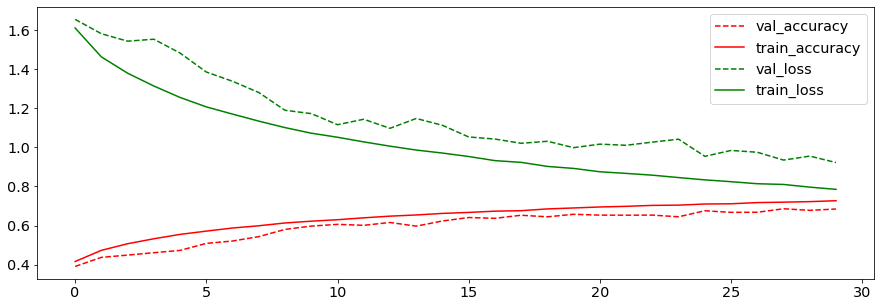

In [107]:
val_acc = history.history["val_accuracy"]
train_acc = history.history["accuracy"]
val_loss = history.history["val_loss"]
train_loss = history.history["loss"]
x=history.epoch
color = ["--r","r","--g","g"]
for y,col,lab in zip([val_acc,train_acc,val_loss,train_loss],color,["val_accuracy","train_accuracy","val_loss","train_loss"]):
    plt.plot(x,y,col, label = lab)
plt.legend()

In [108]:
# Let's see the performance of model against the test dataset
scores = model.evaluate(X_test,y_test,verbose =1)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

 - 14s 1ms/sample - loss: 1.0346 - accuracy: 0.6848


In [109]:
print("Test loss : ", scores[0])
print("Test Accuracy : ",scores[1]*100, "%")

Test loss :  0.9222175156593323
Test Accuracy :  68.48000288009644 %


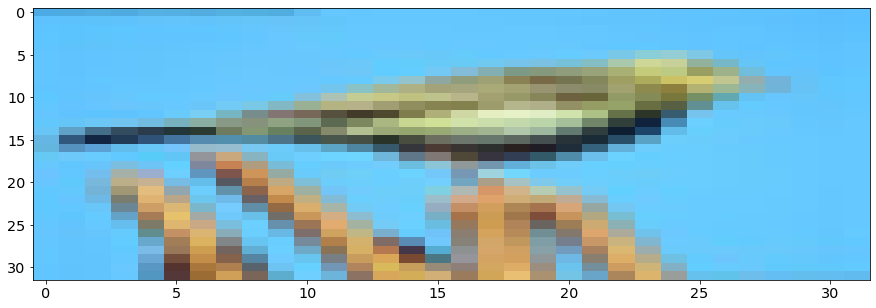

In [112]:
# Predict class of image in practice
img_idx = 67
plt.imshow(X_test[img_idx],aspect="auto")

In [113]:
print("Actual Label : ",labelNames[np.argmax(y_test[img_idx])])
# prepare image to predict
test_image = np.expand_dims(X_test[img_idx], axis = 0)
print("Input image shape :", test_image.shape)
print("predict Label : ", labelNames[model.predict_classes(test_image,batch_size = 1)[0]])
print("Prediction Probability : ", model.predict_proba(test_image, batch_size=1))

Actual Label :  bird
Input image shape : (1, 32, 32, 3)
predict Label :  bird
Prediction Probability :  [[3.5863969e-01 7.2552197e-05 5.9334546e-01 9.6150197e-04 1.3317192e-02
  8.5322000e-04 1.3378899e-02 3.4011601e-04 1.8885452e-02 2.0591065e-04]]


In [114]:
X_test.shape

(10000, 32, 32, 3)

In [167]:
predictionImages = model.predict_classes(X_test, batch_size=50,verbose=1)
predictionImages = labelNames[predictionImages]
predictionImages_60 = predictionImages[range(60)]
actualLabels_60 = labelNames[np.argmax(y_test[range(60)],axis=1)]

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

 - 12s 1ms/sample


In [168]:
print("Prediction of initial 60 Images : \n\n",predictionImages_60,"\n\n","Actual Label of initial 60 Images : \n\n",
      actualLabels_60)

Prediction of initial 60 Images : 

 ['cat' 'ship' 'ship' 'airplane' 'frog' 'frog' 'automobile' 'frog' 'cat'
 'automobile' 'airplane' 'truck' 'dog' 'horse' 'truck' 'ship' 'dog' 'deer'
 'ship' 'frog' 'horse' 'airplane' 'deer' 'truck' 'deer' 'deer' 'deer'
 'deer' 'truck' 'frog' 'frog' 'dog' 'deer' 'cat' 'truck' 'ship' 'deer'
 'truck' 'truck' 'dog' 'ship' 'frog' 'dog' 'frog' 'airplane' 'truck' 'dog'
 'ship' 'horse' 'deer' 'horse' 'ship' 'dog' 'cat' 'ship' 'ship' 'horse'
 'dog' 'dog' 'cat'] 

 Actual Label of initial 60 Images : 

 ['cat' 'ship' 'ship' 'airplane' 'frog' 'frog' 'automobile' 'frog' 'cat'
 'automobile' 'airplane' 'truck' 'dog' 'horse' 'truck' 'ship' 'dog'
 'horse' 'ship' 'frog' 'horse' 'airplane' 'deer' 'truck' 'dog' 'bird'
 'deer' 'airplane' 'truck' 'frog' 'frog' 'dog' 'deer' 'dog' 'truck' 'bird'
 'deer' 'automobile' 'truck' 'dog' 'deer' 'frog' 'dog' 'frog' 'airplane'
 'truck' 'cat' 'truck' 'horse' 'frog' 'truck' 'ship' 'airplane' 'cat'
 'ship' 'ship' 'horse' 'horse' 'deer' 

In [171]:
np.expand_dims(predictionImages_60,axis=0).shape

(1, 60)

In [181]:
xx=np.concatenate((np.expand_dims(predictionImages_60,axis=0),np.expand_dims(actualLabels_60,axis=0)),axis=0)
display(pd.DataFrame(xx))

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,cat,ship,ship,airplane,frog,frog,automobile,frog,cat,automobile,...,horse,ship,dog,cat,ship,ship,horse,dog,dog,cat
1,cat,ship,ship,airplane,frog,frog,automobile,frog,cat,automobile,...,truck,ship,airplane,cat,ship,ship,horse,horse,deer,frog


In [183]:
# display all the rows and all columns
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(pd.DataFrame(xx))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,cat,ship,ship,airplane,frog,frog,automobile,frog,cat,automobile,airplane,truck,dog,horse,truck,ship,dog,deer,ship,frog,horse,airplane,deer,truck,deer,deer,deer,deer,truck,frog,frog,dog,deer,cat,truck,ship,deer,truck,truck,dog,ship,frog,dog,frog,airplane,truck,dog,ship,horse,deer,horse,ship,dog,cat,ship,ship,horse,dog,dog,cat
1,cat,ship,ship,airplane,frog,frog,automobile,frog,cat,automobile,airplane,truck,dog,horse,truck,ship,dog,horse,ship,frog,horse,airplane,deer,truck,dog,bird,deer,airplane,truck,frog,frog,dog,deer,dog,truck,bird,deer,automobile,truck,dog,deer,frog,dog,frog,airplane,truck,cat,truck,horse,frog,truck,ship,airplane,cat,ship,ship,horse,horse,deer,frog
